# Telecom Churn Case Study

### Performed by Siddhant Pattanaik

### Objectives:
- Build a prediction model to predict whether a high-value customer is likely to churn in the near future or not.
- Use the model to identify important variables that are strong predictors of an impending churn.

### Background:
- Data regarding usage, recharge and other activities is available for prepaid mobile customers for the months of June - September.
- We are primarily interested in retaining high-value customers since they contribute >80% of the company's revenues.
- June and July are our "good" phase when customer behaviour is fairly normal.
- August is considered as our "action" phase when we need to identify patterns which indicate that the customer is about to churn.
- September is when vulnerable customers have already churned and this is indicated by the fact that they have made no usage (calls + data).

### Steps
    1) Initial Data Familiarisation
    2) Identification of High-Value Customers
    3) Defining our target variable for churns and subsequently discarding data from churn phase (September)
    4) Data Cleaning and null value imputation
    5) Further EDA and Data Visualization
    6) Feature Engineering
    7) Outliers Treatment
    8) Data Preprocessing: Train-test split and Standardization
    8) Modelling 1: High Performance model
    9) Modelling 2: High Interpretability model

**N.B. Some of the Grid Search CVs in this notebook can tke significantly long to run. Hence, if this notebook is to be run all at once, it might be prudent to comment out the Grid Search CVs in Modelling 1, especially for Random Forest, Adaboost and Gradient boost models.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

import warnings
warnings.filterwarnings("ignore")

## Initial Data Familiarisation

In [2]:
tel = pd.read_csv("telecom_churn_data.csv")
tel.shape

(99999, 226)

In [3]:
# Ensure all columns and rows are visible for respective commands
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
tel.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [5]:
tel.describe(include = "all")

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [6]:
# Checking missing values
tel.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [7]:
# Checking if all mobile numbers are unique
len(tel["mobile_number"].unique())

99999

In [8]:
# Checking if we have multiple circle_ids in the data
len(tel["circle_id"].unique())

1

In [9]:
# Since the "circle_id" is the same (109) for all records, it is not going to add any value to our analysis and can be safely dropped.
tel.drop("circle_id", axis = 1, inplace = True)
tel.shape

(99999, 225)

In [10]:
# Checking data types
tel.dtypes

mobile_number                 int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               

#### We should rename the following columns to conform to the same pattern as other columns with suffix as month number.
- "aug_vbc_3g"
- "jul_vbc_3g"
- "jun_vbc_3g"
- "sep_vbc_3g"

In [11]:
tel.rename(columns={"aug_vbc_3g":"vbc_3g_8",
                    "jul_vbc_3g":"vbc_3g_7",
                    "jun_vbc_3g":"vbc_3g_6",
                    "sep_vbc_3g":"vbc_36_9"}, inplace = True)
tel.dtypes

mobile_number                 int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               

### Collect variable names for each month within individual lists

In [12]:
# June
june_cols = list(tel.filter(regex='_6$', axis=1).columns)
print(len(june_cols))
#june_cols

55


In [13]:
# July
july_cols = list(tel.filter(regex='_7$', axis=1).columns)
print(len(july_cols))
#july_cols

55


In [14]:
# August
aug_cols = list(tel.filter(regex='_8$', axis=1).columns)
print(len(aug_cols))
#aug_cols

55


In [15]:
# September
sep_cols = list(tel.filter(regex='_9$', axis=1).columns)
print(len(sep_cols))
#sep_cols

55


## Identification of High-Value Customers (HVCs)

#### As we have noted from past business knowledge, high-value customers contribute a large chunk (>80%) of our revenue. Hence, it is imperative that we try to retain these customers. Hence, we shall focus our analysis on only these customers

#### High-value Customers are to be identified, based on total recharge amount for the months of June and July (good phase)

Since, we are interested in only high value customers (recharge amount > 70th percentile), it is more prudent to first identify these customers and subsequently perform EDA, Data Cleaning and Feature Engineering on a smaller dataset.


In [16]:
# Defining a list of features pertaining to recharges
rech_cols = ["total_rech_num_6","total_rech_num_7","total_rech_num_8","total_rech_num_9",
             "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","total_rech_amt_9",
             "max_rech_amt_6","max_rech_amt_7","max_rech_amt_8","max_rech_amt_9",
             "total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9",
             "max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9",
             "count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9",
             "count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9",
             "av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]
rech_cols2 = ["total_rech_num_","total_rech_amt_","max_rech_amt_","total_rech_data_","max_rech_data_",
             "count_rech_2g_","count_rech_3g_","av_rech_amt_data_"]

### Missing value imputation for missing values in data recharge columns

#### From our initial analysis, we know that columns pertaining to data recharges have several NaN values, since a null value implies that no recharge had been done for data for the month.

In [17]:
# Checking null value percentage for recharge columns
round(100*tel[rech_cols].isnull().sum()/tel.shape[0],2)

total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_num_9       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
max_rech_amt_9         0.00
total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

#### We can see above that the percentage of null values in columns for data recharges follow the same pattern within each month.
- June: 74.85%
- July: 74.43%
- August: 73.66%
- September: 74.08%

#### We need to check whether all the null values for the data recharges columns correspond with zero data usage given by the following columns:
- "vol_2g_mb_x"
- "vol_3g_mb_x"

In [18]:
# Checking whether all the null values for the data recharges columns correspond with zero data usage.
print("Percentage of records which have null values in the data recharge columns while also having zero data usage:")
for i in range(6,10):
    print("Month ",i,": ",round(tel[(tel["total_rech_data_" + str(i)].isnull()) &
        (tel["vol_2g_mb_" + str(i)] == 0.0) & (tel["vol_3g_mb_" + str(i)] == 0.0)].shape[0] * 100 / tel.shape[0],2))

Percentage of records which have null values in the data recharge columns while also having zero data usage:
Month  6 :  74.85
Month  7 :  74.43
Month  8 :  73.66
Month  9 :  74.08


#### Conclusion: 
- Null values in data recharge columns correspond with customers who make no use of our data services.
- **We can safely impute the null values in data recharge columns with zero.**

In [19]:
# Imputing null values for data recharge columns with zeros
tel[rech_cols] = tel[rech_cols].fillna(0.0)

In [20]:
#Checking if imputation worked as expected
tel[rech_cols].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

### Comparing "total_rech_num" vs "total_rech_data" columns to understand whether "total_rech_amt" includes data recharges

In [21]:
# June recharge data
print(tel[tel.total_rech_data_6 >= tel.total_rech_num_6][[x+"6" for x in rech_cols2]].shape[0])
tel[tel.total_rech_data_6 > tel.total_rech_num_6][[x+"6" for x in rech_cols2]].sample(10)

2139


total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  \
41018                 1               152             152                2.0   
9353                  1               152             152                2.0   
77217                 1               148             148                2.0   
4048                  2               198             198                3.0   
50620                 1               152             152                2.0   
72743                 1               152             152                2.0   
88694                 1               152             152                2.0   
57048                 1               152             152                2.0   
9552                  7               810             152               10.0   
82594                 1               152             152                2.0   

       max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
41018            152.0              1.0              1.0               304.0  
9353             152.0              1.0              1.0               304.0  
77217            148.0              1.0              1.0               296.0  
4048             202.0              2.0              1.0               602.0  
50620            152.0              1.0              1.0               304.0  
72743            152.0              1.0              1.0               304.0  
88694            152.0              1.0              1.0               304.0  
57048            152.0              1.0              1.0               304.0  
9552             152.0              5.0              5.0              1520.0  
82594            152.0              1.0              1.0               304.0

In [22]:
# July recharge data
print(tel[tel.total_rech_data_7 >= tel.total_rech_num_7][[x+"7" for x in rech_cols2]].shape[0])
tel[tel.total_rech_data_7 > tel.total_rech_num_7][[x+"7" for x in rech_cols2]].sample(10)

2158


total_rech_num_7  total_rech_amt_7  max_rech_amt_7  total_rech_data_7  \
93651                 1               152             152                2.0   
59395                42               595              46               44.0   
92497                 2               476             274                3.0   
44993                 4               128              46                5.0   
9552                  4               456             152                6.0   
42670                 3               304             152                4.0   
43404                 2               306             154                3.0   
40084                 4               458             154                5.0   
14392                 3               460             154                4.0   
79870                 1               152             152                2.0   

       max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  
93651            152.0              1.0              1.0               304.0  
59395             48.0             28.0             16.0               506.5  
92497            274.0              2.0              1.0               678.0  
44993             48.0              2.0              3.0               214.0  
9552             152.0              3.0              3.0               912.0  
42670            152.0              2.0              2.0               608.0  
43404            154.0              2.0              1.0               458.0  
40084            154.0              3.0              2.0               762.0  
14392            154.0              3.0              1.0               612.0  
79870            152.0              1.0              1.0               304.0

#### Conclusions

- **"total_rech_amt_x"**: This column does not include "recharges" for data since there are instances where 
    - the number of data recharges (total_rech_data_x) is greater than number of normal recharges (total_rech_num_x)
    - the total amount of data recharges is greater than total amount of normal recharges (total_rech_amt_x)
    
The column "total_rech_amt_x", thus, only includes recharges for calling (no data)


#### Hence, we can conclude that "data recharges" are mentioned in separate columns and the total recharges (call + data) would be a combination of recharges for calls and recharges for data.

### Analysing the column **"av_rech_amt_data_x"** for discrepancies

In [23]:
# Checking "av_rech_amt_data" column for July
tel[(tel.total_rech_data_7 >= 2.0)][[x+"7" for x in rech_cols2]].sample(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7  total_rech_data_7  \
53967                 6               287             152                4.0   
7752                 13               195              30                5.0   
61706                25              1202             110                2.0   
93783                14               147              25                5.0   
92566                 9               906             252                3.0   
38576                12               215              48                4.0   
95203                18               479              59                6.0   
72827                10               241             128                8.0   
73104                38              2509             150                9.0   
86676                10               869             550                7.0   

       max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  
53967            152.0              3.0              1.0               354.0  
7752              25.0              3.0              2.0               125.0  
61706             25.0              1.0              1.0                50.0  
93783             25.0              5.0              0.0               117.0  
92566            252.0              0.0              3.0               756.0  
38576             25.0              3.0              1.0               100.0  
95203            145.0              1.0              5.0               538.0  
72827             46.0              8.0              0.0               218.0  
73104             41.0              0.0              9.0               164.0  
86676            252.0              6.0              1.0               390.0

In [24]:
# Checking "av_rech_amt_data" column for June
tel[(tel.total_rech_data_6 >= 2.0)][[x+"6" for x in rech_cols2]].sample(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  \
83719                 7               596             179                2.0   
22126                16               608             152               10.0   
74028                14              1365             229                2.0   
96977                14               179              20                7.0   
50045                13              1233             250                3.0   
61070                 3               290             145                2.0   
3336                  8               178              37                2.0   
75305                15               287              91                3.0   
55970                 5               549             152                2.0   
63952                 9               427             120                3.0   

       max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
83719            179.0              0.0              2.0               358.0  
22126            152.0              8.0              2.0               504.0  
74028            152.0              1.0              1.0               304.0  
96977             17.0              7.0              0.0               119.0  
50045            154.0              3.0              0.0               316.0  
61070            145.0              0.0              2.0               290.0  
3336              25.0              2.0              0.0                50.0  
75305             91.0              2.0              1.0               130.0  
55970            152.0              1.0              1.0               304.0  
63952             23.0              3.0              0.0                69.0

In [25]:
# Comparing instances when "max_rech_data_x" is equal to "av_rech_amt_data_x" for July
tel[(tel.max_rech_data_7 == tel.av_rech_amt_data_7) & (tel.av_rech_amt_data_7 >0)][[x+"7" for x in rech_cols2]].sample(15)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7  total_rech_data_7  \
57670                 4                17              17                1.0   
62744                12              1757             655                1.0   
70665                 3                27              17                1.0   
46212                 6                98              98                1.0   
33318                 6               239             110                1.0   
48397                 9               368              98                1.0   
25425                 5               267             154                1.0   
61824                 3               154             154                1.0   
66779                 6                41              41                1.0   
85592                 5               999             400                1.0   
67140                 6               482             252                1.0   
47991                 6                 0               0                1.0   
7779                  4                30              30                1.0   
14779                18               827             110                1.0   
90955                 6               120             120                1.0   

       max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  
57670             17.0              1.0              0.0                17.0  
62744            655.0              0.0              1.0               655.0  
70665             17.0              1.0              0.0                17.0  
46212             98.0              1.0              0.0                98.0  
33318            177.0              0.0              1.0               177.0  
48397             98.0              1.0              0.0                98.0  
25425            154.0              1.0              0.0               154.0  
61824            154.0              1.0              0.0               154.0  
66779            252.0              0.0              1.0               252.0  
85592            274.0              1.0              0.0               274.0  
67140            252.0              0.0              1.0               252.0  
47991            951.0              0.0              1.0               951.0  
7779              17.0              1.0              0.0                17.0  
14779             23.0              1.0              0.0                23.0  
90955            145.0              0.0              1.0               145.0

In [26]:
print("Analysis for June")
print("Number of rows with max data rech < avg data rech: ", tel[tel.max_rech_data_6 < tel.av_rech_amt_data_6].shape[0])
print("Number of rows with max data rech = avg data rech: ", tel[tel.max_rech_data_6 == tel.av_rech_amt_data_6].shape[0])
print("Number of rows with max data rech > avg data rech: ", tel[tel.max_rech_data_6 > tel.av_rech_amt_data_6].shape[0])

Analysis for June
Number of rows with max data rech < avg data rech:  11757
Number of rows with max data rech = avg data rech:  88170
Number of rows with max data rech > avg data rech:  72


In [27]:
print("Analysis for July")
print("Number of rows with max data rech < avg data rech: ", tel[tel.max_rech_data_7 < tel.av_rech_amt_data_7].shape[0])
print("Number of rows with max data rech = avg data rech: ", tel[tel.max_rech_data_7 == tel.av_rech_amt_data_7].shape[0])
print("Number of rows with max data rech > avg data rech: ", tel[tel.max_rech_data_7 > tel.av_rech_amt_data_7].shape[0])

Analysis for July
Number of rows with max data rech < avg data rech:  12722
Number of rows with max data rech = avg data rech:  87236
Number of rows with max data rech > avg data rech:  41


In [28]:
print("Analysis for August")
print("Number of rows with max data rech < avg data rech: ", tel[tel.max_rech_data_8 < tel.av_rech_amt_data_8].shape[0])
print("Number of rows with max data rech = avg data rech: ", tel[tel.max_rech_data_8 == tel.av_rech_amt_data_8].shape[0])
print("Number of rows with max data rech > avg data rech: ", tel[tel.max_rech_data_8 > tel.av_rech_amt_data_8].shape[0])

Analysis for August
Number of rows with max data rech < avg data rech:  12934
Number of rows with max data rech = avg data rech:  86996
Number of rows with max data rech > avg data rech:  69


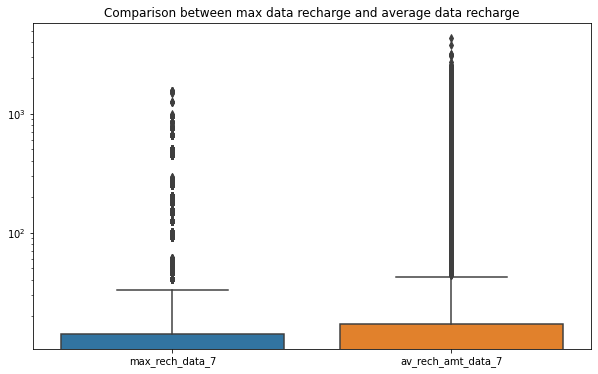

In [29]:
plt.figure(figsize=(10,6))
#plt.subplot(1,2,1)
sns.boxplot(data = tel[['max_rech_data_7','av_rech_amt_data_7']])
plt.yscale("log")
plt.title("Comparison between max data recharge and average data recharge")
plt.show()

#### From the above samples and analysis, we can infer some important insights about **"av_rech_amt_data_x"**.
- This is not really the average value in most cases, but rather the "total data" recharges for the entire month. This is probably caused by a lack of understanding by the data entry operator.
- This is evident because for a large number of rows, **"av_rech_amt_data_x" is greater than "max_rech_data_x"**, which should never be the case. 
- There are also a large number of rows when these two features are equal, exclusively when there have been one or zero data recharges for the month.
- Using common sense, the average value of any set of numbers should always be less than or equal to the max value. Hence, we can conclude that the "av_rech_amt_data_x" is a misnomer in most cases.
- There are a small number of rows for each month when this column is actually the average and the "max_rech_data" is the total amount. This is probably due to data entry errors again and needs to be considered.

#### A new column "total_rech_amt_data" shall be created to contain the correct value of total data recharges for each month (June - August). We shall not consider data for September, since it is our target month.
- For most cases, the "total_rech_amt_data" is equal to "av_rech_amt_data"
- For the rows, when the average recharge column is "actually" the average, the total data recharge would be a product of the average data recharge and the number of data recharges.

In [30]:
# Assigning correct value of "total_rech_amt_data" for each month (June, July & August)
for i in range(6,9):
    tot_var = "total_rech_amt_data_" + str(i)
    avg_var = "av_rech_amt_data_" + str(i)
    max_var = "max_rech_data_" + str(i)
    num_var = "total_rech_data_" + str(i)
    # Initializing the total data recharge value with the "incorrect" average data recharge column 
    # (which actually contains the total data recharge)
    tel[tot_var] = tel[avg_var]
    # Applying different value for total data recharge for those rows which were earlier identified to have the 
    # "actual" average value in the "av_rech_amt_data" columns
    tel.loc[tel[max_var] > tel[avg_var],[tot_var]] = tel[num_var] * tel[avg_var]
    
    # Drop column "av_rech_amt_data_x" for all months because it essentially contains erroneous values.
    tel.drop(avg_var, axis = 1, inplace = True)

In [31]:
print("Number of rows with max data rech > tot data rech: ", tel[tel.max_rech_data_7 > tel.total_rech_amt_data_7].shape[0])

Number of rows with max data rech > tot data rech:  0


In [32]:
tel.shape

(99999, 225)

### Obtain "total_recharge" (calls + data) for June, July and August

In [33]:
for i in range(6,9):
    tel["total_recharge_" + str(i)] = tel["total_rech_amt_" + str(i)] + tel["total_rech_amt_data_" + str(i)]

In [34]:
tel.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7001865778             0.0             0.0             0.0   
2     7001625959             0.0             0.0             0.0   
3     7001204172             0.0             0.0             0.0   
4     7000142493             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00   

In [35]:
# Creating a new feature "avg_rech_good_phase" for the months of June and July. 
#This column would be used to identify our high value customers.
tel["avg_rech_good_phase"] = (tel["total_recharge_6"] + tel["total_recharge_7"])/2
tel.avg_rech_good_phase.describe()

count    99999.000000
mean       375.429349
std        423.716254
min          0.000000
25%        125.000000
50%        263.500000
75%        492.000000
max      37762.500000
Name: avg_rech_good_phase, dtype: float64

In [36]:
# Defining our 70th percentile for the above feature (average recharge during good phase)
thresh = tel["avg_rech_good_phase"].quantile(q=0.7)
print("The 70th percentile for the average recharge during June and July is: ", thresh)

The 70th percentile for the average recharge during June and July is:  431.0


#### We can now extract a new dataframe with only our high value customers.

In [37]:
# Extracting high value customers and resetting the index
hvc = tel[tel["avg_rech_good_phase"] >= thresh].reset_index(drop=True)
hvc.shape

(30022, 229)

In [38]:
hvc.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7000701601             0.0             0.0             0.0   
2     7001524846             0.0             0.0             0.0   
3     7000875565             0.0             0.0             0.0   
4     7002124215             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   430.975   299.869   187.894  206.490        50.51   
4            9/30/2014   514.453   597.753   637.760  578.596       102.41   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3        74.01        70.61        31.34        296.29        229.74   
4       132.11        85.14       161.63        757.93        896.68   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        162.76        224.39           0.00           2.83           0.00   
4        983.39        869.89           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00          17.74           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3             42.61             65.16             67.38             26.88   
4              4.48              6.16             23.34             29.98   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3            273.29            145.99            128.28            201.49   
4             91.81             87.93            104.81            107.54   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.00              4.48             10.26              4.66   
4              0.75   

In [39]:
# Checking null values in our new dataframe of high value customers
hvc.isnull().sum()

mobile_number                   0
loc_og_t2o_mou                224
std_og_t2o_mou                224
loc_ic_t2o_mou                224
last_date_of_month_6            0
last_date_of_month_7           28
last_date_of_month_8          155
last_date_of_month_9          355
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                   496
onnet_mou_7                   488
onnet_mou_8                  1089
onnet_mou_9                  1824
offnet_mou_6                  496
offnet_mou_7                  488
offnet_mou_8                 1089
offnet_mou_9                 1824
roam_ic_mou_6                 496
roam_ic_mou_7                 488
roam_ic_mou_8                1089
roam_ic_mou_9                1824
roam_og_mou_6                 496
roam_og_mou_7                 488
roam_og_mou_8                1089
roam_og_mou_9                1824
loc_og_t2t_mou_6              496
loc_og_t2t_mou

## Defining our target variable for churns

The customers who actually churn during our churn phase (in September) are our target variable. For our analysis, these customers need to be identified based on their usage, i.e., whether they have made any calls or used mobile data during the churn phase. Hence, if the following 4 columns all have zero values for September, then the customer is deemed to have churned.
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

To accommodate this, we shall define a new variable "churned" with value=1 signifying that the customer has churned, and 0 otherwise.

In [40]:
churn_vars = ["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]
# We have already seen that there are no missing values for these four columns. Checking once again to be sure.
print("Checking null values among our churn deciding variables")
hvc[churn_vars].isna().sum()

Checking null values among our churn deciding variables


total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [41]:
#hvc["churned"] = hvc.apply(lambda x: 1 if ((x.total_ic_mou_9 == 0) &
#                                           (x.total_og_mou_9 == 0) &
#                                           (x.vol_2g_mb_9 == 0) &
#                                           (x.vol_3g_mb_9 == 0))
#                                    else 0, axis = 1)
hvc["churned"] = (hvc[churn_vars].sum(axis=1) == 0).astype(int)
hvc.churned.value_counts()

0    27562
1     2460
Name: churned, dtype: int64

In [42]:
print("Churn Ratio percentage:")
round(hvc.churned.value_counts()*100 / hvc.shape[0], 2)

Churn Ratio percentage:


0    91.81
1     8.19
Name: churned, dtype: float64

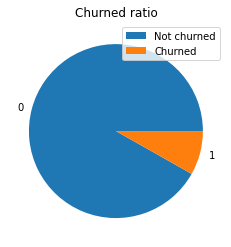

In [43]:
(hvc.churned.value_counts(normalize=True)*100).plot(kind = "pie")
plt.ylabel("")
plt.title("Churned ratio")
plt.legend(["Not churned", "Churned"], loc= "upper right")
plt.show()

#### Hence, our target variable "churned" has been defined.
- It may be noted that the positive class (churned) percentage is relatively low and we can consider this data to be slightly imbalanced.

## Dropping variables for our churn phase (September)

- Since, we have defined our target variable "churned", we are not going to be using any of the other variables from this month. and we can safely drop these.
- If we include September data in our input parameters, that is essentially "target leakage", because our target is derived from September data.
- Hence, we shall drop all remaining data pertaining to September (features with suffix _9)

In [44]:
# Redefining list of features for September which we can drop
sep_cols = list(hvc.filter(regex='_9$', axis=1).columns)
print(len(sep_cols))
#sep_cols

55


In [45]:
print("No. of columns before dropping columns for September: ", hvc.shape[1])

No. of columns before dropping columns for September:  230


In [46]:
# Dropping variables for September
hvc.drop(sep_cols, axis=1, inplace=True)
print("No. of columns after dropping columns for September: ", hvc.shape[1])

No. of columns after dropping columns for September:  175


## Data Cleaning and Null value Imputation

In [47]:
hvc.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7000701601             0.0             0.0             0.0   
2     7001524846             0.0             0.0             0.0   
3     7000875565             0.0             0.0             0.0   
4     7002124215             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
1            6/30/2014            7/31/2014            8/31/2014  1069.180   
2            6/30/2014            7/31/2014            8/31/2014   378.721   
3            6/30/2014            7/31/2014            8/31/2014   430.975   
4            6/30/2014            7/31/2014            8/31/2014   514.453   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   299.869   187.894        50.51        74.01        70.61        296.29   
4   597.753   637.760       102.41       132.11        85.14        757.93   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        229.74        162.76           0.00           2.83           0.00   
4        896.68        983.39           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00          17.74           0.00             42.61   
4           0.00           0.00           0.00              4.48   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3             65.16             67.38            273.29            145.99   
4              6.16             23.34             91.81             87.93   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            128.28              0.00              4.48             10.26   
4            104.81              0.75              0.00              1.58   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.04   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3        215.64        205.93              7.89              2.58   
4         94.09        129.74             97.93            125.94   

In [48]:
# Redefining lists of month specific columns
june_cols = list(hvc.filter(regex='_6$', axis=1).columns)
july_cols = list(hvc.filter(regex='_7$', axis=1).columns)
aug_cols = list(hvc.filter(regex='_8$', axis=1).columns)
print("No. of June specific columns: ",len(june_cols))
print("No. of July specific columns: ",len(july_cols))
print("No. of August specific columns: ",len(aug_cols))

No. of June specific columns:  56
No. of July specific columns:  56
No. of August specific columns:  56


### Date columns and obtaining new features from them

In [49]:
# Defining date columns
date_cols = []
for col in list(hvc.columns):
    if "date" in col:
        date_cols.append(col)
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [50]:
hvc[date_cols].dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

#### All the date columns are strings, while it should be in the date-time format

In [51]:
import datetime as dt
hvc[date_cols] = hvc[date_cols].apply(lambda x: pd.to_datetime(x, format = '%m/%d/%Y',errors = 'coerce'))

In [52]:
hvc[date_cols].dtypes

last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
dtype: object

In [53]:
# Checking null values for date columns
hvc[date_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7           28
last_date_of_month_8          155
date_of_last_rech_6            61
date_of_last_rech_7            97
date_of_last_rech_8           579
date_of_last_rech_data_6    15119
date_of_last_rech_data_7    14862
date_of_last_rech_data_8    15549
dtype: int64

In [54]:
# Imputing "last_date_of_month"
for i in range(6,9):
    hvc["last_date_of_month_" + str(i)].fillna(method='bfill', axis=0, inplace = True)

In [55]:
hvc[date_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7            0
last_date_of_month_8            0
date_of_last_rech_6            61
date_of_last_rech_7            97
date_of_last_rech_8           579
date_of_last_rech_data_6    15119
date_of_last_rech_data_7    14862
date_of_last_rech_data_8    15549
dtype: int64

In [56]:
hvc.last_date_of_month_8.value_counts()

2014-08-31    30022
Name: last_date_of_month_8, dtype: int64

### Creating new feature "avg_recharge_interval" for each month.

- Avg_rech_int = ((date_of_last_rech for current month) - (date_of_last_rech for previous month)) / (number of recharges done)
- This new variable would indicate how frequently the customer performs recharges. The assumption is that the more frequent the recharges by a customer, the more valuable he/she is.
- Using the logic that, if a customer recharges fairly frequently, the "avg_rech_int" would be relatively small. Meanwhile, if a customer has not recharged during the month or recharges infrequently, then this feature would be larger.
- Before we proceed with this, we need to address the missing values in the "date_of_last_rech" columns. To conform to the above argument, we shall input null values to the last day of each month, so that this feature would be large."

In [57]:
# Performing a sanity check of missing values for "date_of_last_rech_data" columns.
# The assumption is that if these columns are null, then no data recharge was done for the month and no internet was used either.
for i in range(6,9):
    print("Checking data recharge date missing for month ", i)
    print("No. of rows with missing dates of data recharge: ", hvc[(hvc["date_of_last_rech_data_"+str(i)].isnull()) & 
            (hvc["vol_3g_mb_"+str(i)] == 0.0) & (hvc["vol_2g_mb_"+str(i)] == 0.0) &
            (hvc["total_rech_amt_data_"+str(i)]==0.0)].shape[0])
    print()

Checking data recharge date missing for month  6
No. of rows with missing dates of data recharge:  15119

Checking data recharge date missing for month  7
No. of rows with missing dates of data recharge:  14862

Checking data recharge date missing for month  8
No. of rows with missing dates of data recharge:  15549



- These numbers match the total no. of missing values for the "date of data recharge" columns.
- Hence, we can conclude that users with missing values for date of last recharge data also did not use any data services for the given month, nor made any data recharges.

In [58]:
# Performing a sanity check of missing values for "date_of_last_rech" columns.
# The assumption is that if these columns are null, then no calling recharge was done for the month and no calls were made/received either.
for i in range(6,9):
    print("Checking call recharge date missing for month ", i)
    print("No. of rows with missing dates of call recharge: ", 
          hvc[(hvc["date_of_last_rech_"+str(i)].isnull()) & (hvc["total_rech_amt_"+str(i)]==0.0)].shape[0])
    print()

Checking call recharge date missing for month  6
No. of rows with missing dates of call recharge:  61

Checking call recharge date missing for month  7
No. of rows with missing dates of call recharge:  97

Checking call recharge date missing for month  8
No. of rows with missing dates of call recharge:  579



- These numbers match the total no. of missing values for the "date of recharge" columns.
- Hence, we can conclude that users with missing values for date of last recharge (for calls) also did not make any calling recharges.

In [59]:
# Imputing missing values for date of last recharge variables to the last day of each month
hvc["date_of_last_rech_6"].fillna(pd.to_datetime("6/30/2014", format='%m/%d/%Y'), inplace = True)
hvc["date_of_last_rech_7"].fillna(pd.to_datetime("7/31/2014", format='%m/%d/%Y'), inplace = True)
hvc["date_of_last_rech_8"].fillna(pd.to_datetime("8/31/2014", format='%m/%d/%Y'), inplace = True)
hvc["date_of_last_rech_data_6"].fillna(pd.to_datetime("6/30/2014", format='%m/%d/%Y'), inplace = True)
hvc["date_of_last_rech_data_7"].fillna(pd.to_datetime("7/31/2014", format='%m/%d/%Y'), inplace = True)
hvc["date_of_last_rech_data_8"].fillna(pd.to_datetime("8/31/2014", format='%m/%d/%Y'), inplace = True)

In [60]:
hvc[date_cols].isnull().sum()

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

#### For creating our new feature for "avg_rech_interval", we choose the following rules:
- For June, we obtain this feature by subtracting last recharge date from start of month and then dividing the number of recharges in June, since we do not have any data for previous months.
- For July and August, we obtain this feature, by the following equation:
((last date of recharge for current month) - (last date of recharge for previous month))/(number of recharges in current month)
- The factor '1' is added to the denominator because there are multiple users who did not make any recharges and hence we need to avoid dividing by 0.

In [61]:
# Creating new feature "avg_rech_int" for both calls and data
# For June
hvc["avg_rech_int_call_6"] = (hvc["date_of_last_rech_6"].dt.day - 1) / (hvc["total_rech_num_6"] + 1) 
hvc["avg_rech_int_data_6"] = (hvc["date_of_last_rech_data_6"].dt.day - 1) / (hvc["total_rech_data_6"] + 1)

# For July and August
for i in range(7,9):
    hvc["avg_rech_int_call_"+str(i)] = (hvc["date_of_last_rech_"+str(i)].dt.day - (hvc["last_date_of_month_"+str(i)].dt.day - 30)) / (hvc["total_rech_num_"+str(i)] + 1) 
    hvc["avg_rech_int_data_"+str(i)] = (hvc["date_of_last_rech_data_"+str(i)].dt.day - (hvc["last_date_of_month_"+str(i)].dt.day - 30)) / (hvc["total_rech_data_"+str(i)] + 1)

In [62]:
hvc.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753             0.0             0.0             0.0   
1     7000701601             0.0             0.0             0.0   
2     7001524846             0.0             0.0             0.0   
3     7000875565             0.0             0.0             0.0   
4     7002124215             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31   197.385   
1           2014-06-30           2014-07-31           2014-08-31  1069.180   
2           2014-06-30           2014-07-31           2014-08-31   378.721   
3           2014-06-30           2014-07-31           2014-08-31   430.975   
4           2014-06-30           2014-07-31           2014-08-31   514.453   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   299.869   187.894        50.51        74.01        70.61        296.29   
4   597.753   637.760       102.41       132.11        85.14        757.93   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        229.74        162.76           0.00           2.83           0.00   
4        896.68        983.39           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00          17.74           0.00             42.61   
4           0.00           0.00           0.00              4.48   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3             65.16             67.38            273.29            145.99   
4              6.16             23.34             91.81             87.93   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            128.28              0.00              4.48             10.26   
4            104.81              0.75              0.00              1.58   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00        315.91   
4               0.0               0.0              0.00         97.04   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3        215.64        205.93              7.89              2.58   
4         94.09        129.74             97.93            125.94   

#### Now that we have derived average interval between recharges, we can go ahead and drop all the date columns

In [63]:
print("Total no. of columns including date features: ", hvc.shape[1])

Total no. of columns including date features:  181


In [64]:
hvc.drop(date_cols, axis = 1, inplace = True)
print("Total no. of columns after dropping date features: ", hvc.shape[1])

Total no. of columns after dropping date features:  172


### Categorical variables

In [65]:
hvc.describe()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count   3.002200e+04         29798.0         29798.0         29798.0   
mean    7.001216e+09             0.0             0.0             0.0   
std     6.869250e+05             0.0             0.0             0.0   
min     7.000000e+09             0.0             0.0             0.0   
25%     7.000630e+09             0.0             0.0             0.0   
50%     7.001220e+09             0.0             0.0             0.0   
75%     7.001805e+09             0.0             0.0             0.0   
max     7.002411e+09             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30022.000000  30022.000000  30022.000000  29526.000000  29534.000000   
mean     576.333712    578.289350    524.491391    280.916539    288.980665   
std      448.963621    468.986244    495.996314    463.265873    485.262895   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      345.394500    346.623250    266.076750     28.995000     27.810000   
50%      490.321000    488.315000    442.815000    106.540000    104.075000   
75%      701.982000    699.650500    666.108250    325.687500    330.450000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28933.000000  29526.000000  29534.000000  28933.000000   29526.000000   
mean     257.958902    400.006050    404.996381    365.715090      17.021899   
std      468.636663    479.776751    495.995324    484.340617      78.562799   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       21.380000    104.940000    102.687500     78.990000       0.000000   
50%       86.580000    256.950000    253.860000    221.860000       0.000000   
75%      278.410000    512.980000    519.777500    474.380000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29534.000000   28933.000000   29526.000000   29534.000000   
mean       13.248472      13.394541      28.269785      21.325749   
std        76.406651      75.797701     118.256401      97.721248   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28933.000000      29526.000000      29534.000000      28933.000000   
mean       21.361256         90.745566         91.812266         85.237841   
std       107.075478        234.751886        247.609508        235.267009   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.915000          7.330000          5.360000   
50%         0.000000         29.310000         29.390000         26.660000   
75%         0.000000         85.905000         86.140000         81.390000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29526.000000      29534.000000      28933.000000      29526.000000   
mean         174.331732        173.948265        164.846340          6.829196   
std          251.556055        242.313816        236.596156         22.580721   
min            0.000000          0.000000          0.000000          0.000000   
25%           26.710000         29.030000         22.180000          0.000000   
50%           89.870000         92.435000         84.040000          0.330000   
75%          225.975000        22

In [66]:
hvc.dtypes

mobile_number              int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c

#### Looking at the description of all the columns above and considering that data-type for each feature is numeric, we can deduce the following:
- For this dataset, categorical variables are those which can take only two values, 0 & 1.
- By this logic, there are 6 features which are categorical:
    - night_pck_user_6
    - night_pck_user_7
    - night_pck_user_8
    - fb_user_6
    - fb_user_7
    - fb_user_8 

In [67]:
# Making a list of categorical variables
cat_vars = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]

In [68]:
print("Percentage of categorical variables missing before imputation:")
print(round(hvc[cat_vars].isnull().sum() * 100 / hvc.shape[0] , 2))

Percentage of categorical variables missing before imputation:
night_pck_user_6    50.36
night_pck_user_7    49.50
night_pck_user_8    51.79
fb_user_6           50.36
fb_user_7           49.50
fb_user_8           51.79
dtype: float64


#### Since categorical variables only have 2 states: 1.0 indicating positive, 0.0 indicating negative, and the percentage of missing values is relatively high, we can apply "separate value imputation" for the categorical variables. Let's choose a value of -1 to represent the missing values within categorical variables.

In [69]:
hvc[cat_vars] = hvc[cat_vars].fillna(-1.0)

In [70]:
print("Percentage of categorical variables missing after imputation:")
print(round(hvc[cat_vars].isnull().sum() * 100 / hvc.shape[0] , 2))

Percentage of categorical variables missing after imputation:
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


### Drop empty columns and columns with constant values

Empty columns, in our case, are those which have a constant value of 0.0 for all records. They add no value to our analysis, and hence can be dropped.

In [71]:
# Defining list of useless columns
const_cols = []
for col in list(hvc.columns):
    if (hvc[col].min() == hvc[col].max()) and (hvc[col].mean() ==0):
        const_cols.append(col)
        print(hvc[col].value_counts())
print("List of empty columns are: ",const_cols)

0.0    29798
Name: loc_og_t2o_mou, dtype: int64
0.0    29798
Name: std_og_t2o_mou, dtype: int64
0.0    29798
Name: loc_ic_t2o_mou, dtype: int64
0.0    29526
Name: std_og_t2c_mou_6, dtype: int64
0.0    29534
Name: std_og_t2c_mou_7, dtype: int64
0.0    28933
Name: std_og_t2c_mou_8, dtype: int64
0.0    29526
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29534
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28933
Name: std_ic_t2o_mou_8, dtype: int64
List of empty columns are:  ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [72]:
print("Shape of dataframe before dropping empty columns: ", hvc.shape)

Shape of dataframe before dropping empty columns:  (30022, 172)


In [73]:
# Dropping empty columns
hvc.drop(const_cols, axis = 1, inplace = True)
print("Shape of dataframe after dropping empty columns: ", hvc.shape)

Shape of dataframe after dropping empty columns:  (30022, 163)


### Addressing remaining null values for continuous variables in the dataset

#### Minutes of Usage (MOU) columns

In [74]:
hvc.isnull().sum()

mobile_number                0
arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                496
onnet_mou_7                488
onnet_mou_8               1089
offnet_mou_6               496
offnet_mou_7               488
offnet_mou_8              1089
roam_ic_mou_6              496
roam_ic_mou_7              488
roam_ic_mou_8             1089
roam_og_mou_6              496
roam_og_mou_7              488
roam_og_mou_8             1089
loc_og_t2t_mou_6           496
loc_og_t2t_mou_7           488
loc_og_t2t_mou_8          1089
loc_og_t2m_mou_6           496
loc_og_t2m_mou_7           488
loc_og_t2m_mou_8          1089
loc_og_t2f_mou_6           496
loc_og_t2f_mou_7           488
loc_og_t2f_mou_8          1089
loc_og_t2c_mou_6           496
loc_og_t2c_mou_7           488
loc_og_t2c_mou_8          1089
loc_og_mou_6               496
loc_og_mou_7               488
loc_og_mou_8              1089
std_og_t2t_mou_6           496
std_og_t

#### We can see that for all the "minutes of usage" columns, there is a definite pattern for each month with 
- 496 null values in June
- 488 null values in July
- 1089 null values in August

#### It is quite likely that all the columns for the same month are null together. Let's check this.

In [75]:
# Defining list of "minutes of usage" (mou) variables
mou_vars = []
for col in list(hvc.columns):
    if ("_mou_" in col) or ("_others_" in col):
        mou_vars.append(col)
print("Number of MOU variables: ", len(mou_vars))
print(mou_vars)

Number of MOU variables:  87
['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc

In [76]:
# Defining a second list for mou variables without the month suffix 
mou_vars2 = [mou_vars[i][:-1] for i in range(0,len(mou_vars),3)]
print(len(mou_vars2))
mou_vars2

29


['onnet_mou_',
 'offnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'loc_og_t2t_mou_',
 'loc_og_t2m_mou_',
 'loc_og_t2f_mou_',
 'loc_og_t2c_mou_',
 'loc_og_mou_',
 'std_og_t2t_mou_',
 'std_og_t2m_mou_',
 'std_og_t2f_mou_',
 'std_og_mou_',
 'isd_og_mou_',
 'spl_og_mou_',
 'og_others_',
 'total_og_mou_',
 'loc_ic_t2t_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2f_mou_',
 'loc_ic_mou_',
 'std_ic_t2t_mou_',
 'std_ic_t2m_mou_',
 'std_ic_t2f_mou_',
 'std_ic_mou_',
 'total_ic_mou_',
 'spl_ic_mou_',
 'isd_ic_mou_',
 'ic_others_']

In [77]:
# Dropping the two columns from this list which have no null values amongst "mou" variables. 
# We shall use these two variables to do our checks.
mou_vars2.remove("total_og_mou_")
mou_vars2.remove("total_ic_mou_")
print(len(mou_vars2))

27


In [78]:
# Checking if the null values for MOU variables within a month occur simultaneously.
# Also checking the total outgoing and incoming calls' minutes when we have all the MOU columns for a month as null values.
for i in range(6,9):
    print("Checking missing MOU entries for month ",i)
    cols = [(col + str(i)) for col in mou_vars2] #Defining list of MOU columns for the current month
    print("No. of records with null values for all MOU columns: ",hvc[hvc[cols].isnull().all(axis=1)].shape[0])
    print("Sum of all incoming and outgoing calls minutes when we have all null values for remaining MOU columns: ",
          hvc[hvc[cols].isnull().all(axis=1)]["total_og_mou_"+str(i)].sum() +
          hvc[hvc[cols].isnull().all(axis=1)]["total_ic_mou_"+str(i)].sum())
    print()

Checking missing MOU entries for month  6
No. of records with null values for all MOU columns:  496
Sum of all incoming and outgoing calls minutes when we have all null values for remaining MOU columns:  0.0

Checking missing MOU entries for month  7
No. of records with null values for all MOU columns:  488
Sum of all incoming and outgoing calls minutes when we have all null values for remaining MOU columns:  0.0

Checking missing MOU entries for month  8
No. of records with null values for all MOU columns:  1089
Sum of all incoming and outgoing calls minutes when we have all null values for remaining MOU columns:  0.0



#### Conclusions:
- All MOU variables (except total IC and OG MOU) for individual months have null values simultaneously. This is evident from the fact that the number of rows with all MOU null values match what we had observed earlier for each month for individual columns.
- When the MOU variables are all null, the total incoming and outgoing minutes of usage for the respective month is also zero.
- This means that the users did not make or receive a single call during the given month when MOU variables are all null.
- **Hence, we can conclude that the MOU null values should be imputed with a value of 0.0, since no calls were made/received by the user for the given month. Imputing it with any other value would not corroborate with the total incoming and outgoing calls minutes.**

In [79]:
# Creating a back-up
hvc2 = hvc.copy()

In [80]:
# Imputing MOU null values with 0.0
hvc[mou_vars] = hvc[mou_vars].fillna(0.0)
hvc.isnull().sum()

mobile_number                0
arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_6             0
loc_og_t2m_mou_7             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_6             0
loc_og_t2f_mou_7             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_6             0
loc_og_t2c_mou_7             0
loc_og_t2c_mou_8             0
loc_og_mou_6                 0
loc_og_mou_7                 0
loc_og_mou_8                 0
std_og_t2t_mou_6             0
std_og_t

#### ARPU variables for data usage
- Now we are only left with 6 columns which have null values.
    - "arpu_3g_x"
    - "arpu_2g_x"
- The number of null values in these columns matches what we had seen earlier with the "date_of_last_rech" columns for data. 
- It is likely that these "arpu" values are null, because the customers did not use any data.
Let's check this.

In [81]:

for i in range(6,9):
    print("ARPU columns for data usage for month ", i)
    print("No. of missing values in 'arpu_3g_"+str(i)+"' column when 3g data usage was 0 and there was no data recharge done:",end=" ")
    print(hvc[(hvc["arpu_3g_"+str(i)].isnull()) & (hvc["vol_3g_mb_"+str(i)] == 0.0) & (hvc["total_rech_amt_data_"+str(i)]==0.0)].shape[0])
    print("No. of missing values in 'arpu_2g_"+str(i)+"' column when 2g data usage was 0 and there was no data recharge done:",end=" ")
    print(hvc[(hvc["arpu_2g_"+str(i)].isnull()) & (hvc["vol_2g_mb_"+str(i)] == 0.0) & (hvc["total_rech_amt_data_"+str(i)]==0.0)].shape[0])
    print()

ARPU columns for data usage for month  6
No. of missing values in 'arpu_3g_6' column when 3g data usage was 0 and there was no data recharge done: 15119
No. of missing values in 'arpu_2g_6' column when 2g data usage was 0 and there was no data recharge done: 15119

ARPU columns for data usage for month  7
No. of missing values in 'arpu_3g_7' column when 3g data usage was 0 and there was no data recharge done: 14862
No. of missing values in 'arpu_2g_7' column when 2g data usage was 0 and there was no data recharge done: 14862

ARPU columns for data usage for month  8
No. of missing values in 'arpu_3g_8' column when 3g data usage was 0 and there was no data recharge done: 15549
No. of missing values in 'arpu_2g_8' column when 2g data usage was 0 and there was no data recharge done: 15549



#### Based on the above numbers, we can conclude that these arpu columns for data usage are null when no data recharges have been done and no data has been consumed by the customer. Hence, we can go ahead and impute these missing values with 0.0 as well.

In [82]:
# Defining "arpu" columns list
arpu_cols = [col for col in list(hvc.columns) if "arpu_" in col]
arpu_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [83]:
# Imputing arpu null values with 0.0
hvc[arpu_cols] = hvc[arpu_cols].fillna(0.0)
hvc[arpu_cols].isnull().sum()

arpu_6       0
arpu_7       0
arpu_8       0
arpu_3g_6    0
arpu_3g_7    0
arpu_3g_8    0
arpu_2g_6    0
arpu_2g_7    0
arpu_2g_8    0
dtype: int64

In [84]:
# Checking null values in the dataset.
hvc.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

In [85]:
hvc.shape

(30022, 163)

In [86]:
# Checking for any useless columns once again
const_cols2 = []
for col in list(hvc.columns):
    if (hvc[col].min() == hvc[col].max()):
        const_cols2.append(col)
        print(hvc[col].value_counts())
print("List of empty columns are: ",const_cols2)

List of empty columns are:  []


#### This concludes the data cleaning portion of this analysis. Let's try to derive some new features and visualize the data to gain some more insights.

## Further EDA and Data Visualization

In [87]:
hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7000875565   430.975   299.869   187.894        50.51        74.01   
4     7002124215   514.453   597.753   637.760       102.41       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        70.61        296.29        229.74        162.76           0.00   
4        85.14        757.93        896.68        983.39           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           2.83           0.00           0.00          17.74           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             42.61             65.16             67.38            273.29   
4              4.48              6.16             23.34             91.81   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3            145.99            128.28              0.00              4.48   
4             87.93            104.81              0.75              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3             10.26               0.0               0.0              0.00   
4              1.58               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        315.91        215.64        205.93              7.89   
4         97.04         94.09        129.74             97.93   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3              2.58              3.23             22.99             64.51   
4            125.94             61.79            665.36            808.74   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3             18.29              0.00              0.00        

In [88]:
hvc.dtypes

mobile_number              int64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou_6             float64
loc_og_mou_7             float64
loc_og_mou

### Plotting categorical variables

In [89]:
# As already identified earlier we have 6 categorical variables in the dataset
print("Categorical variables: ", cat_vars)

Categorical variables:  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


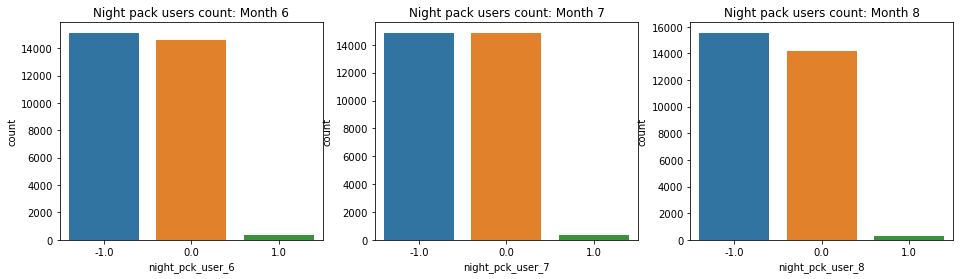

In [90]:
# Plotting a count of night pack users
plt.figure(figsize=(16,4))
for i in range(6,9):
    plt.subplot(1,3,i-5)
    plt.title("Night pack users count: Month " + str(i))
    sns.countplot(hvc['night_pck_user_'+str(i)])
#    plt.legend(["No data available","No night pack","Night pack used"])

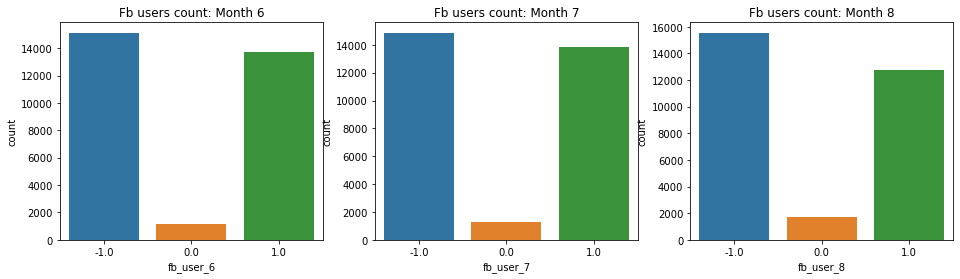

In [91]:
# Plotting a count of fb users
plt.figure(figsize=(16,4))
for i in range(6,9):
    plt.subplot(1,3,i-5)
    plt.title("Fb users count: Month " + str(i))
    sns.countplot(hvc['fb_user_'+str(i)])

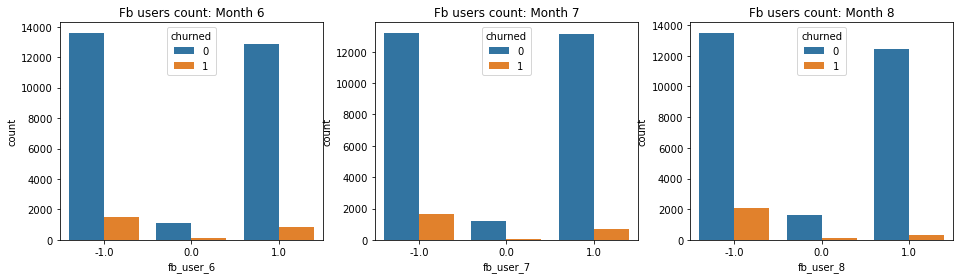

In [92]:
# Bivariate analysis of fb_users vs "churned"
plt.figure(figsize=(16,4))
for i in range(6,9):
    plt.subplot(1,3,i-5)
    plt.title("Fb users count: Month " + str(i))
    sns.countplot(hvc["fb_user_" + str(i)], hue=hvc["churned"])


- The above plots show that there are a fair number of fb users among the customers.
- In addition, we can see that "churn ratio" is slightly higher for people whom we have no data about their fb usage.

### Plotting continuous variables

In [93]:
# Define list of numeric variables
num_vars = [col for col in list(hvc.columns) if (col not in cat_vars) & (col not in ["mobile_number","churned"])]
print("No. of continuous variables: ", len(num_vars))
num_vars

No. of continuous variables:  155


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

- We can see that all continuous variables are either usage specific (minutes, data, age on network) or recharge specific
- We also see that all the variables (except "aon" and "avg_rech_good_phase") come in sets of 3, one for each month in our data.

In [94]:
# Defining generic list of continuous vars
num_vars_gen = num_vars.copy()
num_vars_gen.remove("aon")
num_vars_gen.remove('avg_rech_good_phase')
num_vars_gen = [num_vars_gen[i][:-1] for i in range(0,len(num_vars_gen) - 1,3)]
print("Number of generic continuous variables: ", len(num_vars_gen))
num_vars_gen

Number of generic continuous variables:  51


['arpu_',
 'onnet_mou_',
 'offnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'loc_og_t2t_mou_',
 'loc_og_t2m_mou_',
 'loc_og_t2f_mou_',
 'loc_og_t2c_mou_',
 'loc_og_mou_',
 'std_og_t2t_mou_',
 'std_og_t2m_mou_',
 'std_og_t2f_mou_',
 'std_og_mou_',
 'isd_og_mou_',
 'spl_og_mou_',
 'og_others_',
 'total_og_mou_',
 'loc_ic_t2t_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2f_mou_',
 'loc_ic_mou_',
 'std_ic_t2t_mou_',
 'std_ic_t2m_mou_',
 'std_ic_t2f_mou_',
 'std_ic_mou_',
 'total_ic_mou_',
 'spl_ic_mou_',
 'isd_ic_mou_',
 'ic_others_',
 'total_rech_num_',
 'total_rech_amt_',
 'max_rech_amt_',
 'last_day_rch_amt_',
 'total_rech_data_',
 'max_rech_data_',
 'count_rech_2g_',
 'count_rech_3g_',
 'vol_2g_mb_',
 'vol_3g_mb_',
 'arpu_3g_',
 'arpu_2g_',
 'monthly_2g_',
 'sachet_2g_',
 'monthly_3g_',
 'sachet_3g_',
 'vbc_3g_',
 'total_rech_amt_data_',
 'total_recharge_',
 'avg_rech_int_call_',
 'avg_rech_int_data_']

#### Identifying some columns from the above list to look more closely, based on business logic
- "total_og_mou_x"
- "total_ic_mou_x"
- "vol_2g_mb_"
- "vol_3g_mb_"
- "total_rech_amt_" (For calls only)
- "total_rech_amt_data_"
- "total_recharge_" (For data and calls)

In [95]:
call = []
data = []
rech = [] 
for i in range(6,9):
    call.extend(["total_og_mou_"+str(i),"total_ic_mou_"+str(i),"total_rech_amt_"+str(i)])
    data.extend(["vol_2g_mb_"+str(i),"vol_3g_mb_"+str(i),"total_rech_amt_data_"+str(i)])
    rech.extend(["total_rech_amt_"+str(i),"total_rech_amt_data_"+str(i),"total_recharge_"+str(i)])
print(call)
print(data)
print(rech)

['total_og_mou_6', 'total_ic_mou_6', 'total_rech_amt_6', 'total_og_mou_7', 'total_ic_mou_7', 'total_rech_amt_7', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_amt_8']
['vol_2g_mb_6', 'vol_3g_mb_6', 'total_rech_amt_data_6', 'vol_2g_mb_7', 'vol_3g_mb_7', 'total_rech_amt_data_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'total_rech_amt_data_8']
['total_rech_amt_6', 'total_rech_amt_data_6', 'total_recharge_6', 'total_rech_amt_7', 'total_rech_amt_data_7', 'total_recharge_7', 'total_rech_amt_8', 'total_rech_amt_data_8', 'total_recharge_8']


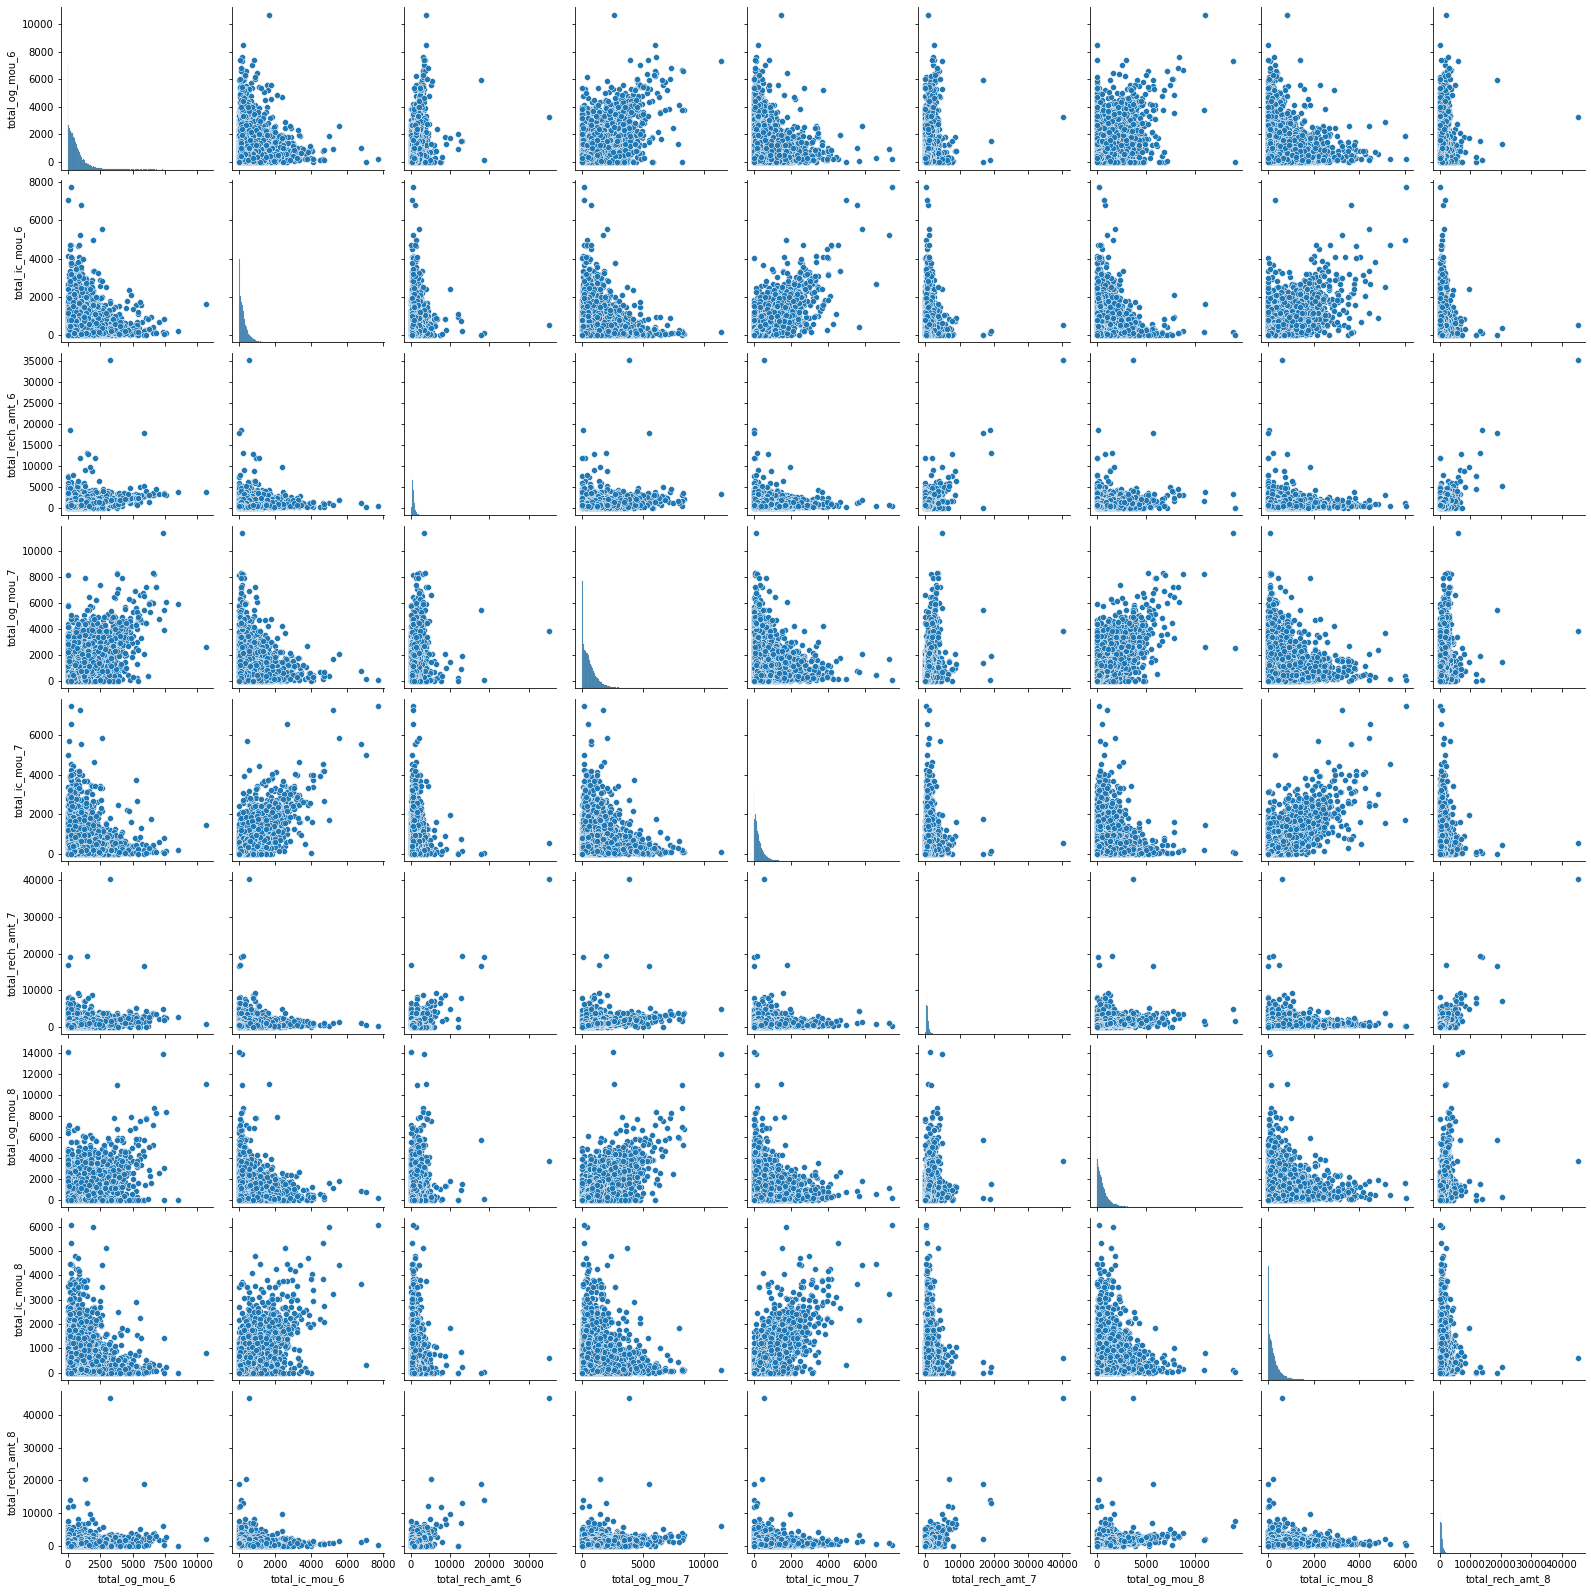

In [96]:
sns.pairplot(hvc[call])

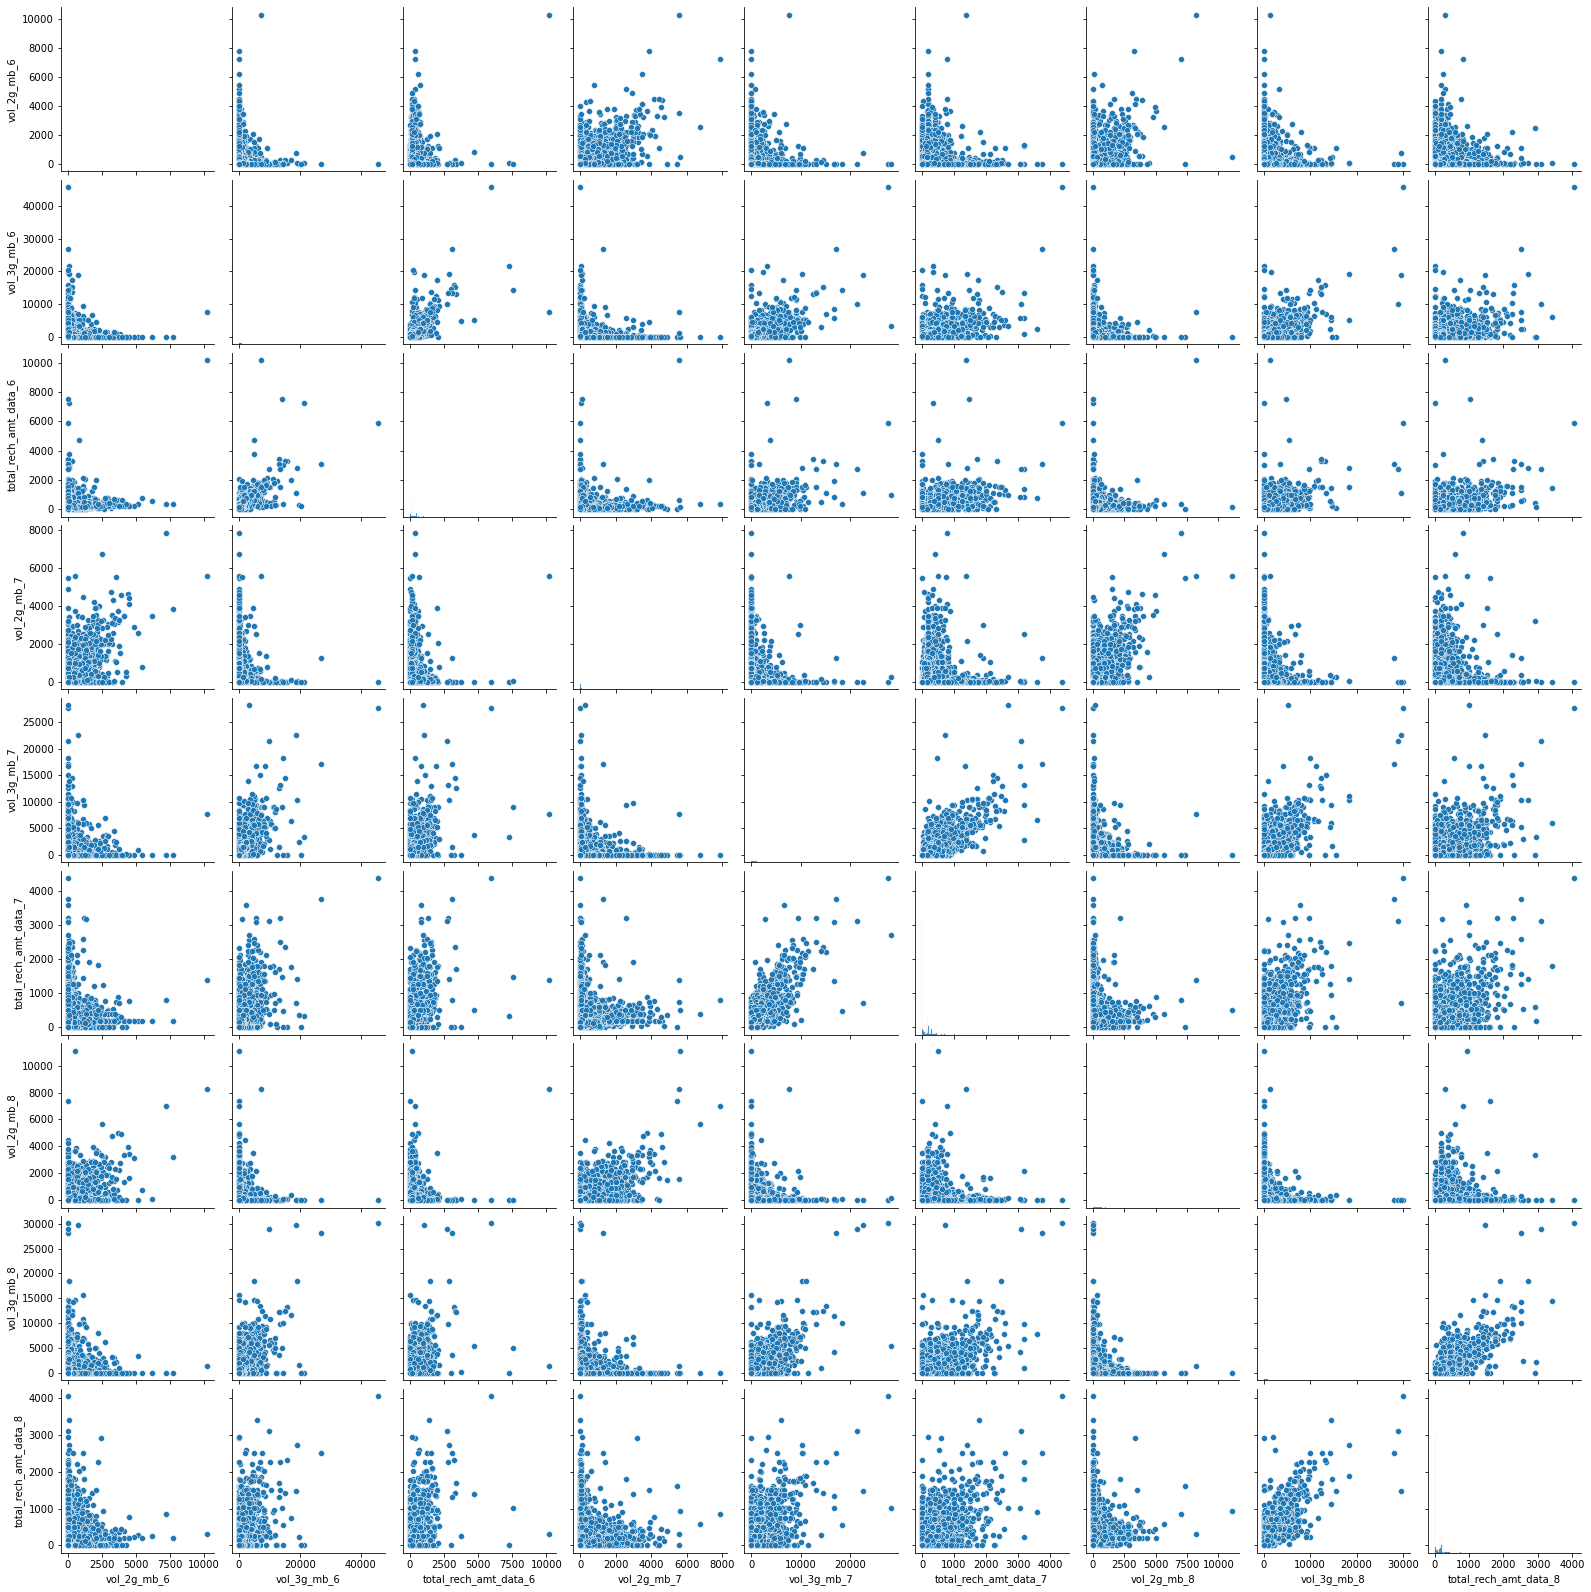

In [97]:
sns.pairplot(hvc[data])

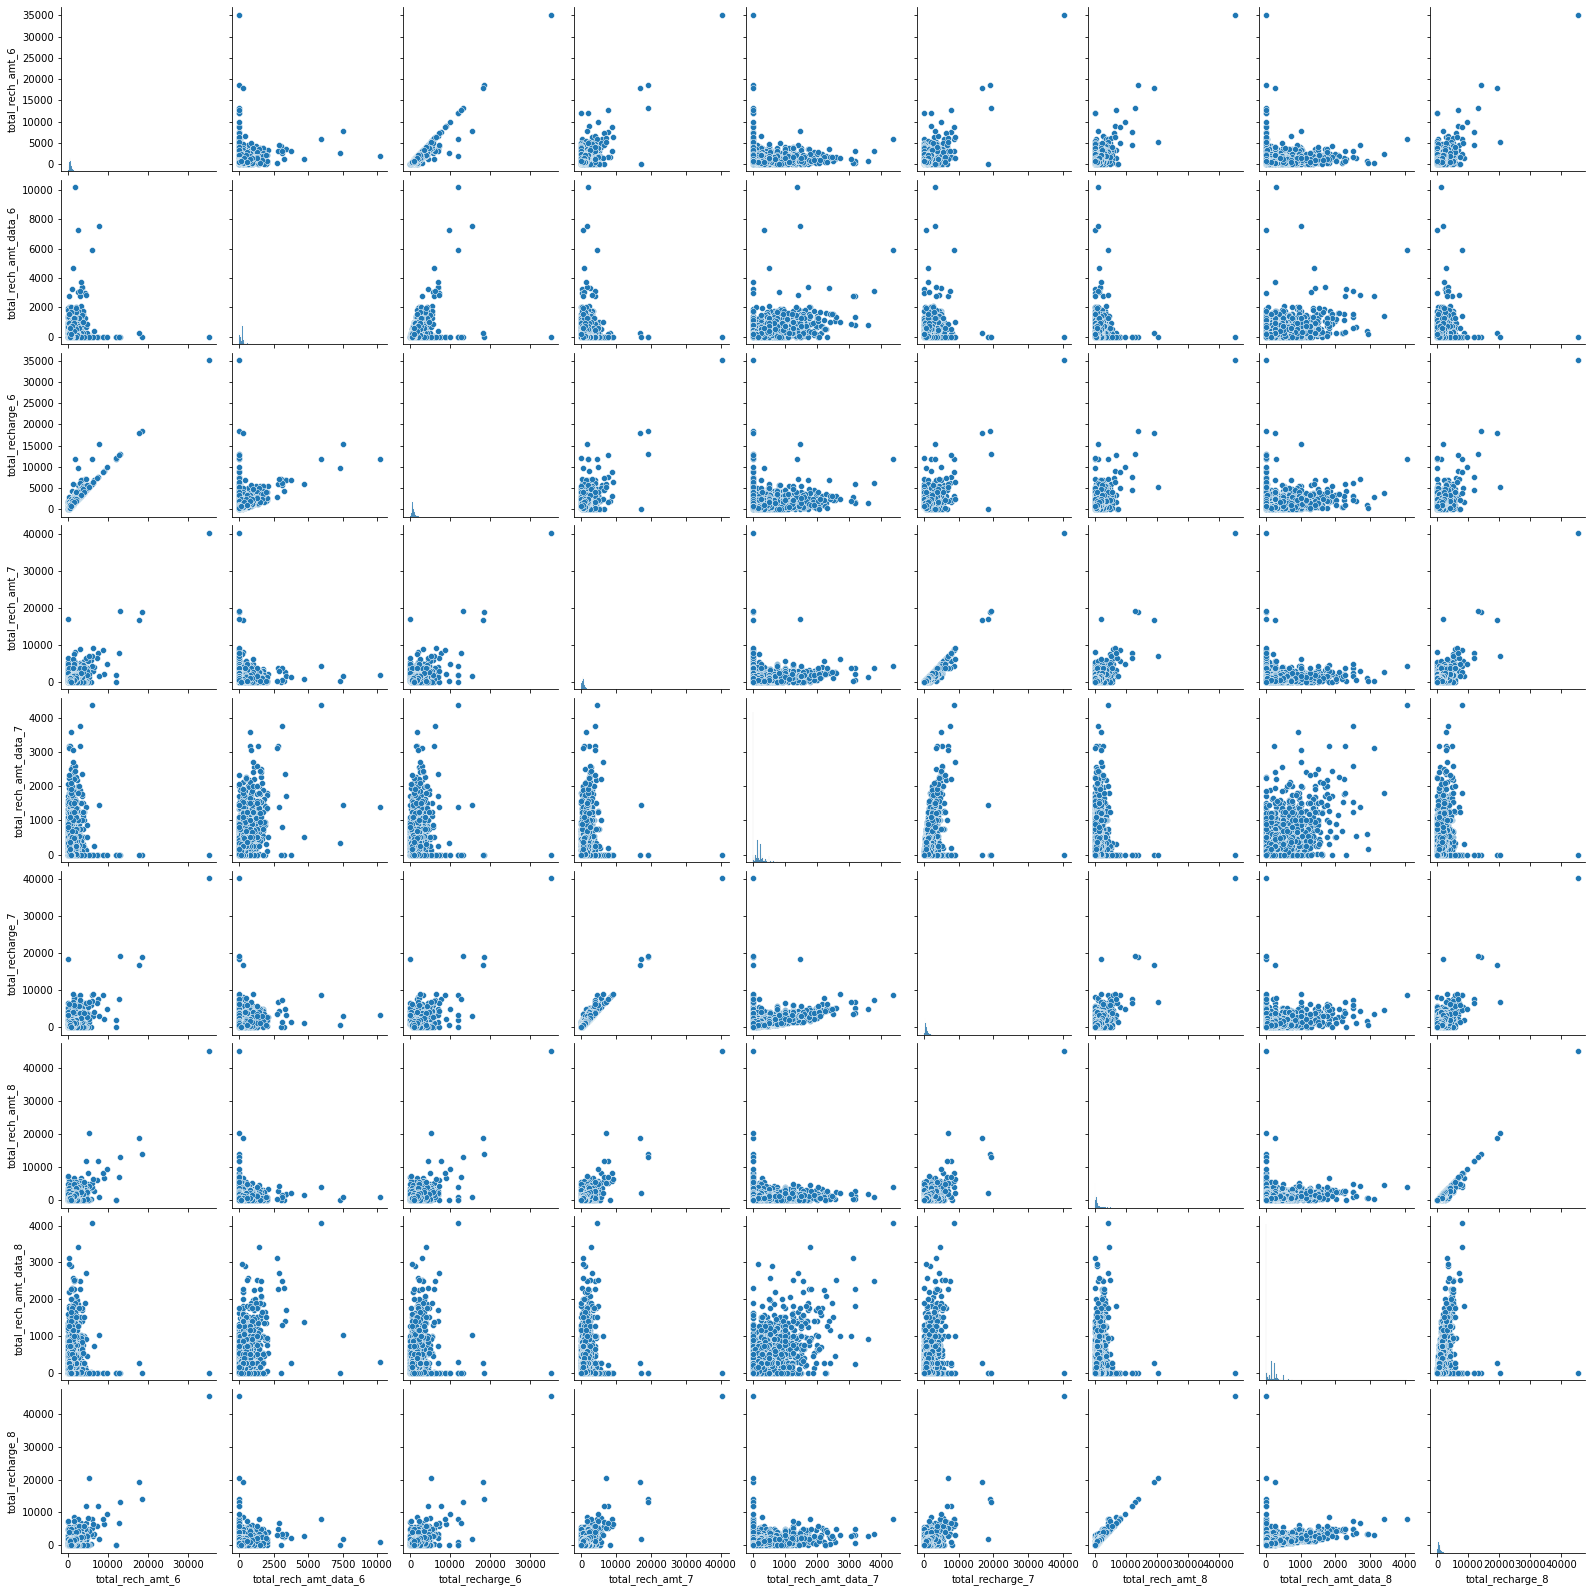

In [98]:
sns.pairplot(hvc[rech])

#### Insights:

- There is a linear relationship between the same type of columns for different months, indicating the customer behaviour largely remains the same from month to month.
- There is a very strong linear relationship between total recharge (calls + data) and total recharge for calls only, indicating that usually a large amount of the total recharge is contributed by customers recharging for calls only.

In [99]:
def plot_box(var):
    plt.figure(figsize=(16,6))
    for i in range(6,9):
        plt.subplot(1,3,i-5)
        plt.title(var + " for month " + str(i))
        p = sns.boxplot(hvc["churned"],hvc[var + str(i)])
        plt.yscale("log")

In [100]:
plot_list = ["total_og_mou_","total_ic_mou_","vol_2g_mb_","vol_3g_mb_","total_rech_amt_","total_rech_amt_data_","total_recharge_"]

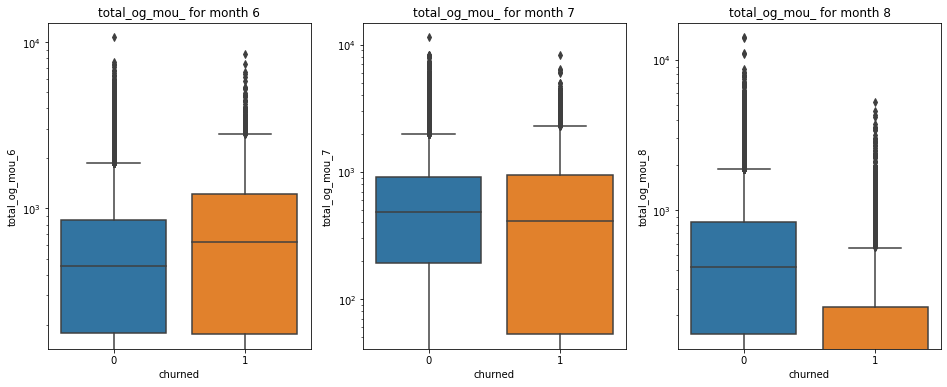

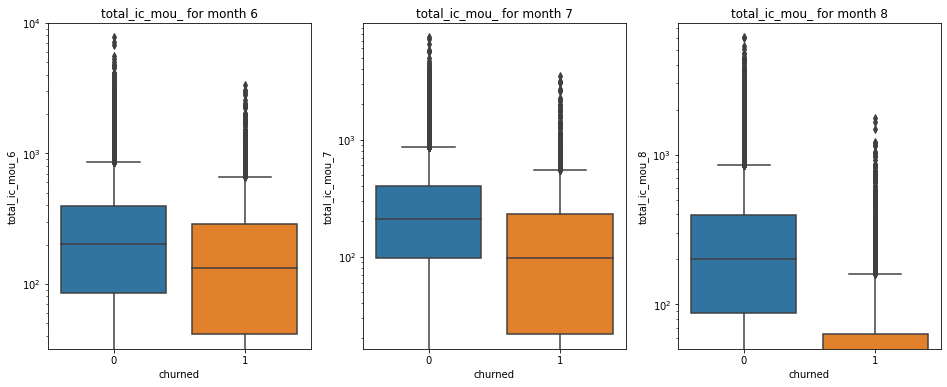

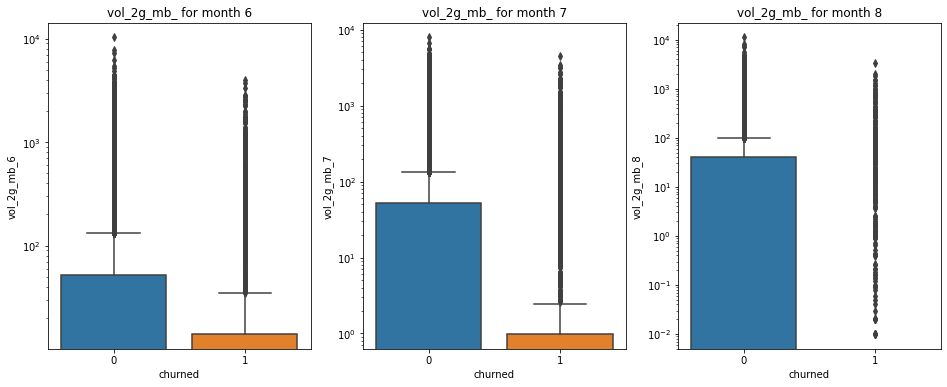

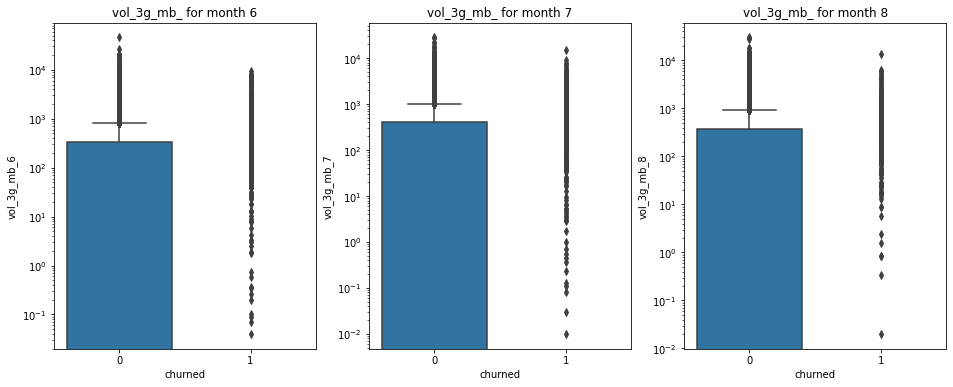

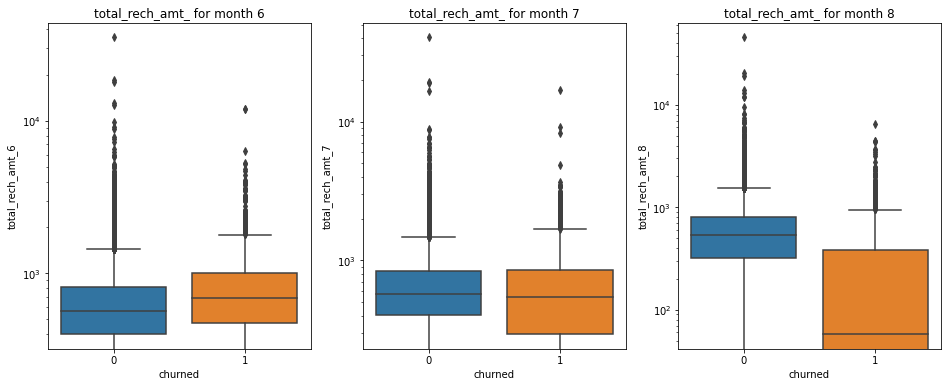

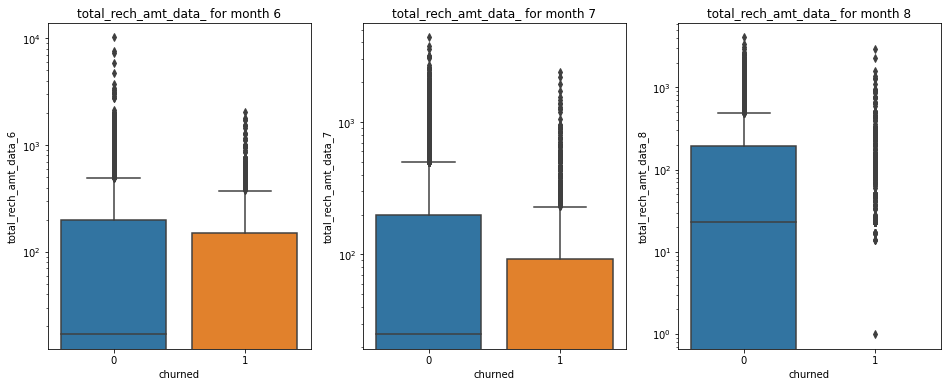

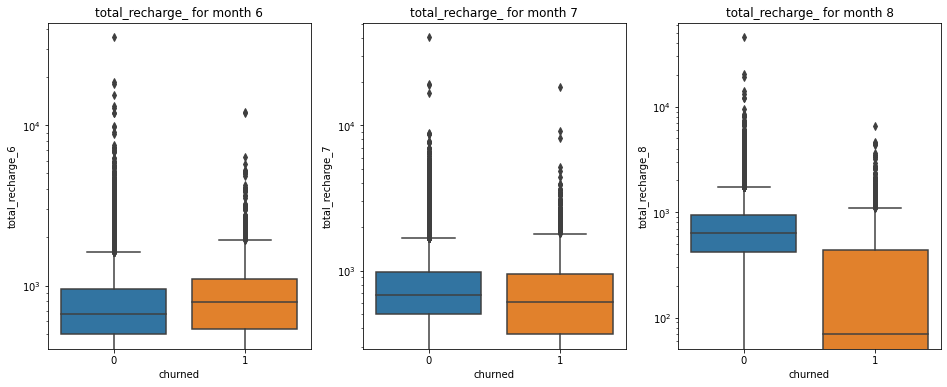

In [101]:
for var in plot_list:
    plot_box(var)

#### Inferences:
- It is quite evident that when a customer is about to churn in September, they tend to reduce their usage (calls and data) as well as recharge pattern.
- This is true across the board, including median values.
- **Hence, we can infer that we can identify when a customer is about to churn, and give them enticing offers to try and keep them within our network.**
- **We can also derive new features which compare the usage and recharge information for august against the patterns for previous months.**
- There are a few outliers in the dataset. We shall try to treat these as well.

## Feature Engineering

- As seen from our analysis above, some of the features that we can derive are the change in usage / recharge patterns between June/July and August.
- To implement this, we are going to subtract the relevant columns for August from the average of the same columns from June and July.

In [102]:
# We have already identified the generic forms of the suitable continuous variables fit for this purpose earlier.
num_vars_gen

['arpu_',
 'onnet_mou_',
 'offnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'loc_og_t2t_mou_',
 'loc_og_t2m_mou_',
 'loc_og_t2f_mou_',
 'loc_og_t2c_mou_',
 'loc_og_mou_',
 'std_og_t2t_mou_',
 'std_og_t2m_mou_',
 'std_og_t2f_mou_',
 'std_og_mou_',
 'isd_og_mou_',
 'spl_og_mou_',
 'og_others_',
 'total_og_mou_',
 'loc_ic_t2t_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2f_mou_',
 'loc_ic_mou_',
 'std_ic_t2t_mou_',
 'std_ic_t2m_mou_',
 'std_ic_t2f_mou_',
 'std_ic_mou_',
 'total_ic_mou_',
 'spl_ic_mou_',
 'isd_ic_mou_',
 'ic_others_',
 'total_rech_num_',
 'total_rech_amt_',
 'max_rech_amt_',
 'last_day_rch_amt_',
 'total_rech_data_',
 'max_rech_data_',
 'count_rech_2g_',
 'count_rech_3g_',
 'vol_2g_mb_',
 'vol_3g_mb_',
 'arpu_3g_',
 'arpu_2g_',
 'monthly_2g_',
 'sachet_2g_',
 'monthly_3g_',
 'sachet_3g_',
 'vbc_3g_',
 'total_rech_amt_data_',
 'total_recharge_',
 'avg_rech_int_call_',
 'avg_rech_int_data_']

In [103]:
# Defining "difference" values as described above for each of the features in the list "num_vars_gen"
print("No. of columns before deriving new features: ", hvc.shape[1])
for var in num_vars_gen:
    hvc[var+"diff"] = (hvc[var + "6"] + hvc[var + "7"])/2 - hvc[var + "8"]
print("No. of columns after deriving new features: ", hvc.shape[1])
hvc.head()

No. of columns before deriving new features:  163
No. of columns after deriving new features:  214


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7000875565   430.975   299.869   187.894        50.51        74.01   
4     7002124215   514.453   597.753   637.760       102.41       132.11   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        70.61        296.29        229.74        162.76           0.00   
4        85.14        757.93        896.68        983.39           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           2.83           0.00           0.00          17.74           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             42.61             65.16             67.38            273.29   
4              4.48              6.16             23.34             91.81   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3            145.99            128.28              0.00              4.48   
4             87.93            104.81              0.75              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3             10.26               0.0               0.0              0.00   
4              1.58               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        315.91        215.64        205.93              7.89   
4         97.04         94.09        129.74             97.93   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3              2.58              3.23             22.99             64.51   
4            125.94             61.79            665.36            808.74   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3             18.29              0.00              0.00        

In [104]:
hvc.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.002200e+04  30022.000000  30022.000000  30022.000000  30022.000000   
mean    7.001216e+09    576.333712    578.289350    524.491391    276.275455   
std     6.869250e+05    448.963621    468.986244    495.996314    460.816347   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000630e+09    345.394500    346.623250    266.076750     26.345000   
50%     7.001220e+09    490.321000    488.315000    442.815000    102.550000   
75%     7.001805e+09    701.982000    699.650500    666.108250    319.590000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30022.000000  30022.000000  30022.000000  30022.000000  30022.000000   
mean     284.283358    248.601856    393.397463    398.413268    352.449360   
std      482.687985    462.579655    478.521205    494.606170    480.366504   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       25.430000     16.880000     98.360000     96.087500     66.760000   
50%      100.390000     79.570000    250.825000    247.245000    209.215000   
75%      322.820000    265.505000    506.977500    512.237500    459.432500   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30022.000000   30022.000000   30022.000000   30022.000000   
mean       16.740677      13.033121      12.908676      27.802733   
std        77.941306      75.801616      74.452369     117.330781   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30022.000000   30022.000000      30022.000000      30022.000000   
mean       20.979105      20.586410         89.246339         90.319880   
std        96.961260     105.191329        233.091750        245.863063   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          6.115000          6.610000   
50%         0.000000       0.000000         28.335000         28.460000   
75%         0.000000       0.000000         84.225000         84.737500   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean          82.145974        171.451560        171.120780        158.866803   
std          231.509694        250.457123        241.340833        234.301413   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.932500         24.432500         26.830000         17.630000   
50%           24.480000         87.330000         89.580000         77.810000   
75%           77.610000        222.582500        221.582500        209.282500   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean           6.716370          6.809442          6.229841          1.541995   
std           22.410322         22.322211         19.898727          6.223404   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.260000          0.330000          0.030000 

In [105]:
hvc.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

### Replacing the index with mobile number since it is our id column

In [106]:
hvc.set_index("mobile_number", inplace=True, verify_integrity=True)
hvc.shape

(30022, 213)

In [107]:
hvc.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7000875565      430.975   299.869   187.894        50.51        74.01   
7002124215      514.453   597.753   637.760       102.41       132.11   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7000875565           70.61        296.29        229.74        162.76   
7002124215           85.14        757.93        896.68        983.39   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7000875565              0.00           2.83           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000842753              0.00           0.00              0.00   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7000875565             17.74           0.00             42.61   
7002124215              0.00           0.00              4.48   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7000875565                65.16             67.38            273.29   
7002124215                 6.16             23.34             91.81   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7000875565               145.99            128.28              0.00   
7002124215                87.93            104.81              0.75   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00               0.0   
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7000875565                 4.48             10.26               0.0   
7002124215                 0.00              1.58               0.0   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7000842753                  0.0              0.00          0.00          0.00   
7000701601                  0.0              0.00        422.16        533.91   
7001524846                  0.0              7.15        378.09        288.18   
7000875565                  0.0              0.00        315.91        215.64   
7002124215              

## Addressing outliers

- As seen in the earlier boxplots, there are some outliers in the dataset. 
- We shall cap these to reasonable values

In [108]:
# Define new list of numeric variables
num_vars_new = [col for col in list(hvc.columns) if (col not in cat_vars) & (col not in ["churned"])]
print("No. of continuous variables: ", len(num_vars_new))
#num_vars

No. of continuous variables:  206


In [109]:
# Function to cap outliers using the k-sigma method
def cap_outlier(arr, k=3):
    upper = arr.mean() + k * arr.std()
    lower = arr.mean() - k * arr.std()
    arr[arr<lower] = lower
    arr[arr>upper] = upper
    return arr

In [110]:
hvc.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30022.000000  30022.000000  30022.000000  30022.000000  30022.000000   
mean     576.333712    578.289350    524.491391    276.275455    284.283358   
std      448.963621    468.986244    495.996314    460.816347    482.687985   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      345.394500    346.623250    266.076750     26.345000     25.430000   
50%      490.321000    488.315000    442.815000    102.550000    100.390000   
75%      701.982000    699.650500    666.108250    319.590000    322.820000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30022.000000  30022.000000  30022.000000  30022.000000   30022.000000   
mean     248.601856    393.397463    398.413268    352.449360      16.740677   
std      462.579655    478.521205    494.606170    480.366504      77.941306   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       16.880000     98.360000     96.087500     66.760000       0.000000   
50%       79.570000    250.825000    247.245000    209.215000       0.000000   
75%      265.505000    506.977500    512.237500    459.432500       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30022.000000   30022.000000   30022.000000   30022.000000   
mean       13.033121      12.908676      27.802733      20.979105   
std        75.801616      74.452369     117.330781      96.961260   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30022.000000      30022.000000      30022.000000      30022.000000   
mean       20.586410         89.246339         90.319880         82.145974   
std       105.191329        233.091750        245.863063        231.509694   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.115000          6.610000          3.932500   
50%         0.000000         28.335000         28.460000         24.480000   
75%         0.000000         84.225000         84.737500         77.610000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean         171.451560        171.120780        158.866803          6.716370   
std          250.457123        241.340833        234.301413         22.410322   
min            0.000000          0.000000          0.000000          0.000000   
25%           24.432500         26.830000         17.630000          0.000000   
50%           87.330000         89.580000         77.810000          0.260000   
75%          222.582500        221.582500        209.282500          4.830000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean           6.809442          6.229841          1.541995          1.848881   
std           22.322211         19.898727          6.223404          9.091663   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.330000          0.0300

In [111]:
# Making a back-up of the dataframe
hvc2 = hvc.copy()

In [112]:
# Capping outliers in the numeric columns
hvc[num_vars_new] = hvc[num_vars_new].apply(cap_outlier, axis=0)
hvc.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30022.000000  30022.000000  30022.000000  30022.000000  30022.000000   
mean     565.942612    568.185545    514.237112    260.212849    267.916485   
std      341.917045    346.603428    376.489549    374.168323    391.447291   
min     -770.557151   -828.669383   -945.808000      0.000000      0.000000   
25%      345.394500    346.623250    266.076750     26.345000     25.430000   
50%      490.321000    488.315000    442.815000    102.550000    100.390000   
75%      701.982000    699.650500    666.108250    319.590000    322.820000   
max     1923.224574   1985.248082   2012.480333   1658.724496   1732.347314   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30022.000000  30022.000000  30022.000000  30022.000000   30022.000000   
mean     231.348561    378.519549    382.527315    336.982418      12.924922   
std      360.818475    401.762272    409.697441    385.859043      42.846733   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       16.880000     98.360000     96.087500     66.760000       0.000000   
50%       79.570000    250.825000    247.245000    209.215000       0.000000   
75%      265.505000    506.977500    512.237500    459.432500       0.000000   
max     1636.340822   1828.961077   1882.231776   1793.548872     250.564594   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30022.000000   30022.000000   30022.000000   30022.000000   
mean        9.592373       9.627550      21.816430      15.800249   
std        36.199951      35.938608      68.770821      53.812825   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       240.437970     236.265784     379.795076     311.862886   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30022.000000      30022.000000      30022.000000      30022.000000   
mean       15.635467         77.964355         78.562210         71.878226   
std        54.667684        137.389014        139.743078        129.996286   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.115000          6.610000          3.932500   
50%         0.000000         28.335000         28.460000         24.480000   
75%         0.000000         84.225000         84.737500         77.610000   
max       336.160398        788.521588        827.909068        776.675055   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean         162.936939        163.402447        151.204550          5.830318   
std          201.049348        197.686160        191.722926         13.180737   
min            0.000000          0.000000          0.000000          0.000000   
25%           24.432500         26.830000         17.630000          0.000000   
50%           87.330000         89.580000         77.810000          0.260000   
75%          222.582500        221.582500        209.282500          4.830000   
max          922.822929        895.143280        861.771041         73.947335   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30022.000000      30022.000000      30022.000000      30022.000000   
mean           5.921052          5.386902          1.279103          1.551434   
std           13.266615         12.175045          3.640865          4.515917   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.330000          0.0300

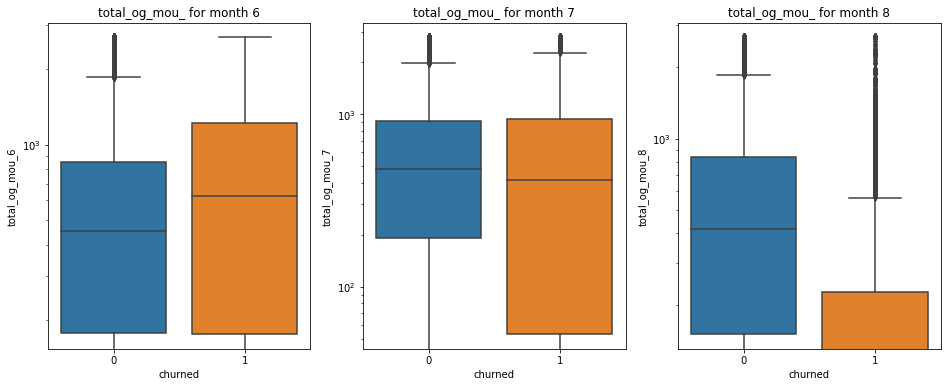

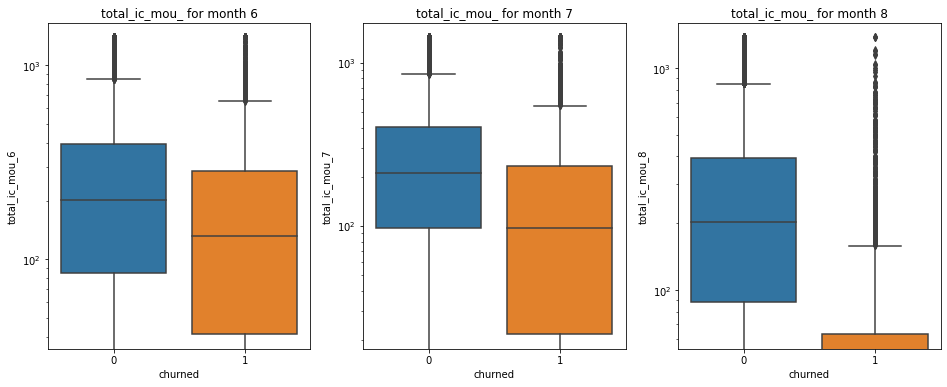

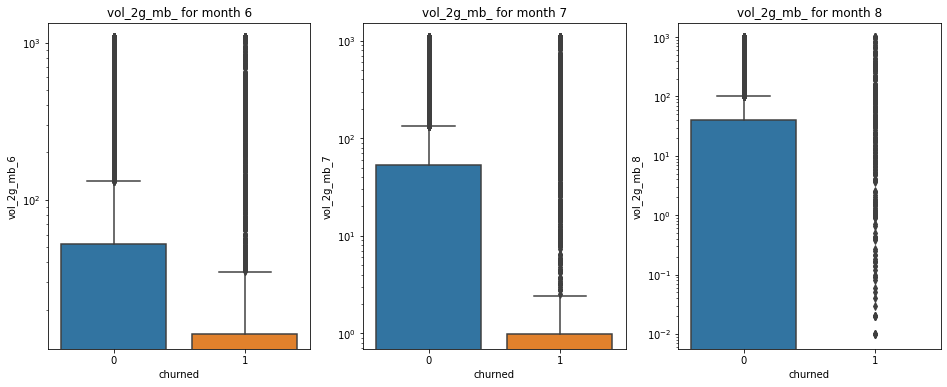

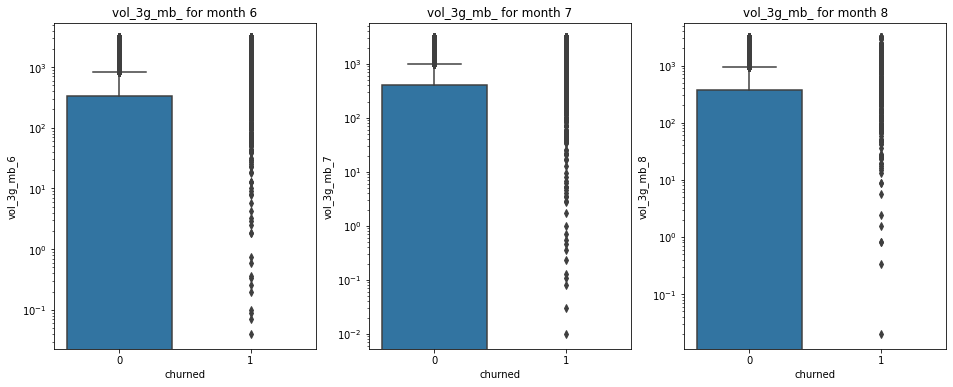

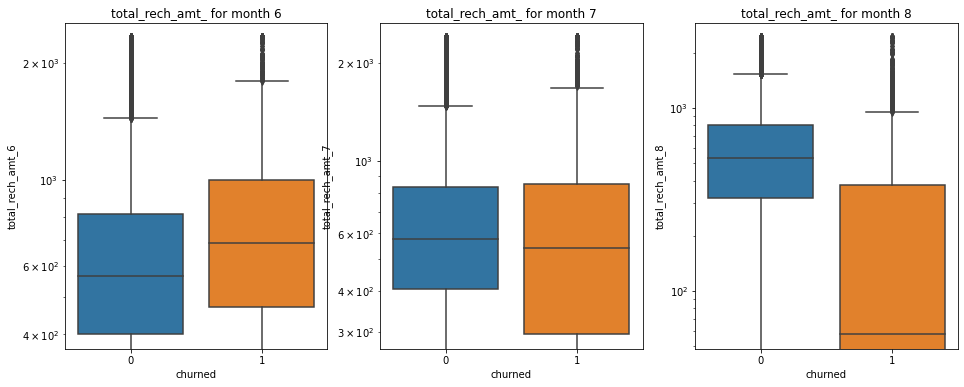

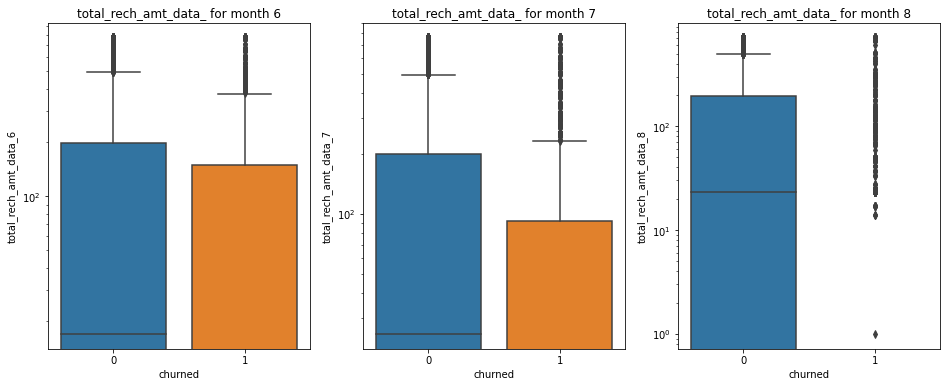

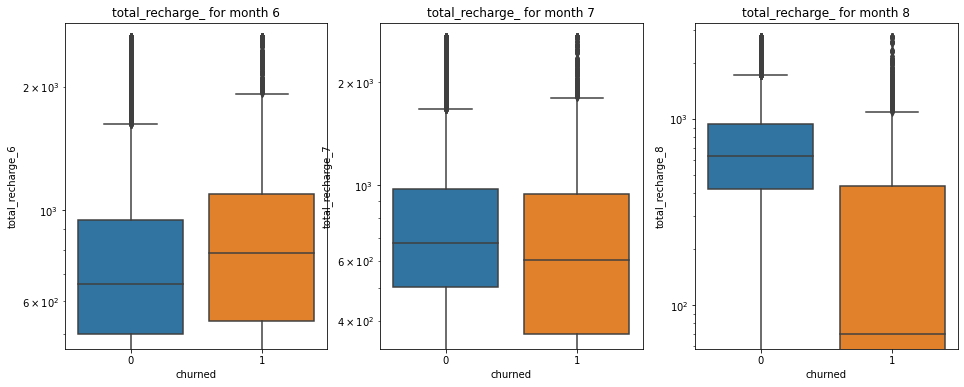

In [113]:
# Checking the box plots once again.
for var in plot_list:
    plot_box(var)

- We can see from the change in max values above as well as the boxplots that several outliers have been capped.
- The capping has been done to **3 standard deviations** from the mean. Hence, the median values of the resulting dataset are largely similar.

#### This ends the EDA and Data cleaning portion of this analysis. We shall move on to modelling next

## Data Preprocessing: Train - test split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
# Defining our target variable and independent variables
y = hvc.churned
X = hvc.drop("churned", axis = 1)
print(X.shape)
print(y.shape)

(30022, 212)
(30022,)


In [116]:
# Performing train-test split with an aim of keeping the same ratio of class imbalance in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21015, 212)
(21015,)
(9007, 212)
(9007,)


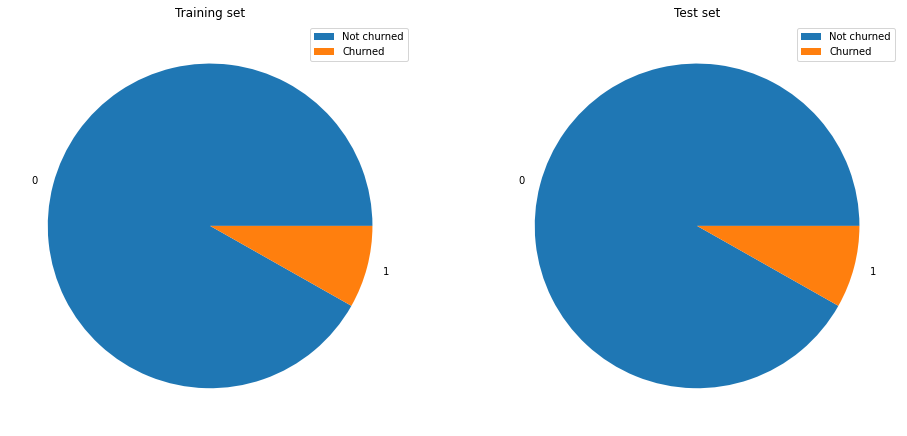

Percentage of churn and non-churn customers in train set:
0    91.81
1     8.19
Name: churned, dtype: float64

Percentage of churn and non-churn customers in test set:
0    91.81
1     8.19
Name: churned, dtype: float64


In [117]:
# Checking whether the target class ratio is maintained between train and test sets.
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
(y_train.value_counts(normalize=True)*100).plot(kind = "pie")
plt.ylabel("")
plt.title("Training set")
plt.legend(["Not churned", "Churned"], loc= "upper right")

plt.subplot(1,2,2)
(y_test.value_counts(normalize=True)*100).plot(kind = "pie")
plt.ylabel("")
plt.title("Test set")
plt.legend(["Not churned", "Churned"], loc= "upper right")
plt.show()

print("Percentage of churn and non-churn customers in train set:")
print(round(y_train.value_counts(normalize=True)*100,2))

print("\nPercentage of churn and non-churn customers in test set:")
print(round(y_test.value_counts(normalize=True)*100,2))

#### Hence, we can verify that the churn ratio has been maintained between train and test sets. 

## Data Preprocessing: Standardazing numeric variables to bring them to the same scale

In [118]:
hvc.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

In [119]:
# Defining continuous variables: All columns except categorical variables
print("Our categorical variables are: ", cat_vars)
cont_vars = [col for col in X_train.columns if col not in cat_vars]
print("\nNo. of continuous variables: ", len(cont_vars))
print("Our continuous variables are: ", cont_vars)

Our categorical variables are:  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

No. of continuous variables:  206
Our continuous variables are:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_

In [120]:
# Applying Standard scalar on continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7001532559    -0.603382 -0.730809  0.011186    -0.376305    -0.310714   
7001562737    -0.579285 -0.199579 -1.365883     0.189025     0.161744   
7001429271     0.468169  0.815983 -0.471545    -0.554707    -0.516615   
7000491369    -0.352637 -0.212977 -1.126106     1.371591     1.401916   
7001407903    -0.104793 -0.621104  0.531554    -0.676923    -0.635235   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7001532559        0.068414      0.092297      0.205073      0.048697   
7001562737       -0.643059     -0.313216     -0.379551     -0.875852   
7001429271       -0.594689      3.258545      3.647727      1.161617   
7000491369       -0.336524     -0.879361     -0.657542     -0.790178   
7001407903       -0.522926     -0.733334     -0.744804     -0.308218   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7001532559         -0.303376      -0.267615      -0.268455      -0.318771   
7001562737         -0.303376       0.001389      -0.268455      -0.318771   
7001429271         -0.303376      -0.267615      -0.268455      -0.318771   
7000491369         -0.303376      -0.267615      -0.268455      -0.318771   
7001407903         -0.303376      -0.267615      -0.268455      -0.318771   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7001532559         -0.295969      -0.285790          0.269892   
7001562737          0.970983      -0.285790         -0.556354   
7001429271         -0.295969      -0.046471         -0.322446   
7000491369         -0.295969      -0.285790         -0.391178   
7001407903         -0.295969      -0.285790         -0.510728   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7001532559             0.471965          1.276536          1.097450   
7001562737            -0.407974         -0.555144         -0.666888   
7001429271            -0.431975         -0.512319         -0.731491   
7000491369            -0.310543         -0.518327         -0.708661   
7001407903            -0.417802         -0.221712         -0.409919   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7001532559             1.041774          0.714926          0.271094   
7001562737            -0.656192         -0.793617         -0.442813   
7001429271            -0.785520         -0.786931         -0.442813   
7000491369            -0.302940         -0.621184         -0.442813   
7001407903            -0.460838          0.153643         -0.311687   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7001532559             0.082696          2.286641         -0.355520   
7001562737            -0.447231         -0.441945         -0.355520   
7001429271            -0.447231         -0.441945         -0.355520   
7000491369            -0.447231         -0.441945         -0.025083   
7001407903            -0.126686          1.584225         -0.355520   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7001532559            -0.346347         -0.352773      0.832958      0.881355   
7001562737            -0.346347         -0.352773     -0.734513     -0.663634   
7001429271             0.076922         -0.352773     -0.671913     -0.759567   
7000491369            -0.268784         -0.352773     -0.687777     -0.386788   
7001407903            -0

In [121]:
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  2.101500e+04  2.101500e+04  2.101500e+04  2.101500e+04  2.101500e+04   
mean   7.163223e-17  1.671436e-16  7.453260e-17  9.995441e-18 -2.831689e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -3.938386e+00 -4.027648e+00 -2.282148e+00 -6.990761e-01 -6.880549e-01   
25%   -6.461548e-01 -6.406442e-01 -6.589388e-01 -6.274266e-01 -6.212815e-01   
50%   -2.174147e-01 -2.279362e-01 -1.857428e-01 -4.162503e-01 -4.269525e-01   
75%    4.017399e-01  3.856684e-01  4.020603e-01  1.612938e-01  1.451658e-01   
max    3.998039e+00  4.081578e+00  3.976944e+00  3.738821e+00  3.747324e+00   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  2.101500e+04  2.101500e+04  2.101500e+04  2.101500e+04   2.101500e+04   
mean  -1.613508e-16  8.402088e-17 -1.404116e-16  2.239359e-16  -3.130839e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min   -6.430587e-01 -9.444006e-01 -9.324920e-01 -8.758515e-01  -3.033759e-01   
25%   -5.964653e-01 -6.980774e-01 -6.985573e-01 -7.005863e-01  -3.033759e-01   
50%   -4.198597e-01 -3.169483e-01 -3.312480e-01 -3.321737e-01  -3.033759e-01   
75%    9.465262e-02  3.147961e-01  3.135052e-01  3.253628e-01  -3.033759e-01   
max    3.897905e+00  3.606261e+00  3.647727e+00  3.779069e+00   5.435625e+00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   2.101500e+04   2.101500e+04   2.101500e+04   2.101500e+04   
mean    1.239493e-15   1.553557e-15   1.919209e-15  -1.072714e-16   
std     1.000024e+00   1.000024e+00   1.000024e+00   1.000024e+00   
min    -2.676153e-01  -2.684552e-01  -3.187710e-01  -2.959689e-01   
25%    -2.676153e-01  -2.684552e-01  -3.187710e-01  -2.959689e-01   
50%    -2.676153e-01  -2.684552e-01  -3.187710e-01  -2.959689e-01   
75%    -2.676153e-01  -2.684552e-01  -3.187710e-01  -2.959689e-01   
max     6.339006e+00   6.260002e+00   5.164715e+00   5.452000e+00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   2.101500e+04      2.101500e+04      2.101500e+04      2.101500e+04   
mean    4.745827e-16      5.018060e-17      1.665282e-16     -3.469612e-16   
std     1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min    -2.857903e-01     -5.712704e-01     -5.647317e-01     -5.551437e-01   
25%    -2.857903e-01     -5.257172e-01     -5.169422e-01     -5.248352e-01   
50%    -2.857903e-01     -3.606142e-01     -3.586885e-01     -3.650513e-01   
75%    -2.857903e-01      4.819500e-02      4.086296e-02      4.702079e-02   
max     5.790481e+00      5.194332e+00      5.331744e+00      5.427027e+00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      2.101500e+04      2.101500e+04      2.101500e+04      2.101500e+04   
mean      -2.062062e-16      1.061170e-16      2.324680e-16     -1.174353e-15   
std        1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min       -8.146386e-01     -8.288815e-01     -7.936173e-01     -4.428132e-01   
25%       -6.905159e-01     -6.931684e-01     -7.007144e-01     -4.428132e-01   
50%       -3.740279e-01     -3.708845e-01     -3.824623e-01     -4.236427e-01   
75%        3.066283e-01      2.936731e-01      3.118156e-01     -7.780802e-02   
max        3.785494e+00      3.689723e+00      3.707990e+00      5.227598e+00   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      2.101500e+04      2.101500e+04      2.101500e+04      2.101500e+04   
mean       6.258456e-16     -2.371553e-15     -4.061044e-17     -5.507213e-16   
std        1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min       -4.472306e-01     -4.419453e-01     -3.555202e-01     -3.463469e-01   
25%       -4.472306e-01     -4.419453e-01     -3.555202e-01     -3.463469e-01   
50%       -4.221047e-01     -4.386359e-

In [122]:
# Applying the scalar to the test dataset as well for future use
X_test[cont_vars] = scaler.transform(X_test[cont_vars])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7002378251    -0.874406 -1.005664 -0.898806    -0.686929    -0.687261   
7002229628    -0.763072 -0.230645 -0.270047     1.009116     1.354729   
7000138219    -0.711608 -0.516837  0.702683     0.067558    -0.209171   
7001704769     0.943227  1.145560 -0.897340     1.829340     0.583123   
7002254586     0.582049 -0.023782 -0.275885     1.928226     1.256208   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7002378251       -0.640811     -0.692205     -0.775952     -0.766768   
7002229628        1.414408     -0.851196     -0.840242     -0.752546   
7000138219        0.031173     -0.333345     -0.269610      0.178413   
7001704769       -0.240923     -0.286519     -0.677277     -0.845148   
7002254586        1.008082     -0.060299     -0.417196     -0.205260   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7002378251         -0.303376      -0.267615      -0.268455      -0.318771   
7002229628         -0.303376      -0.267615      -0.268455      -0.318771   
7000138219         -0.303376      -0.267615      -0.110677      -0.318771   
7001704769         -0.303376       2.775786      -0.268455      -0.318771   
7002254586         -0.124493      -0.267615      -0.268455      -0.266794   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7002378251         -0.295969      -0.285790         -0.544143   
7002229628         -0.295969      -0.285790         -0.545459   
7000138219         -0.295969      -0.121665          0.909977   
7001704769          3.164282      -0.285790          1.600295   
7002254586         -0.295969      -0.285790         -0.192294   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7002378251            -0.562524         -0.548905         -0.351098   
7002229628            -0.375782         -0.374217         -0.671175   
7000138219             0.275608         -0.108565          0.018978   
7001704769            -0.409968         -0.551293          0.192949   
7002254586            -0.117035         -0.284485          0.007562   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7002378251            -0.559777         -0.666891          0.070188   
7002229628            -0.792587         -0.593603         -0.442813   
7000138219             0.125376          0.915881          0.244255   
7001704769            -0.596879         -0.751619         -0.231172   
7002254586            -0.384615         -0.146770          0.305601   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7002378251            -0.332261          0.773426         -0.355520   
7002229628            -0.447231         -0.441945         -0.355520   
7000138219             1.179096          0.053635         -0.355520   
7001704769            -0.447231         -0.441945          0.234352   
7002254586             1.000170          0.466480         -0.355520   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7002378251            -0.346347         -0.352773     -0.498463     -0.667241   
7002229628            -0.102579         -0.352773     -0.732473     -0.738091   
7000138219            -0.346347         -0.352773      0.407857      0.237058   
7001704769            -0.346347         -0.352773      0.813046     -0.625711   
7002254586            -0

# Modelling 1 - High Performance model

- For our high performance model, we are not very interested in finding out the most important features. We are more interested in obtaining the best performing and most efficient model.
- The following combinations have been tested to seek the best results:
    - PCA + Logistic Regression
    - Random Forest 
    - PCA + Random Forest
    - AdaBoost
    - SMOTE oversampling + AdaBoost
    - Gradient Boost 
    - PCA + Gradient Boost

### Functions to obtain optimal cut-off and subsequently apply them

In [123]:
''' 
    This function produces a plot of Sensitivity vs Specificity from the predicted probability values
    to give us an idea of the optimal cut-off for making churn predictions.
'''

def cutoff(y_train,y_train_pred_prob):
    # Creating a dataframe of actual churn values and the predicted probability of churn
    df = pd.DataFrame({"Churned":y_train,"Churn_Prob":y_train_pred_prob}, index = y_train.index)
    
    # Assigning churn predictions for different cut-off values for the probability
    thresh = [float(x)/10 for x in range(10)]
    for i in thresh:
        df[i] = df.Churn_Prob.map(lambda x: 1 if x>i else 0)
    
    # Calculating sensitivity, specificity and accuracy for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    for i in thresh:
        cm1 = confusion_matrix(df.Churned, df[i])
        total1 = sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i , sensi, speci, accuracy]
    
    # Plotting accuracy, sensitivity & specificity
    cutoff_df.plot(x="Probability",y=['Sensitivity','Specificity','Accuracy'])
    #plt.figure(figsize=(12,8))
    plt.xlabel("Churn Probability")
    plt.title("Sensitivity vs Specificity Plot")
    plt.show()

In [124]:
# Function to return predicted value based on predicted probability and cut-off (Default = 0.5)
def pred_array(y_test_pred_prob, cutoff = 0.5):
    df = pd.DataFrame({'Prob':y_test_pred_prob})
    df["pred"] = df.Prob.map(lambda x : 1 if x>cutoff else 0)
    return df.pred

### Evaluation Metrics

#### For our current analysis, sensitivity (= recall) is our most important metric, since we want to ensure that we are predicting a large percentage of customers who are prone to churn. In the process, if we falsely predict some non-churn customers as churn, that should be acceptable.

In [125]:
# Defining function for evaluation metrics which will be used on test data for all models
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score

def eval_metrics(y_test, y_pred, model):
    f1 = f1_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    conf = confusion_matrix(y_test,y_pred)
    spec = (conf[0,0])/(conf[0,1]+conf[0,0])
    df = pd.DataFrame({model:[recall, spec, accuracy, roc_auc, f1]}, 
                      index = ['Sensitivity','Specificity','Accuracy','ROC_AUC', 'F1_score'])
    fpr,tpr, thresh = roc_curve(y_test,y_pred)
    plt.figure(figsize = (10,7))
    plt.plot(fpr,tpr)
    plt.plot([0,1],[1,0],'k--')
    plt.title ("ROC Curve")
    return df

## Principal Component Analysis

In [126]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train)
pca.components_

array([[-2.89900525e-02, -2.14759057e-02,  1.71417807e-03, ...,
        -2.57337648e-02,  4.25804892e-03, -1.26927546e-02],
       [ 1.17122771e-01,  1.51052405e-01,  1.88474338e-01, ...,
        -8.84076665e-02,  6.91042278e-02,  5.88078906e-02],
       [ 7.00224718e-02, -9.31311137e-03, -1.07818149e-01, ...,
         1.84201470e-01, -1.22221033e-01, -9.08576227e-02],
       ...,
       [ 1.80757754e-03, -7.48387431e-04, -1.31431800e-03, ...,
        -1.35539071e-02, -1.33456248e-04,  1.34454416e-03],
       [ 1.61525260e-04,  3.05140481e-04, -8.16576894e-04, ...,
        -5.62153403e-03,  5.14564376e-05,  6.40294624e-04],
       [-2.49622839e-04, -9.12149032e-05,  2.44681551e-04, ...,
         1.95277408e-04, -1.29112134e-05, -5.45590505e-01]])

#### Checking explained variance vs number of Principal Components

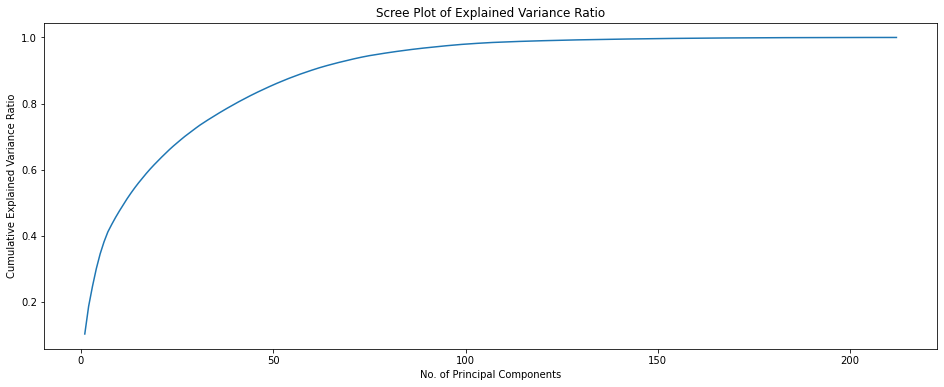

In [127]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(16,6))
plt.plot(range(1,len(var_cumu)+1),var_cumu)
plt.title("Scree Plot of Explained Variance Ratio")
plt.xlabel("No. of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

Text(0, 0.5, 'Explained Variance Ratio')

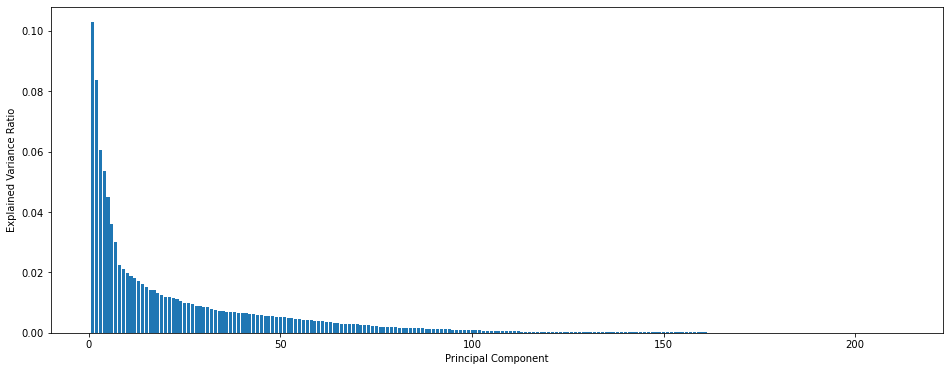

In [128]:
plt.figure(figsize=(16,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

In [129]:
print(pd.Series(np.cumsum(pca.explained_variance_ratio_)*100))

0       10.282947
1       18.646229
2       24.694422
3       30.057285
4       34.538936
5       38.154580
6       41.170703
7       43.422417
8       45.539063
9       47.505293
10      49.377316
11      51.207419
12      52.910885
13      54.523176
14      56.037490
15      57.462825
16      58.868125
17      60.193781
18      61.443194
19      62.641414
20      63.812985
21      64.958259
22      66.063816
23      67.119003
24      68.121457
25      69.097049
26      70.055096
27      70.947203
28      71.830087
29      72.692488
30      73.531522
31      74.307634
32      75.048097
33      75.778064
34      76.503568
35      77.203143
36      77.897650
37      78.574588
38      79.233689
39      79.886737
40      80.530245
41      81.148816
42      81.761188
43      82.361368
44      82.948598
45      83.507335
46      84.058032
47      84.597747
48      85.133032
49      85.649776
50      86.158266
51      86.644936
52      87.123598
53      87.594133
54      88.035579
55      88

**Insights:**
- 99% of variance is explained by 120 principal components
- **Hence, we can proceed with a reasonable value of 120 principal components while retaining 99% of the original variance.**

In [130]:
# Creating new dataframe for X_train with only 100 Principal Components.
pca2 = PCA(n_components=120,random_state=42)
pca2_array = pca2.fit_transform(X_train)
pc_columns = ["PC" + str(i) for i in range(1,121)]
X_train_pca = pd.DataFrame(pca2_array,columns=pc_columns, index=X_train.index)
print("Shape of new X_train set after PCA: ", X_train_pca.shape)
X_train_pca.head()

Shape of new X_train set after PCA:  (21015, 120)


PC1       PC2       PC3       PC4       PC5       PC6  \
mobile_number                                                                
7001532559      2.350482  2.724249  2.267887 -2.775443 -1.452916 -0.976430   
7001562737     -2.170310 -6.303343  1.346723  2.061183  2.817303 -0.499317   
7001429271     -6.235345 -1.457031  0.416091  5.798541 -1.169970  2.486772   
7000491369     -4.674034 -4.596587  1.555892  1.863579  0.051126  2.041584   
7001407903     10.106457  0.935169 -2.832385  1.632586 -3.984615  1.986589   

                    PC7       PC8       PC9      PC10      PC11      PC12  \
mobile_number                                                               
7001532559    -0.355552  1.025141  2.642874  0.559105 -1.501085 -0.236597   
7001562737    -0.518426 -0.185351 -0.533831 -2.194355  2.802292  0.408831   
7001429271    -0.400117 -5.706964 -0.002685 -1.797555 -2.951681  2.586676   
7000491369    -0.671806  2.750052  0.004422 -0.011231  1.473906  1.453581   
7001407903    -2.403027  0.688921  1.422149 -2.206970  0.855234  0.957539   

                   PC13      PC14      PC15      PC16      PC17      PC18  \
mobile_number                                                               
7001532559    -0.484410 -1.418231 -3.320289 -1.021532 -0.378473  0.227719   
7001562737     0.845526 -0.850469  2.876784  1.138114 -0.859294 -0.220296   
7001429271     0.225493 -1.359512  1.576552 -1.970245 -1.273584 -1.254647   
7000491369     1.405225 -0.108530  1.120746  0.229791 -1.378440 -0.963773   
7001407903     0.042204  0.098119 -2.546783 -0.670646 -1.431793  0.446696   

                   PC19      PC20      PC21      PC22      PC23      PC24  \
mobile_number                                                               
7001532559    -0.922217  0.679764  1.003472 -0.198041 -1.902912 -0.203176   
7001562737     0.982350 -0.593727 -0.476251  0.591191 -0.374375 -0.164407   
7001429271     0.863380  2.558494 -0.229117  0.754346  0.127937  1.905348   
7000491369     0.806578 -1.063501  1.135305  0.064408 -0.922735 -0.292970   
7001407903    -0.299192 -0.597946  1.191040  0.581272 -0.839079  0.159845   

                   PC25      PC26      PC27      PC28      PC29      PC30  \
mobile_number                                                               
7001532559    -0.039939 -1.075622 -0.870172 -0.577840  0.847246 -0.414737   
7001562737     0.362666  0.508031  0.381238 -0.670585  0.144110 -0.479410   
7001429271     0.501658 -1.283934 -2.091262 -0.730184  1.665801  1.975375   
7000491369    -0.337814  0.691730  2.166903  0.045421 -0.986165 -0.092945   
7001407903    -2.134361  1.278274 -0.966756 -0.879558 -0.194543  0.977676   

                   PC31      PC32      PC33      PC34      PC35      PC36  \
mobile_number                                                               
7001532559     2.439706 -0.929305 -2.175065  0.057774  2.396875 -1.051259   
7001562737     0.061445 -0.195357  0.012118 -0.396213  0.470102 -0.118168   
7001429271     0.623957 -0.691854 -0.090807 -0.552225 -0.206419 -0.302127   
7000491369     0.510926 -0.533170 -0.374934 -0.609673  0.188699 -0.108950   
7001407903     1.075189 -1.007853 -0.911167 -1.198502  0.210592 -0.654585   

                   PC37      PC38      PC39      PC40      PC41      PC42  \
mobile_number                                                               
7001532559    -0.547199 -1.848631 -0.824287  0.532372  1.118373  0.109463   
7001562737     0.831607  0.065149  0.561313  0.219987 -0.558013  0.091801   
7001429271     0.183048 -0.372810 -0.399598 -0.961563  1.269988  0.397530   
7000491369     0.714207 -0.305485 -0.098601  0.584854  0.074627  0.211272   
7001407903     0.312885  1.582610  0.650629  0.206155 -0.455321 -0.997184   

                   PC43      PC44      PC45      PC46      PC47      PC48  \
mobile_number                                                               
7001532559    -0.120305  0.090637 -2.524081 -2.664874  1.194705 -1.731943   
700

In [131]:
# Applying PCA (transform only) to the test set for future use
pca2_array_test = pca2.transform(X_test)
X_test_pca = pd.DataFrame(pca2_array_test,columns=pc_columns,index=X_test.index)
print("Shape of new X_test set after PCA: ", X_test_pca.shape)
X_test_pca.head()

Shape of new X_test set after PCA:  (9007, 120)


PC1       PC2       PC3       PC4       PC5       PC6  \
mobile_number                                                               
7002378251     5.685277 -3.448907  0.736377  0.265457 -3.373660  0.192715   
7002229628    -3.964472 -2.505985 -2.407166 -0.437254 -2.480988 -0.272845   
7000138219     2.844070  8.729455 -0.545463 -6.379058  1.513644 -3.909537   
7001704769    -4.405630 -2.510283  4.224940  3.339528 -0.155541  2.603526   
7002254586    -4.993341 -0.416900 -0.138431  2.319198 -1.171420  0.759959   

                     PC7       PC8       PC9      PC10      PC11      PC12  \
mobile_number                                                                
7002378251     -0.772620  0.933576  1.844093 -0.149699 -1.035908 -0.922150   
7002229628     -0.625471  3.331236 -0.464537 -0.360656  0.179473 -0.665911   
7000138219     12.066298  4.467475 -1.770244  0.446231 -1.549571  7.152551   
7001704769     -0.036364  1.191086 -0.950075  2.868978  2.661780  0.197607   
7002254586      0.995571  2.962206 -0.827699  0.597457  0.261744  0.319464   

                   PC13      PC14      PC15      PC16      PC17      PC18  \
mobile_number                                                               
7002378251    -0.350433 -0.827090 -1.158388 -0.506151 -0.456538 -0.473628   
7002229628     0.888626 -0.138159  0.556197 -0.190029 -0.584941 -1.294545   
7000138219    -0.392815  2.459637  0.601735  0.870611  1.600021  1.238264   
7001704769    -1.121412  0.113901  0.298613  0.501072  1.443269 -0.627893   
7002254586     1.233252 -0.984576 -0.701044 -0.452118 -0.861775 -0.848629   

                   PC19      PC20      PC21      PC22      PC23      PC24  \
mobile_number                                                               
7002378251    -0.122583  0.357269 -0.325247 -0.394603  0.828200  0.153871   
7002229628     0.330211 -0.150544 -0.103133 -0.308259 -0.336791 -0.892769   
7000138219     8.144556  0.193809  3.674302 -6.005495 -0.267574 -0.281361   
7001704769    -0.237477 -0.575841 -0.360452  0.454875  0.070737  0.204343   
7002254586    -0.050721 -1.156293  0.030835 -1.182511  0.155398 -0.623874   

                   PC25      PC26      PC27      PC28      PC29      PC30  \
mobile_number                                                               
7002378251    -0.927446  0.719408  0.042408  0.102336  0.665721 -1.886096   
7002229628    -0.215449 -0.746063 -0.507020  0.665369  0.780216  1.123291   
7000138219     2.489435 -0.728736  1.552201  2.119391  3.799826 -2.688046   
7001704769    -0.177041  1.157175  2.205857 -0.431513 -0.486258 -0.494963   
7002254586     0.329703  0.939337  0.665761 -0.651986 -0.506572 -0.502934   

                   PC31      PC32      PC33      PC34      PC35      PC36  \
mobile_number                                                               
7002378251     1.554072  0.202239  0.135720 -0.357528  1.663630 -0.704863   
7002229628     0.294435 -0.986460  0.533900  0.626204 -0.156278  0.551396   
7000138219    -0.648806 -4.166292 -1.106972 -1.070910  2.181757  2.279714   
7001704769    -0.884599  0.988558  0.247695  0.161451  0.235841  0.944295   
7002254586    -0.149245  0.375531  0.218667 -0.003202  0.125603  0.255951   

                   PC37      PC38      PC39      PC40      PC41      PC42  \
mobile_number                                                               
7002378251    -0.418656  0.238087 -0.980091 -0.621856  0.487505  1.047412   
7002229628    -0.153497  0.004880 -0.470368 -0.029934 -0.167790 -0.522104   
7000138219    -2.780881 -0.952340  2.507232 -4.415425  0.440844 -0.138409   
7001704769    -0.693211  0.135476  0.706115 -0.076932 -1.431190 -0.294283   
7002254586     0.610723 -0.351964  0.609321 -0.507778 -0.455096  0.680089   

                   PC43      PC44      PC45      PC46      PC47      PC48  \
mobile_number                                                               
7002378251     0.301695  1.143903 -1.127750 -0.606393 -0.247561  0.335808   
70

#### Hence, our new dataframes for train and test are as follows:
- X_train_pca
- X_test_pca

## (i) Logistic Regression after PCA

In [132]:
# Performing GridSearch CV to find the best parameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
params_lr1 = [{'penalty':['l2','none'],
           'C':[0.001,0.01,0.1,1.0,10.0,100.0,1000.0]}]
logreg1 = LogisticRegression(class_weight={0:0.082,1:0.918},random_state=42)

lr_cv1 = GridSearchCV(estimator = logreg1, param_grid= params_lr1,
                     scoring = "recall", cv = folds,
                     verbose = 1, return_train_score=True)

lr_cv1.fit(X_train_pca,y_train)

lr_results1 = pd.DataFrame(lr_cv1.cv_results_)
print(lr_cv1.best_params_)
lr_results1

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'C': 0.001, 'penalty': 'none'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.152756      0.030763         0.012999        0.005362   0.001   
1        0.429342      0.040149         0.008631        0.000234   0.001   
2        0.240571      0.035012         0.009730        0.001048    0.01   
3        0.493149      0.060820         0.013173        0.003731    0.01   
4        0.329650      0.012663         0.008728        0.000240     0.1   
5        0.445443      0.046822         0.008781        0.000144     0.1   
6        0.409391      0.011658         0.008659        0.000197     1.0   
7        0.411911      0.030063         0.009380        0.001774     1.0   
8        0.469216      0.073651         0.008744        0.000255    10.0   
9        0.419498      0.028948         0.008526        0.000194    10.0   
10       0.435860      0.017876         0.008571        0.000156   100.0   
11       0.416013      0.038401         0.008475        0.000162   100.0   
12       0.415380      0.025050         0.008403        0.000022  1000.0   
13       0.414604      0.030584         0.008472        0.000175  1000.0   

   param_penalty                            params  split0_test_score  \
0             l2     {'C': 0.001, 'penalty': 'l2'}           0.828488   
1           none   {'C': 0.001, 'penalty': 'none'}           0.822674   
2             l2      {'C': 0.01, 'penalty': 'l2'}           0.819767   
3           none    {'C': 0.01, 'penalty': 'none'}           0.822674   
4             l2       {'C': 0.1, 'penalty': 'l2'}           0.819767   
5           none     {'C': 0.1, 'penalty': 'none'}           0.822674   
6             l2       {'C': 1.0, 'penalty': 'l2'}           0.822674   
7           none     {'C': 1.0, 'penalty': 'none'}           0.822674   
8             l2      {'C': 10.0, 'penalty': 'l2'}           0.822674   
9           none    {'C': 10.0, 'penalty': 'none'}           0.822674   
10            l2     {'C': 100.0, 'penalty': 'l2'}           0.822674   
11          none   {'C': 100.0, 'penalty': 'none'}           0.822674   
12            l2    {'C': 1000.0, 'penalty': 'l2'}           0.822674   
13          none  {'C': 1000.0, 'penalty': 'none'}           0.822674   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.799419           0.784884           0.797101   
1            0.831395           0.816860           0.808696   
2            0.819767           0.808140           0.811594   
3            0.831395           0.816860           0.808696   
4            0.831395           0.813953           0.811594   
5            0.831395           0.816860           0.808696   
6            0.831395           0.816860           0.808696   
7            0.831395           0.816860           0.808696   
8            0.831395           0.816860           0.808696   
9            0.831395           0.816860           0.808696   
10           0.831395           0.816860           0.808696   
11           0.831395           0.816860           0.808696   
12           0.831395           0.816860           0.808696   
13           0.831395           0.816860           0.808696   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.849275         0.811834        0.023566               14   
1            0.860870         0.828099        0.017983                1   
2            0.857971         0.823448        0.017854               13   
3            0.860870         0.828099        0.017983                1   
4            0.860870         0.827516        0.018028               12   
5            0.860870         0.828099        0.017983                1   
6            0.860870         0.828099        0.017983                1   
7            0.860870         0.828099        0.017983                1   
8            0.860870         0.828099        0.017983                1   
9            0.860870         0.828099        0.017983                1

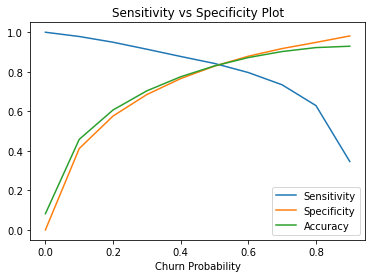

In [133]:
# Best Logistic Regression model based on above GridSearch CV
logreg2 = LogisticRegression(class_weight={0:0.082, 1:0.918}, random_state=42, penalty = 'none')
logreg2.fit(X_train_pca,y_train)

# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_lr_pred_prob = logreg2.predict_proba(X_train_pca)[:,1]
cutoff(y_train,y_train_lr_pred_prob)

#### Hence, a cut-off of 0.5 is appropriate for this model.

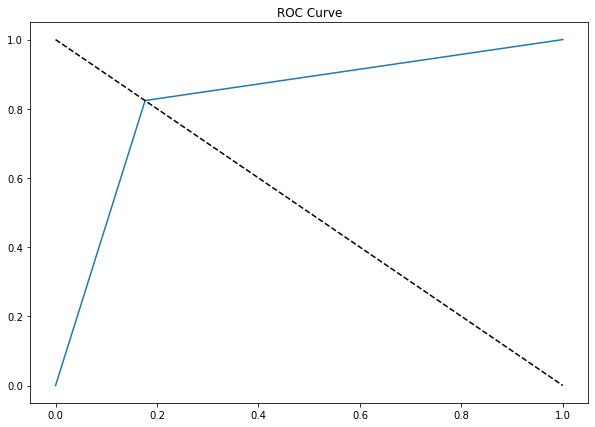

In [134]:
y_test_logreg_pred = pred_array(logreg2.predict_proba(X_test_pca)[:,1],0.5)
lr_eval = eval_metrics(y_test,y_test_logreg_pred, "PCA + Logistic Regression")

In [135]:
# Best Logistic regression model evaluation metrics
lr_eval

PCA + Logistic Regression
Sensitivity                   0.823848
Specificity                   0.823437
Accuracy                      0.823471
ROC_AUC                       0.823643
F1_score                      0.433357

## Random Forest Classifier

#### Random Forest Classifier (No PCA) - Base model

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42, oob_score=True)
rf1.fit(X_train,y_train)

print("OOB score: ", rf1.oob_score_)

y_test_rf1 = rf1.predict(X_test)
#y_test_rf1

OOB score:  0.9441827266238401


Random Forest
Sensitivity       0.443089
Specificity       0.984641
Accuracy          0.940269
ROC_AUC           0.713865
F1_score          0.548658

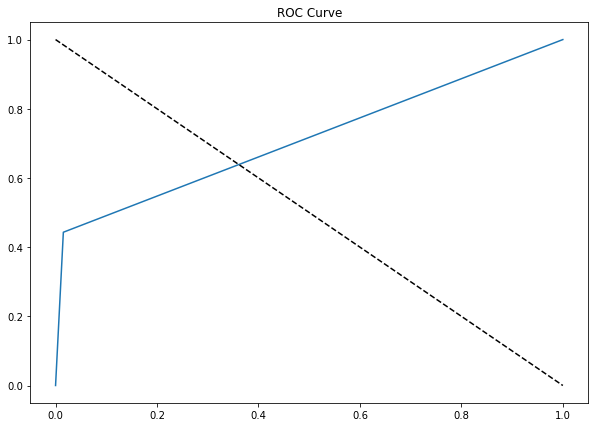

In [137]:
rf1_eval = eval_metrics(y_test, y_test_rf1,"Random Forest")
rf1_eval.head()

#### Random Forest Classifier after PCA - Base model

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42, oob_score=True)
rf2.fit(X_train_pca,y_train)

print("OOB score: ", rf2.oob_score_)

y_test_rf2 = rf2.predict(X_test_pca)
#y_test_rf

OOB score:  0.9250535331905781


Random Forest
Sensitivity       0.143631
Specificity       0.993470
Accuracy          0.923837
ROC_AUC           0.568551
F1_score          0.236080

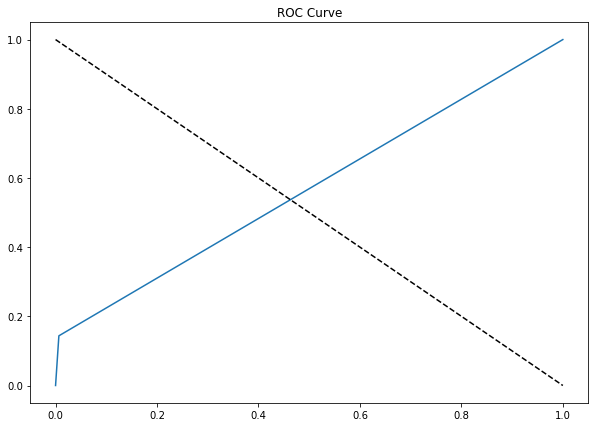

In [139]:
rf_eval = eval_metrics(y_test, y_test_rf2,"Random Forest")
rf_eval.head()

## (ii) Random Forest (Using actual features, No PCA)

In [140]:
# Grid Search CV for Random Forest parameters
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_rf1 = [{'max_depth':[10,20],
               'min_samples_leaf':[50,75,100],
               'n_estimators':[40,60,80]}]
rf1 = RandomForestClassifier(random_state=42)

rf1_cv = GridSearchCV(estimator = rf1, param_grid= params_rf1,
                     scoring = "recall", cv = folds,
                     verbose = 1, return_train_score=True)

rf1_cv.fit(X_train,y_train)

rf1_results = pd.DataFrame(rf1_cv.cv_results_)
print(rf1_cv.best_params_)
rf1_results

Fitting 4 folds for each of 18 candidates, totalling 72 fits
{'max_depth': 20, 'min_samples_leaf': 50, 'n_estimators': 80}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.604575      0.022901         0.027939        0.001379   
1        3.835537      0.087213         0.040503        0.003299   
2        4.956536      0.106270         0.049232        0.005266   
3        2.363203      0.038606         0.026785        0.001582   
4        3.526156      0.018093         0.036354        0.001353   
5        4.752409      0.111715         0.048418        0.001917   
6        2.314506      0.041154         0.026124        0.000538   
7        3.529836      0.024360         0.037306        0.001795   
8        4.804724      0.141104         0.049565        0.003160   
9        3.142191      0.084122         0.035003        0.008734   
10       4.539361      0.082431         0.042125        0.001447   
11       5.961731      0.073630         0.055035        0.002143   
12       2.766455      0.019023         0.030279        0.003146   
13       4.281805      0.110184         0.038719        0.000368   
14       5.662046      0.106037         0.050673        0.001633   
15       2.609880      0.043368         0.027631        0.000712   
16       3.942892      0.079597         0.046315        0.011224   
17       5.260922      0.112109         0.049038        0.001501   

   param_max_depth param_min_samples_leaf param_n_estimators  \
0               10                     50                 40   
1               10                     50                 60   
2               10                     50                 80   
3               10                     75                 40   
4               10                     75                 60   
5               10                     75                 80   
6               10                    100                 40   
7               10                    100                 60   
8               10                    100                 80   
9               20                     50                 40   
10              20                     50                 60   
11              20                     50                 80   
12              20                     75                 40   
13              20                     75                 60   
14              20                     75                 80   
15              20                    100                 40   
16              20                    100                 60   
17              20                    100                 80   

                                               params  split0_test_score  \
0   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.437209   
1   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.455814   
2   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.455814   
3   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.439535   
4   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.434884   
5   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.441860   
6   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.432558   
7   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.437209   
8   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.446512   
9   {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.432558   
10  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.451163   
11  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.451163   
12  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.441860   
13  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.446512   
14  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.444186   
15  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.434884   
16  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.439535   
17  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.444186   

    split1_test_score  split2_test_score  split3_

- The CV scores are relatively low. Let's see if changing the class weights helps with this.

In [141]:
# Performing second round of Grid Search CV for best class weight parameters to handle class imbalance
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
wt = [0.01,0.03,0.05,0.08,0.1]
params_rf2 = {'class_weight':[{0:w,1:1-w} for w in wt]}
rf2 = RandomForestClassifier(n_estimators=80, max_depth=20, min_samples_leaf=50, random_state=42)

rf2_cv = GridSearchCV(estimator = rf2, param_grid= params_rf2,
                     scoring = "recall", cv = folds,
                     verbose = 1, return_train_score=True)
rf2_cv.fit(X_train,y_train)

rf2_results = pd.DataFrame(rf2_cv.cv_results_)
print(rf2_cv.best_params_)
rf2_results

Fitting 4 folds for each of 5 candidates, totalling 20 fits
{'class_weight': {0: 0.01, 1: 0.99}}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.523943      0.062639         0.060943        0.007624   
1       4.636288      0.096446         0.054924        0.003480   
2       4.931530      0.092075         0.054760        0.002743   
3       5.014653      0.120930         0.051352        0.000597   
4       5.298059      0.081592         0.054413        0.001978   

   param_class_weight                                params  \
0  {0: 0.01, 1: 0.99}  {'class_weight': {0: 0.01, 1: 0.99}}   
1  {0: 0.03, 1: 0.97}  {'class_weight': {0: 0.03, 1: 0.97}}   
2  {0: 0.05, 1: 0.95}  {'class_weight': {0: 0.05, 1: 0.95}}   
3  {0: 0.08, 1: 0.92}  {'class_weight': {0: 0.08, 1: 0.92}}   
4    {0: 0.1, 1: 0.9}    {'class_weight': {0: 0.1, 1: 0.9}}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.888372           0.900232           0.860789           0.906977   
1           0.837209           0.874710           0.830626           0.869767   
2           0.804651           0.837587           0.793503           0.846512   
3           0.776744           0.798144           0.749420           0.804651   
4           0.748837           0.767981           0.728538           0.769767   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.889092        0.017646                1            0.998452   
1         0.853078        0.019380                2            0.968266   
2         0.820563        0.022071                3            0.922601   
3         0.782240        0.021579                4            0.872291   
4         0.753781        0.016725                5            0.839783   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            0.998451            0.998452   
1            0.972115            0.966692            0.964396   
2            0.927188            0.930287            0.921053   
3            0.863672            0.869094            0.865325   
4            0.838885            0.836561            0.831269   

   mean_train_score  std_train_score  
0          0.998839         0.000670  
1          0.967867         0.002812  
2          0.925282         0.003666  
3          0.867595         0.003348  
4          0.836625         0.003308

In [142]:
# Using best parameters from Grid Search CV above. Let's check the OOB score
rf_no_pca_best = RandomForestClassifier(n_estimators=80, max_depth=20, min_samples_leaf=50, random_state=42,
                                        class_weight={0:0.01,1:0.99},oob_score=True)
rf_no_pca_best.fit(X_train,y_train)
print("OOB score: ", rf_no_pca_best.oob_score_)

OOB score:  0.8178443968593861


- The OOB score is a bit low. Let's instead try with the next best class weight from the Grid Search CV

In [143]:
rf_no_pca_best2 = RandomForestClassifier(n_estimators=80, max_depth=20, min_samples_leaf=50, random_state=42,
                                        class_weight={0:0.03,1:0.97},oob_score=True)
rf_no_pca_best2.fit(X_train,y_train)
print("OOB score: ", rf_no_pca_best2.oob_score_)

OOB score:  0.8600523435641209


- That is a more acceptable OOB score. Let's proceed with these parameters.

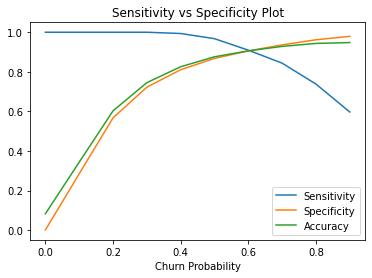

In [144]:
# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_rf_pred_prob = rf_no_pca_best2.predict_proba(X_train)[:,1]
cutoff(y_train,y_train_rf_pred_prob)

- The plot above suggests a cut-off of 0.6. However, we are more interested in keeping the sensitivity high and hence, we can sacrifice a little bit of specificity to get a better sensitivity.
- Hence, we shall use a cutoff of 0.5

Random Forest
Sensitivity       0.871274
Specificity       0.861531
Accuracy          0.862329
ROC_AUC           0.866402
F1_score          0.509105

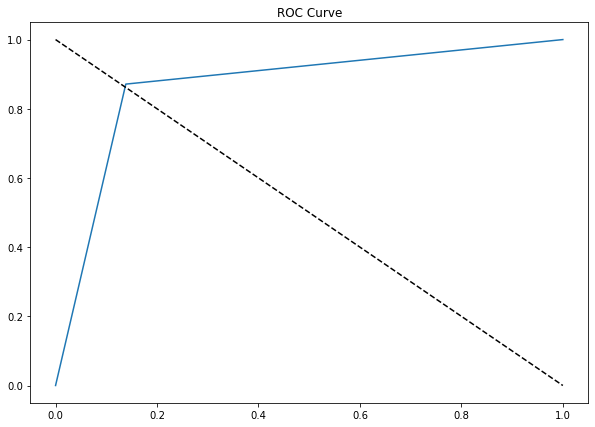

In [150]:
# Predicting churn with best model and cut-off = 0.5
y_test_rf_no_pca = pred_array(rf_no_pca_best2.predict_proba(X_test)[:,1], 0.5)

# Obtaining other evaluation metrics
rf_eval_no_pca = eval_metrics(y_test, y_test_rf_no_pca,"Random Forest")
rf_eval_no_pca.head()

## (iii) Random Forest after PCA

In [151]:
# Grid Search CV for Random Forest parameters
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_rf3 = [{'max_depth':[10,20],
               'min_samples_leaf':[50,75,100],
               'n_estimators':[50,75,100]}]
rf3_pca = RandomForestClassifier(random_state=42)

rf3_pca_cv = GridSearchCV(estimator = rf3_pca, param_grid= params_rf3,
                          scoring = "recall", cv = folds,
                          verbose = 1, return_train_score=True)

rf3_pca_cv.fit(X_train_pca,y_train)

rf3_pca_results = pd.DataFrame(rf3_pca_cv.cv_results_)
print(rf3_pca_cv.best_params_)
rf3_pca_results

Fitting 4 folds for each of 18 candidates, totalling 72 fits
{'max_depth': 20, 'min_samples_leaf': 50, 'n_estimators': 75}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.303573      0.071033         0.034652        0.002396   
1        6.388885      0.041341         0.048268        0.003162   
2        8.583564      0.162946         0.060056        0.002950   
3        4.123309      0.085162         0.032745        0.002712   
4        6.174968      0.035985         0.044813        0.002177   
5        8.164818      0.063478         0.060763        0.005478   
6        3.876379      0.043487         0.030898        0.000878   
7        5.923050      0.110779         0.041919        0.000387   
8        7.896408      0.068819         0.054516        0.000669   
9        4.984723      0.142047         0.037614        0.002088   
10       7.270155      0.185871         0.051627        0.002227   
11       9.615562      0.095999         0.065679        0.000918   
12       4.513752      0.096086         0.033080        0.000537   
13       6.658836      0.093531         0.048647        0.001614   
14       8.963102      0.191389         0.074851        0.015128   
15       4.129746      0.042563         0.031431        0.000214   
16       6.200957      0.037683         0.045738        0.002481   
17       8.300674      0.099421         0.059118        0.002066   

   param_max_depth param_min_samples_leaf param_n_estimators  \
0               10                     50                 50   
1               10                     50                 75   
2               10                     50                100   
3               10                     75                 50   
4               10                     75                 75   
5               10                     75                100   
6               10                    100                 50   
7               10                    100                 75   
8               10                    100                100   
9               20                     50                 50   
10              20                     50                 75   
11              20                     50                100   
12              20                     75                 50   
13              20                     75                 75   
14              20                     75                100   
15              20                    100                 50   
16              20                    100                 75   
17              20                    100                100   

                                               params  split0_test_score  \
0   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.013953   
1   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.009302   
2   {'max_depth': 10, 'min_samples_leaf': 50, 'n_e...           0.013953   
3   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.000000   
4   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.002326   
5   {'max_depth': 10, 'min_samples_leaf': 75, 'n_e...           0.000000   
6   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.000000   
7   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.000000   
8   {'max_depth': 10, 'min_samples_leaf': 100, 'n_...           0.000000   
9   {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.016279   
10  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.023256   
11  {'max_depth': 20, 'min_samples_leaf': 50, 'n_e...           0.013953   
12  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.000000   
13  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.000000   
14  {'max_depth': 20, 'min_samples_leaf': 75, 'n_e...           0.000000   
15  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.000000   
16  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.000000   
17  {'max_depth': 20, 'min_samples_leaf': 100, 'n_...           0.000000   

    split1_test_score  split2_test_score  split3_

- The CV scores are very low. Let's see if changing the class weights helps with this.

In [152]:
# Checking if updating the class weights improves the CV test scores
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
wt = [0.01,0.03,0.05,0.08,0.1]
params_rf4 = {'class_weight':[{0:w,1:1-w} for w in wt]}
rf4_pca = RandomForestClassifier(n_estimators=75, max_depth=20, min_samples_leaf=50, random_state=42)

rf4_pca_cv = GridSearchCV(estimator = rf4_pca, param_grid= params_rf4,
                          scoring = "recall", cv = folds,
                          verbose = 1, return_train_score=True)

rf4_pca_cv.fit(X_train_pca,y_train)

rf4_pca_results = pd.DataFrame(rf4_pca_cv.cv_results_)
print(rf4_pca_cv.best_params_)
rf4_pca_results

Fitting 4 folds for each of 5 candidates, totalling 20 fits
{'class_weight': {0: 0.01, 1: 0.99}}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.602130      0.104940         0.055945        0.005229   
1       6.688982      0.126535         0.054722        0.004693   
2       6.541883      0.110817         0.055238        0.007492   
3       6.354841      0.076554         0.049325        0.000458   
4       6.445667      0.057304         0.050420        0.000478   

   param_class_weight                                params  \
0  {0: 0.01, 1: 0.99}  {'class_weight': {0: 0.01, 1: 0.99}}   
1  {0: 0.03, 1: 0.97}  {'class_weight': {0: 0.03, 1: 0.97}}   
2  {0: 0.05, 1: 0.95}  {'class_weight': {0: 0.05, 1: 0.95}}   
3  {0: 0.08, 1: 0.92}  {'class_weight': {0: 0.08, 1: 0.92}}   
4    {0: 0.1, 1: 0.9}    {'class_weight': {0: 0.1, 1: 0.9}}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.865116           0.849188           0.835267           0.900000   
1           0.795349           0.777262           0.774942           0.816279   
2           0.744186           0.733179           0.709977           0.772093   
3           0.662791           0.679814           0.640371           0.700000   
4           0.609302           0.626450           0.580046           0.653488   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.862393        0.024145                1            1.000000   
1         0.790958        0.016617                2            0.991486   
2         0.739859        0.022335                3            0.940402   
3         0.670744        0.021931                4            0.845201   
4         0.617322        0.026670                5            0.789474   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            0.999225            1.000000   
1            0.990705            0.989930            0.990712   
2            0.942680            0.951975            0.941176   
3            0.841208            0.845081            0.850619   
4            0.790085            0.793958            0.780960   

   mean_train_score  std_train_score  
0          0.999806         0.000335  
1          0.990708         0.000550  
2          0.944059         0.004643  
3          0.845528         0.003350  
4          0.788619         0.004745

In [153]:
# Using best parameters from Grid Search CV above. Let's check the OOB score
rf_pca_best = RandomForestClassifier(n_estimators=75, max_depth=20, min_samples_leaf=50, random_state=42,
                                     class_weight={0:0.01,1:0.99},oob_score=True)
rf_pca_best.fit(X_train_pca,y_train)
print("OOB score: ", rf_pca_best.oob_score_)

OOB score:  0.7266238401142041


- The OOB score is bit low. Let's check the OOB score with the next best class weights.

In [160]:
rf_pca_best2 = RandomForestClassifier(n_estimators=75, random_state=42, max_depth=20, min_samples_leaf=50, 
                                     class_weight={0:0.03,1:0.97},oob_score=True)
rf_pca_best2.fit(X_train_pca,y_train)
print("OOB score: ", rf_pca_best2.oob_score_)

OOB score:  0.8289317154413515


- That's a better OOB score. Let's predict the churn on the test set.

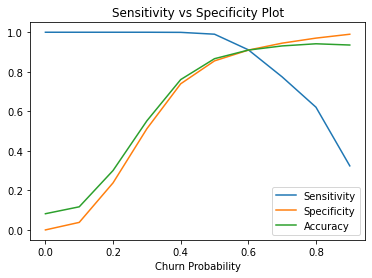

In [161]:
# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_rf_pca_pred_prob = rf_pca_best2.predict_proba(X_train_pca)[:,1]
cutoff(y_train,y_train_rf_pca_pred_prob)

- The plot above suggests a cut-off of 0.6. However, we are more interested in keeping the sensitivity high and hence, we can sacrifice a little bit of specificity to get a better sensitivity.
- Hence, we shall use a cutoff of 0.5

PCA + Random Forest
Sensitivity             0.804878
Specificity             0.842061
Accuracy                0.839014
ROC_AUC                 0.823469
F1_score                0.450341

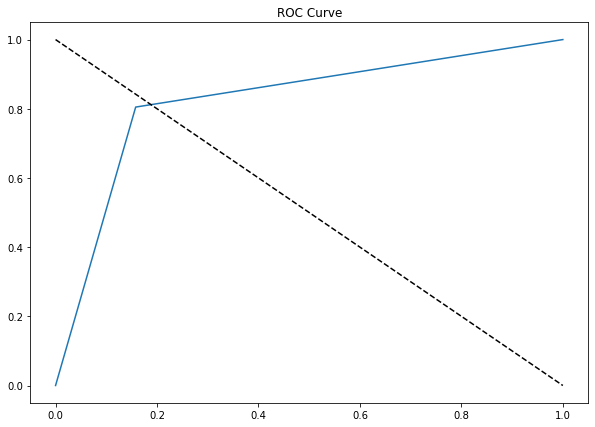

In [162]:
# Predicting churn with best model and cut-off = 0.5
y_test_rf_pca = pred_array(rf_pca_best2.predict_proba(X_test_pca)[:,1], 0.5)

# Obtaining other evaluation metrics
rf_eval_pca = eval_metrics(y_test, y_test_rf_pca,"PCA + Random Forest")
rf_eval_pca.head()

## (iv) AdaBoost (No PCA)

In [163]:
from sklearn.ensemble import AdaBoostClassifier

In [164]:
# Adaboost Base model (No PCA)
adaboost = AdaBoostClassifier(random_state = 42)
adaboost.fit(X_train,y_train)
y_test_boost = adaboost.predict(X_test)
print("Accuracy Score:\t", accuracy_score(y_test,y_test_boost),
      "\nRecall Score:\t", recall_score(y_test,y_test_boost),
      "\nF1-score:\t", f1_score(y_test,y_test_boost),
      "\nConfusion matrix:\n", confusion_matrix(y_test,y_test_boost))

Accuracy Score:	 0.9377151104696347 
Recall Score:	 0.483739837398374 
F1-score:	 0.5599999999999999 
Confusion matrix:
 [[8089  180]
 [ 381  357]]


#### AdaBoost: Grid Search CV for optimal parameters

In [165]:
# Grid Search CV for Adaboost
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_ada1 = {'n_estimators':[50,75,100],
               'learning_rate': [0.1,0.3,1.0,3.0,10.0],}
adaboost1 = AdaBoostClassifier(random_state=42)

adaboost1_cv = GridSearchCV(estimator = adaboost1, param_grid = params_ada1,
                            scoring = "recall", cv = folds,
                            verbose = 1, return_train_score=True)

adaboost1_cv.fit(X_train,y_train)

adaboost1_results = pd.DataFrame(adaboost1_cv.cv_results_)
print(adaboost1_cv.best_params_)
adaboost1_results

Fitting 4 folds for each of 15 candidates, totalling 60 fits
{'learning_rate': 3.0, 'n_estimators': 75}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        9.025733      0.080847         0.136812        0.006413   
1       13.434374      0.105690         0.202321        0.007079   
2       17.743757      0.440298         0.253662        0.009304   
3        8.683011      0.010380         0.128045        0.002220   
4       13.012029      0.007549         0.188415        0.002169   
5       17.323037      0.006431         0.249181        0.002941   
6        8.687950      0.007159         0.127402        0.001495   
7       12.999047      0.011325         0.186048        0.001441   
8       17.377766      0.027177         0.248692        0.002467   
9        8.677574      0.011909         0.127671        0.001889   
10      13.010786      0.013995         0.186147        0.002230   
11      17.346470      0.015942         0.248737        0.004276   
12       1.068964      0.001158         0.124964        0.000568   
13       1.430443      0.000900         0.192325        0.003075   
14       1.813745      0.008165         0.246658        0.001608   

   param_learning_rate param_n_estimators  \
0                  0.1                 50   
1                  0.1                 75   
2                  0.1                100   
3                  0.3                 50   
4                  0.3                 75   
5                  0.3                100   
6                  1.0                 50   
7                  1.0                 75   
8                  1.0                100   
9                  3.0                 50   
10                 3.0                 75   
11                 3.0                100   
12                10.0                 50   
13                10.0                 75   
14                10.0                100   

                                          params  split0_test_score  \
0     {'learning_rate': 0.1, 'n_estimators': 50}           0.446512   
1     {'learning_rate': 0.1, 'n_estimators': 75}           0.467442   
2    {'learning_rate': 0.1, 'n_estimators': 100}           0.481395   
3     {'learning_rate': 0.3, 'n_estimators': 50}           0.504651   
4     {'learning_rate': 0.3, 'n_estimators': 75}           0.518605   
5    {'learning_rate': 0.3, 'n_estimators': 100}           0.520930   
6     {'learning_rate': 1.0, 'n_estimators': 50}           0.506977   
7     {'learning_rate': 1.0, 'n_estimators': 75}           0.532558   
8    {'learning_rate': 1.0, 'n_estimators': 100}           0.530233   
9     {'learning_rate': 3.0, 'n_estimators': 50}           0.460465   
10    {'learning_rate': 3.0, 'n_estimators': 75}           0.539535   
11   {'learning_rate': 3.0, 'n_estimators': 100}           0.460465   
12   {'learning_rate': 10.0, 'n_estimators': 50}           0.460465   
13   {'learning_rate': 10.0, 'n_estimators': 75}           0.000000   
14  {'learning_rate': 10.0, 'n_estimators': 100}           0.460465   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.461717           0.412993           0.448837         0.442515   
1            0.494200           0.440835           0.467442         0.467480   
2            0.501160           0.452436           0.486047         0.480260   
3            0.517401           0.466357           0.506977         0.498847   
4            0.519722           0.468677           0.518605         0.506402   
5            0.526682           0.475638           0.537209         0.515115   
6            0.524362           0.489559           0.560465         0.520341   
7            0.524362           0.505800           0.546512         0.527308   
8            0.522042           0.477958           0.555814         0.521512   
9            0.445476           0.482599           0.439535         0.457019   
10           0.554524           0.517401           0.560465         0.542981   
11           0.445476           0.482599           0.439535         0.457019   
12           0.44

In [166]:
# Running Adaboost with the best parameters from GridSearch CV
adaboost_best = AdaBoostClassifier(n_estimators=75, learning_rate=3.0, random_state=42)
adaboost_best.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=3.0, n_estimators=75, random_state=42)

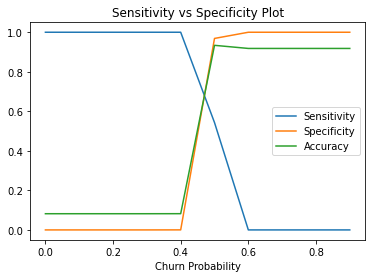

In [167]:
# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_adab_prob = adaboost_best.predict_proba(X_train)[:,1]
cutoff(y_train,y_train_adab_prob)

- That is not a very promising plot.
- Let's see the results against test set anyway

Adaboost
Sensitivity  0.512195
Specificity  0.966864
Accuracy     0.929610
ROC_AUC      0.739530
F1_score     0.543885

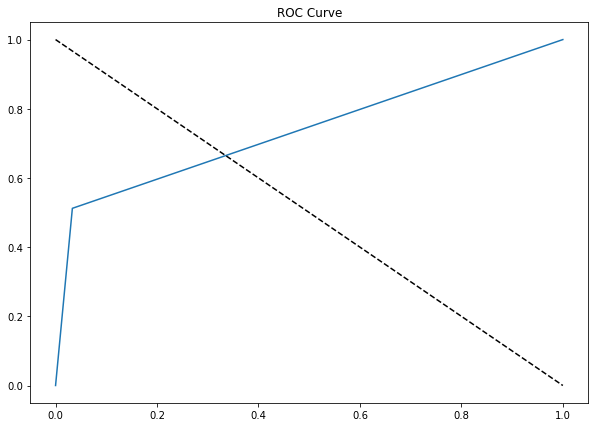

In [168]:
# Predicting churn with best model and cut-off = 0.5
y_test_adaboost = pred_array(adaboost_best.predict_proba(X_test)[:,1], 0.5)

# Obtaining other evaluation metrics
adab_eval = eval_metrics(y_test, y_test_adaboost,"Adaboost")
adab_eval.head()

- As expected, the model is not great, perhaps due to the imbalance in the data.

## (v) SMOTE oversampling + Adaboost

- We saw that Adaboost on its own did not perform very well.
- Let's try to address the class imbalance using SMOTE and see how Adaboost performs.

In [169]:
# Addressing class imbalance using SMOTE on original data (no PCA)
import imblearn

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resamp, y_resamp = smote.fit_resample(X_train,y_train)
y_resamp.value_counts()

0    19293
1    19293
Name: churned, dtype: int64

In [170]:
# Grid Search CV for Adaboost after SMOTE
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_ada_sm = {'n_estimators':[50,75,100],
                 'learning_rate': [0.3,1.0,3.0,10.0],}
adaboost_smote = AdaBoostClassifier(random_state=42)

adaboost_smote_cv = GridSearchCV(estimator = adaboost_smote, param_grid = params_ada_sm,
                                 scoring = "recall", cv = folds,
                                 verbose = 1, return_train_score=True)

adaboost_smote_cv.fit(X_resamp,y_resamp)

adaboost_smote_results = pd.DataFrame(adaboost_smote_cv.cv_results_)
print(adaboost_smote_cv.best_params_)
adaboost_smote_results

Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'learning_rate': 1.0, 'n_estimators': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       19.557902      0.241393         0.230644        0.005240   
1       29.134276      0.270441         0.352611        0.029192   
2       38.267513      0.294060         0.464692        0.031694   
3       19.053828      0.589754         0.230555        0.006829   
4       27.580178      0.030523         0.331709        0.001929   
5       36.844673      0.022120         0.445206        0.003423   
6       18.412769      0.011251         0.225452        0.001493   
7       27.632878      0.036534         0.337561        0.002442   
8       36.845305      0.045716         0.446123        0.004802   
9        2.517779      0.888579         0.224138        0.004393   
10       3.164655      0.888859         0.329821        0.003132   
11       3.809029      0.883654         0.437563        0.001094   

   param_learning_rate param_n_estimators  \
0                  0.3                 50   
1                  0.3                 75   
2                  0.3                100   
3                  1.0                 50   
4                  1.0                 75   
5                  1.0                100   
6                  3.0                 50   
7                  3.0                 75   
8                  3.0                100   
9                 10.0                 50   
10                10.0                 75   
11                10.0                100   

                                          params  split0_test_score  \
0     {'learning_rate': 0.3, 'n_estimators': 50}           0.868132   
1     {'learning_rate': 0.3, 'n_estimators': 75}           0.882646   
2    {'learning_rate': 0.3, 'n_estimators': 100}           0.890317   
3     {'learning_rate': 1.0, 'n_estimators': 50}           0.901306   
4     {'learning_rate': 1.0, 'n_estimators': 75}           0.919345   
5    {'learning_rate': 1.0, 'n_estimators': 100}           0.926809   
6     {'learning_rate': 3.0, 'n_estimators': 50}           0.301887   
7     {'learning_rate': 3.0, 'n_estimators': 75}           0.698735   
8    {'learning_rate': 3.0, 'n_estimators': 100}           0.301887   
9    {'learning_rate': 10.0, 'n_estimators': 50}           0.301265   
10   {'learning_rate': 10.0, 'n_estimators': 75}           0.000622   
11  {'learning_rate': 10.0, 'n_estimators': 100}           0.301265   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.884743           0.880365           0.877462         0.877675   
1            0.898632           0.893635           0.888451         0.890841   
2            0.904436           0.902136           0.899233         0.899030   
3            0.911070           0.913539           0.912710         0.909656   
4            0.925373           0.928053           0.920589         0.923340   
5            0.934494           0.935310           0.932615         0.932307   
6            0.313433           0.319718           0.312461         0.311875   
7            0.687189           0.680697           0.688161         0.688695   
8            0.313433           0.319718           0.312461         0.311875   
9            0.312604           0.319096           0.311010         0.310994   
10           1.000000           1.000000           1.000000         0.750156   
11           0.312604           0.319096           0.311010         0.310994   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.006089                6            0.878645            0.877670   
1         0.005945                5            0.892260            0.892322   
2         0.005358                4            0.902004            0.900477   
3         0.004902                3            0.913545            0.914161   
4         0.003531                2            0.927713            0.927915   
5         0.003321                1            0.933725            0.936416   
6         0.006

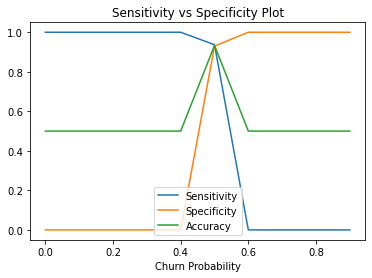

In [171]:
# Fitting AdaBoost with best parameters from Grid Search CV above
adaboost_best2 = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
adaboost_best2.fit(X_resamp,y_resamp)

# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_adab_prob2 = adaboost_best2.predict_proba(X_resamp)[:,1]
cutoff(y_resamp,y_train_adab_prob2)

- That is a weird looking plot. Does not look very promising again.

Confusion Matrix:
 [[7632  637]
 [ 245  493]]


SMOTE + Adaboost
Sensitivity          0.668022
Specificity          0.922965
Accuracy             0.902076
ROC_AUC              0.795493
F1_score             0.527837

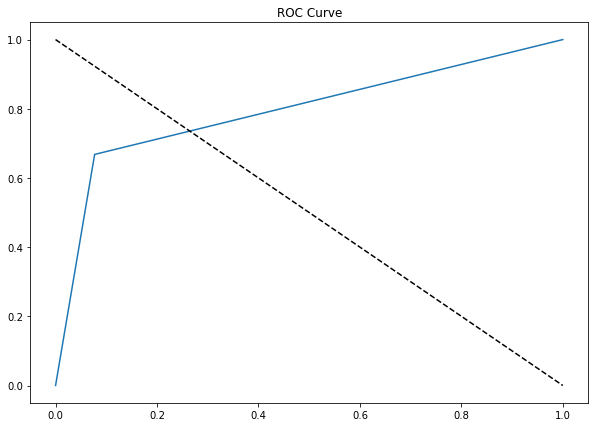

In [172]:
# Predicting churn with best model and cut-off = 0.5
y_test_adaboost2 = pred_array(adaboost_best2.predict_proba(X_test)[:,1], 0.5)

# Obtaining other evaluation metrics
adab_eval_smote = eval_metrics(y_test, y_test_adaboost2,"SMOTE + Adaboost")
adab_eval_smote.head()

- While the results are better than the earlier AdaBoost (without oversampling), it is still not comparable to Random Forests best results.

## Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
# Gradient boost Base model (No PCA)
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train,y_train)
y_test_gb = gb.predict(X_test)
print("Accuracy Score:\t", accuracy_score(y_test,y_test_gb),
      "\nRecall Score:\t", recall_score(y_test,y_test_gb),
      "\nF1-score:\t", f1_score(y_test,y_test_gb),
      "\nConfusion matrix:\n", confusion_matrix(y_test,y_test_gb))

Accuracy Score:	 0.9394915066059731 
Recall Score:	 0.508130081300813 
F1-score:	 0.5791505791505792 
Confusion matrix:
 [[8087  182]
 [ 363  375]]


In [180]:
# Gradient boost Base model (With PCA)
gb1 = GradientBoostingClassifier(random_state = 42)
gb1.fit(X_train_pca,y_train)
y_test_gb1 = gb1.predict(X_test_pca)
print("Accuracy Score:\t", accuracy_score(y_test,y_test_gb1),
      "\nRecall Score:\t", recall_score(y_test,y_test_gb1),
      "\nF1-score:\t", f1_score(y_test,y_test_gb1),
      "\nConfusion matrix:\n", confusion_matrix(y_test,y_test_gb1))

Accuracy Score:	 0.9309426001998445 
Recall Score:	 0.35365853658536583 
F1-score:	 0.45629370629370625 
Confusion matrix:
 [[8124  145]
 [ 477  261]]


## (vi) Gradient Boosting GridSearch CV (No PCA)

In [181]:
# Grid Search CV for Gradient Boosting
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_gb = {'n_estimators':[50,75,100],
             'learning_rate': [0.1,0.5,1.0],
             'max_depth':[5,10],
             'min_samples_leaf':[50,100]}
gboost = GradientBoostingClassifier(random_state=42, max_features=15)

gboost_cv = GridSearchCV(estimator = gboost, param_grid = params_gb,
                           scoring = "recall", cv = folds,
                           verbose = 1, return_train_score=True)

gboost_cv.fit(X_train,y_train)

gboost_results = pd.DataFrame(gboost_cv.cv_results_)
print(gboost_cv.best_params_)
gboost_results

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 75}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.915147      0.088608         0.017365        0.000200   
1        4.224836      0.074693         0.020516        0.000117   
2        5.720587      0.076403         0.023926        0.000215   
3        2.851449      0.045730         0.018102        0.000729   
4        4.347811      0.135029         0.021599        0.001617   
5        5.696431      0.109329         0.027837        0.005806   
6        5.338048      0.043391         0.024381        0.000855   
7        7.851079      0.105774         0.034944        0.007826   
8       10.405271      0.021465         0.037360        0.000462   
9        4.882366      0.039366         0.023005        0.000342   
10       7.531441      0.094877         0.030484        0.001387   
11       9.935109      0.057847         0.035483        0.000172   
12       2.783666      0.004548         0.016226        0.000152   
13       4.160228      0.006041         0.019548        0.000264   
14       5.577876      0.004944         0.023067        0.000363   
15       2.737949      0.013903         0.015977        0.000117   
16       4.106845      0.023723         0.019333        0.000081   
17       5.517258      0.053595         0.022956        0.000167   
18       5.199728      0.033456         0.022848        0.000145   
19       7.803729      0.035920         0.029229        0.000273   
20      10.441981      0.046783         0.035928        0.000307   
21       4.980033      0.038811         0.021909        0.000340   
22       7.515138      0.072518         0.027937        0.000298   
23      10.056665      0.029465         0.033921        0.000363   
24       2.773305      0.016296         0.015643        0.000078   
25       4.154757      0.019035         0.019056        0.000330   
26       5.570220      0.028460         0.022677        0.000789   
27       2.747200      0.021531         0.015402        0.000158   
28       4.100461      0.026736         0.018874        0.000168   
29       5.520687      0.021283         0.023493        0.002548   
30       5.197292      0.020380         0.022702        0.000262   
31       7.787453      0.015715         0.029383        0.000263   
32      10.447139      0.024622         0.035793        0.000400   
33       4.985354      0.023416         0.021511        0.000237   
34       7.500429      0.023503         0.027341        0.000418   
35      10.072426      0.015331         0.033278        0.000552   

   param_learning_rate param_max_depth param_min_samples_leaf  \
0                  0.1               5                     50   
1                  0.1               5                     50   
2                  0.1               5                     50   
3                  0.1               5                    100   
4                  0.1               5                    100   
5                  0.1               5                    100   
6                  0.1              10                     50   
7                  0.1              10                     50   
8                  0.1              10                     50   
9                  0.1              10                    100   
10                 0.1              10                    100   
11                 0.1              10                    100   
12                 0.5               5                     50   
13                 0.5               5                     50   
14                 0.5               5                     50   
15                 0.5               5                    100   
16                 0.5               5                    100   
17                 0.5               5                    100   
18                 0.5              10                     50   
19                 0.5              10                     50   
20                 0.5              10                     50   
21                 0.5              10                   

In [194]:
# Second round of Grid Search CV for Gradient Boosting to check "min_samples_leaf"
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_gb2 = {'min_samples_leaf':[100,200,300,400]}
gboost2 = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, 
                                     max_depth=5, random_state=13, max_features=15, )

gboost2_cv = GridSearchCV(estimator = gboost2, param_grid = params_gb2,
                          scoring = "recall", cv = folds,
                          verbose = 1, return_train_score=True)

gboost2_cv.fit(X_train,y_train)

gboost2_results = pd.DataFrame(gboost2_cv.cv_results_)
print(gboost2_cv.best_params_)
gboost2_results

Fitting 4 folds for each of 4 candidates, totalling 16 fits
{'min_samples_leaf': 200}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.251577      0.060996         0.020484        0.000144   
1       4.109097      0.002533         0.020493        0.000211   
2       4.017124      0.010985         0.020533        0.000374   
3       3.934693      0.017842         0.020759        0.000315   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.506977   
1                    200  {'min_samples_leaf': 200}           0.523256   
2                    300  {'min_samples_leaf': 300}           0.513953   
3                    400  {'min_samples_leaf': 400}           0.518605   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.561485           0.512761           0.565116         0.536585   
1           0.563805           0.526682           0.555814         0.542389   
2           0.561485           0.512761           0.565116         0.538329   
3           0.566125           0.491879           0.546512         0.530780   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.026825                3            0.632353            0.635941   
1        0.017689                1            0.609133            0.607281   
2        0.025008                2            0.583591            0.598761   
3        0.028099                4            0.575077            0.587142   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.634392            0.629257          0.632986         0.002501  
1            0.616576            0.601393          0.608596         0.005422  
2            0.606507            0.585913          0.593693         0.009387  
3            0.591015            0.565789          0.579756         0.009978

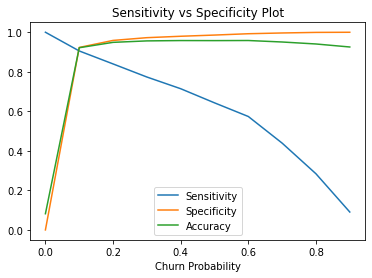

In [195]:
# Fitting Gradient Boost with best parameters from Grid Search CV above
gboost_best = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, 
                                         max_depth=5, min_samples_leaf=200, random_state=42)
gboost_best.fit(X_train,y_train)

# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_gb_prob = gboost_best.predict_proba(X_train)[:,1]
cutoff(y_train,y_train_gb_prob)

Confusion Matrix:
 [[7535  734]
 [ 130  608]]


Gradient Boost
Sensitivity        0.823848
Specificity        0.911235
Accuracy           0.904075
ROC_AUC            0.867541
F1_score           0.584615

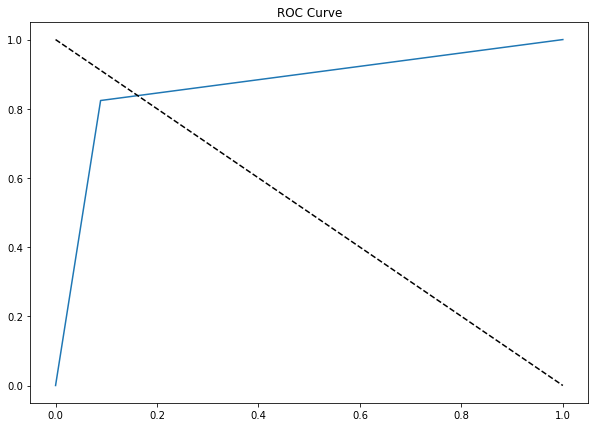

In [197]:
# Predicting churn with best model and cut-off = 0.1
y_test_gboost = pred_array(gboost_best.predict_proba(X_test)[:,1], 0.1)

# Obtaining other evaluation metrics
gb_eval = eval_metrics(y_test, y_test_gboost,"Gradient Boost")
gb_eval.head()

## (vii) Gradient Boosting GridSearch CV (With PCA)

In [198]:
# Grid Search CV for Gradient Boosting
folds = StratifiedKFold(n_splits=4, shuffle = True, random_state=42)
params_gb = {'n_estimators':[75,100,150],
             'learning_rate': [0.1,1.0, 2.0],
             'max_depth':[5,10],
             'min_samples_leaf':[100,200]}
gboost_pca = GradientBoostingClassifier(random_state=42, max_features=15)

gboost_pca_cv = GridSearchCV(estimator = gboost_pca, param_grid = params_gb,
                           scoring = "recall", cv = folds,
                           verbose = 1, return_train_score=True)

gboost_pca_cv.fit(X_train_pca,y_train)

gboost_results_pca = pd.DataFrame(gboost_pca_cv.cv_results_)
print(gboost_pca_cv.best_params_)
gboost_results_pca

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'learning_rate': 1.0, 'max_depth': 10, 'min_samples_leaf': 200, 'n_estimators': 75}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        8.713291      0.261278         0.016492        0.000414   
1       11.251256      0.032650         0.019279        0.000094   
2       16.901692      0.042420         0.025468        0.000252   
3        8.260948      0.012854         0.016323        0.000174   
4       11.000500      0.015473         0.019334        0.000126   
5       16.555116      0.018836         0.025508        0.000331   
6       14.369298      0.051834         0.025802        0.000241   
7       19.139569      0.062205         0.032299        0.000297   
8       28.677658      0.207465         0.045238        0.000361   
9       13.256021      0.052789         0.024087        0.000108   
10      17.684579      0.075141         0.030156        0.000854   
11      26.639387      0.155053         0.041055        0.000075   
12       8.443765      0.004636         0.016321        0.000120   
13      11.256214      0.006449         0.019921        0.000307   
14      16.869354      0.023853         0.026289        0.000196   
15       8.265717      0.023255         0.016237        0.000297   
16      11.075647      0.095158         0.019559        0.000318   
17      16.514798      0.040425         0.026116        0.000341   
18      14.425682      0.042296         0.025787        0.000133   
19      19.221446      0.040629         0.032085        0.000182   
20      28.858181      0.062262         0.044713        0.000140   
21      13.343834      0.093780         0.023849        0.000159   
22      17.718820      0.111516         0.029575        0.000196   
23      26.589416      0.085545         0.041009        0.000120   
24       8.399980      0.023768         0.016808        0.000523   
25      11.185485      0.040477         0.020264        0.000713   
26      16.757355      0.065731         0.027164        0.001115   
27       8.195411      0.023337         0.016790        0.000256   
28      10.919708      0.032940         0.020188        0.000363   
29      16.367152      0.057110         0.027060        0.000623   
30      13.750266      0.227735         0.026661        0.000943   
31      18.278437      0.284297         0.033291        0.001263   
32      27.344717      0.428440         0.046639        0.001958   
33      12.078922      0.382660         0.025033        0.000355   
34      16.052624      0.567110         0.030953        0.000252   
35      24.025848      0.823550         0.043152        0.000505   

   param_learning_rate param_max_depth param_min_samples_leaf  \
0                  0.1               5                    100   
1                  0.1               5                    100   
2                  0.1               5                    100   
3                  0.1               5                    200   
4                  0.1               5                    200   
5                  0.1               5                    200   
6                  0.1              10                    100   
7                  0.1              10                    100   
8                  0.1              10                    100   
9                  0.1              10                    200   
10                 0.1              10                    200   
11                 0.1              10                    200   
12                 1.0               5                    100   
13                 1.0               5                    100   
14                 1.0               5                    100   
15                 1.0               5                    200   
16                 1.0               5                    200   
17                 1.0               5                    200   
18                 1.0              10                    100   
19                 1.0              10                    100   
20                 1.0              10                    100   
21                 1.0              10                   

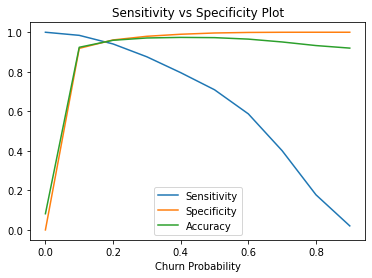

In [201]:
# Fitting Gradient Boost with best parameters from Grid Search CV above
gboost_best_pca = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, 
                                             max_depth=10, min_samples_leaf=200, random_state=42)
gboost_best_pca.fit(X_train_pca,y_train)

# Checking Sensitivity vs Specificity plot for optimal cut-off probability
y_train_gb_pca_prob = gboost_best_pca.predict_proba(X_train_pca)[:,1]
cutoff(y_train,y_train_gb_pca_prob)

Confusion Matrix:
 [[7420  849]
 [ 182  556]]


PCA + Gradient Boost
Sensitivity              0.753388
Specificity              0.897327
Accuracy                 0.885533
ROC_AUC                  0.825357
F1_score                 0.518899

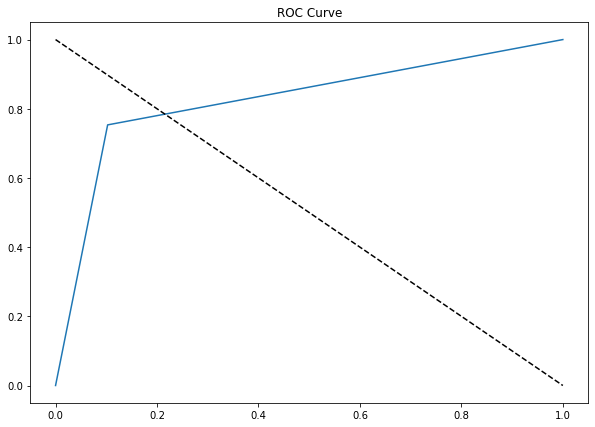

In [202]:
# Predicting churn with best model and cut-off = 0.1
y_test_gboost_pca = pred_array(gboost_best_pca.predict_proba(X_test_pca)[:,1], 0.1)

# Obtaining other evaluation metrics
gb_eval_pca = eval_metrics(y_test, y_test_gboost_pca,"PCA + Gradient Boost")
gb_eval_pca.head()

## Combining evaluation metrics from all models to check our best model

In [203]:
# Creating a dataframe with the evaluation metrics from all the models we created.
model_evals = pd.concat([lr_eval,rf_eval_no_pca,rf_eval_pca,adab_eval,adab_eval_smote, gb_eval, gb_eval_pca], axis =1)
model_evals

PCA + Logistic Regression  Random Forest  PCA + Random Forest  \
Sensitivity                   0.823848       0.871274             0.804878   
Specificity                   0.823437       0.861531             0.842061   
Accuracy                      0.823471       0.862329             0.839014   
ROC_AUC                       0.823643       0.866402             0.823469   
F1_score                      0.433357       0.509105             0.450341   

             Adaboost  SMOTE + Adaboost  Gradient Boost  PCA + Gradient Boost  
Sensitivity  0.512195          0.668022        0.823848              0.753388  
Specificity  0.966864          0.922965        0.911235              0.897327  
Accuracy     0.929610          0.902076        0.904075              0.885533  
ROC_AUC      0.739530          0.795493        0.867541              0.825357  
F1_score     0.543885          0.527837        0.584615              0.518899

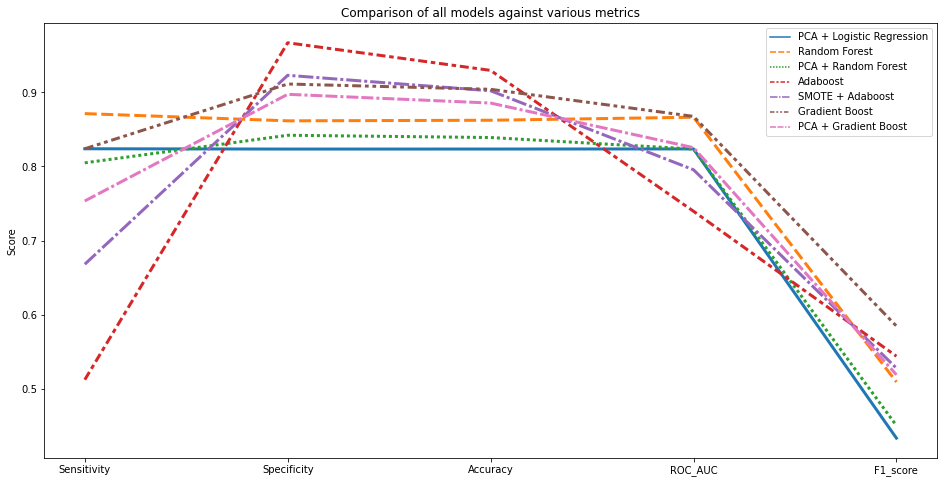

In [204]:
# Plotting the model evaluation metrics to judge most suitable model
plt.figure(figsize=(16,8))
sns.lineplot(data = model_evals, linewidth = 3.0)
plt.title("Comparison of all models against various metrics")
plt.ylabel("Score")
plt.show()

### Conclusions:
- As noted earlier, the most important metric in this analysis is the 'Sensitivity', since we want to identify as many customers who are about to churn as possible.
- Based on this metric alone, the Random Forest model (in Orange above) is the best with a Sensitivity > 0.87, while maintaining high scores for the other metrics as well.
- One could make an argument for Gradient Boosting model (in Brown) which has a decent Sensitivity of >0.82, while having much better Specificity and Accuracy scores.
- As such, the ranking of the best models chosen for predicting churn customers are as follows:
    - 1) Random Forest 
    - 2) Gradient Boosting
    - 3) PCA + Random Forest 
    -    or
    -    PCA + Logistic Regression (Both give fairly similar results)

- Let's proceed with our best Random Forest Model for our analysis.

## Best performing model revisited - Random Forest

In [205]:
# Initializing our model
best_model_rf = RandomForestClassifier(n_estimators=80, max_depth=20, min_samples_leaf=50, random_state=13, 
                                       class_weight={0:0.03,1:0.97},oob_score=True)

# Fitting with training data
best_model_rf.fit(X_train,y_train)
print("OOB score: ", best_model_rf.oob_score_)

OOB score:  0.8627646918867475


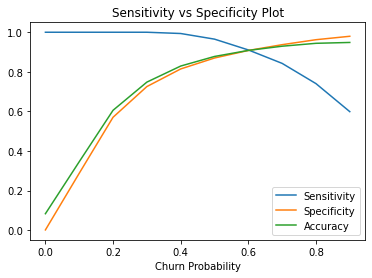

In [206]:
# Checking Sensitivity vs Specificity once again for optimal cut-off
y_train_pred_prob_best = best_model_rf.predict_proba(X_train)[:,1]
cutoff(y_train,y_train_pred_prob_best)

Random Forest
Sensitivity       0.860434
Specificity       0.863224
Accuracy          0.862995
ROC_AUC           0.861829
F1_score          0.507188

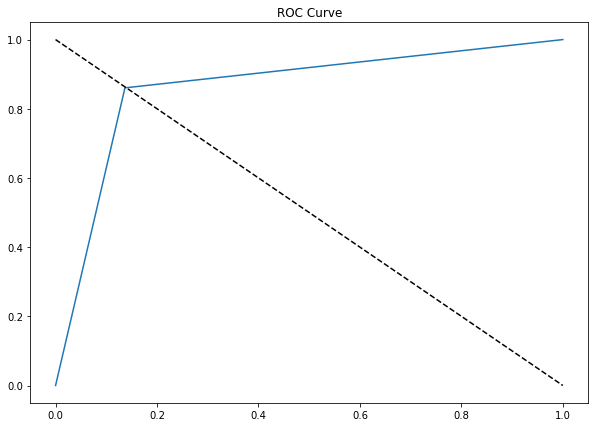

In [207]:
# Predicting churn with our best available model and choosing a cut-off of 0.5. 
# As mentioned earlier, our main metric is to try to obtain a high sensitivity.
y_test_rf_best = pred_array(best_model_rf.predict_proba(X_test)[:,1], 0.5)

# Evaluation metrics for verification
best_model_eval = eval_metrics(y_test, y_test_rf_best, "Random Forest")
best_model_eval.head()

#### The above results corroborates with our earlier conclusions that Random Forest provides us with reliable results for predicting our churn customers.

# Modelling 2 - Model with High Interpretability

- The objective of this modelling process is to identify the most important factors which indicate the impending churn of a customer. If the factors are known, then it may also be possible to identify the kind of offers that can be extended to a customer to entice him / her to stay with our network.
- Our best Random Forest model already provides us with an indicative list of this, and in theory, we could simply identify the top features indicating churn as performed below.
- However, we shall use the Random Forest results as a starting point and then apply Logistic Regression to refine our knowledge of the most important features

In [213]:
# Creating a dataframe of the most important features identified by Random Forest. Then ranking them.
imp_features = pd.DataFrame({'Feature': X_train.columns,
                             'Importance': best_model_rf.feature_importances_})
imp_features["Rank"] = imp_features['Importance'].rank(ascending=False).astype(int)
imp_features = imp_features.sort_values(by="Rank")
imp_features = imp_features.set_index("Rank")
imp_features.head(30)

Feature  Importance
Rank                                   
1            total_ic_mou_8    0.059329
2              loc_ic_mou_8    0.043285
3       total_rech_amt_diff    0.042668
4          loc_ic_t2t_mou_8    0.035092
5       total_recharge_diff    0.032308
6          loc_ic_t2m_mou_8    0.031987
7             roam_og_mou_8    0.029501
8          loc_og_t2t_mou_8    0.025236
9             roam_ic_mou_8    0.025082
10         total_recharge_8    0.023998
11                arpu_diff    0.020843
12         roam_og_mou_diff    0.020455
13         loc_og_t2m_mou_8    0.019571
14       last_day_rch_amt_8    0.019293
15         loc_ic_t2f_mou_8    0.019241
16          loc_ic_mou_diff    0.019200
17           total_og_mou_8    0.016972
18        total_ic_mou_diff    0.016574
19             loc_og_mou_8    0.016242
20         total_rech_amt_8    0.015800
21      loc_ic_t2m_mou_diff    0.015057
22         roam_ic_mou_diff    0.014124
23    total_rech_amt_data_8    0.012053
24    last_day_rch_amt_diff    0.011553
25      loc_og_t2m_mou_diff    0.011105
26          std_og_mou_diff    0.010458
27         loc_og_t2f_mou_8    0.009902
28          loc_og_mou_diff    0.009818
29          max_rech_data_8    0.009381
30        total_og_mou_diff    0.009292

In [214]:
# Extracting the top 25 features from the above dataframe as a list for further analysis.
top25_features = imp_features.Feature.to_list()[0:25]
print(top25_features)

['total_ic_mou_8', 'loc_ic_mou_8', 'total_rech_amt_diff', 'loc_ic_t2t_mou_8', 'total_recharge_diff', 'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'roam_ic_mou_8', 'total_recharge_8', 'arpu_diff', 'roam_og_mou_diff', 'loc_og_t2m_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_diff', 'total_og_mou_8', 'total_ic_mou_diff', 'loc_og_mou_8', 'total_rech_amt_8', 'loc_ic_t2m_mou_diff', 'roam_ic_mou_diff', 'total_rech_amt_data_8', 'last_day_rch_amt_diff', 'loc_og_t2m_mou_diff']


In [215]:
# Let's extract these features for our train and test datasets from earlier.
X_top25 = X[top25_features]
X_train_top25 = X_train[top25_features]
X_test_top25 = X_test[top25_features]
print(X_top25.shape)
print(X_train_top25.shape)
print(X_test_top25.shape)

(30022, 25)
(21015, 25)
(9007, 25)


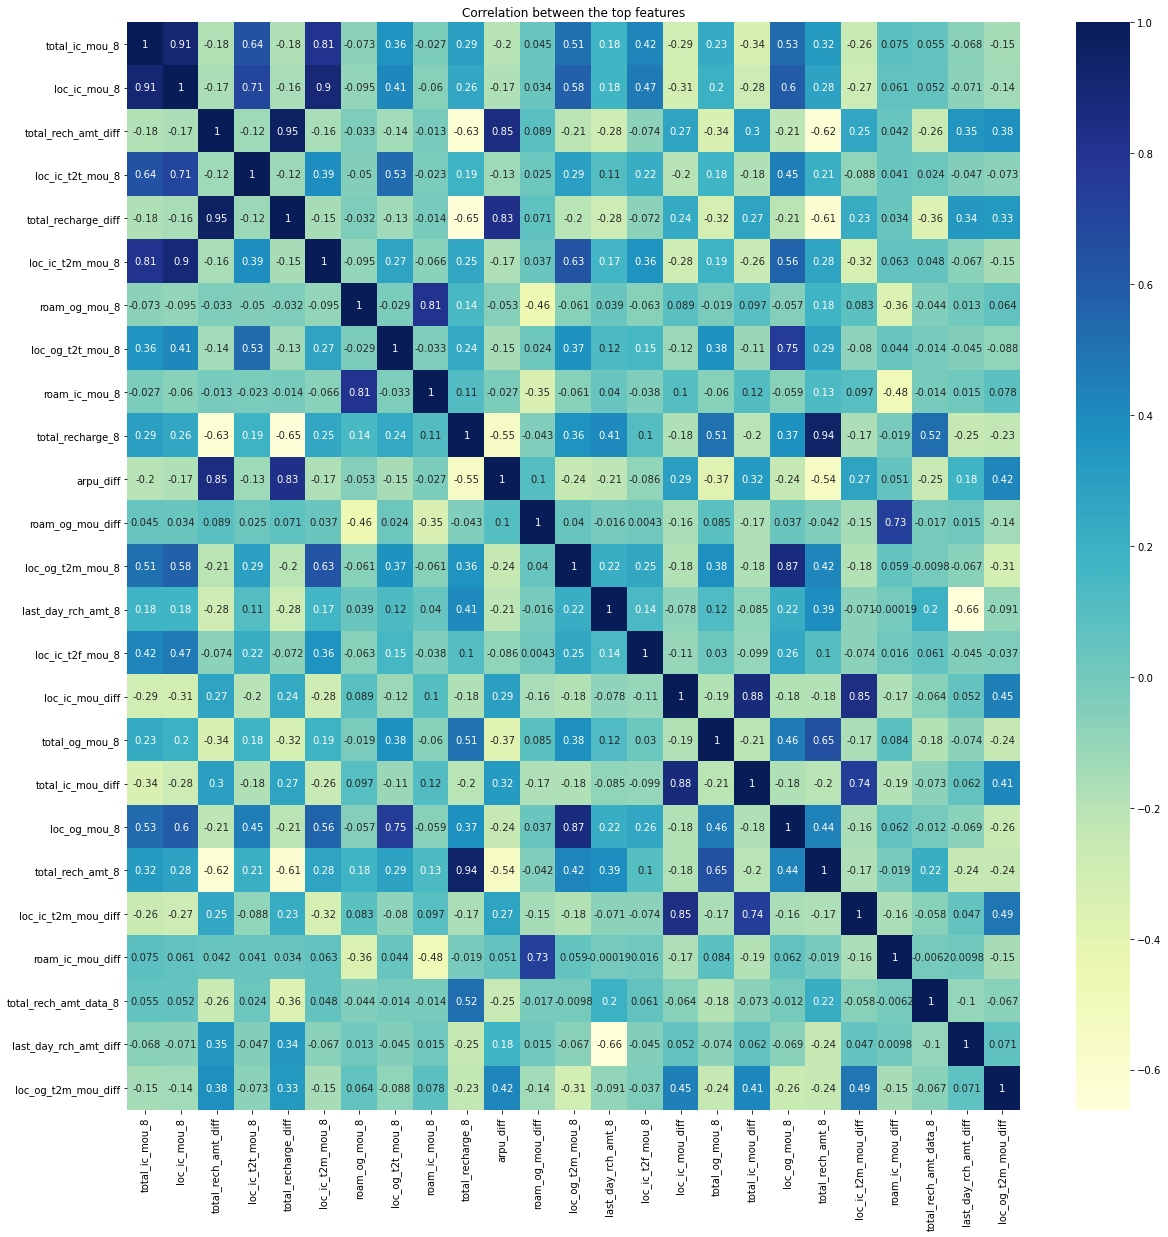

In [216]:
# Checking the heatmap for correlations
plt.figure(figsize=(20,20))
sns.heatmap(X_top25.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation between the top features")
plt.show()

There seem to be a few features which have relatively strong collinearity with other features. Examples include:
- 'loc_ic_mou_8' and 'total_ic_mou_8'
- 'total_recharge_diff' and 'arpu_diff'
- etc.

These combinations, logically, are expected to be collinear. Hence, we can choose one among these pairs or combinations when we try to identify the most important features.

In [217]:
# Defining a standard Logistic regression model function using statsmodels library

import statsmodels.api as sm
def log_reg(X,y):
    logml = sm.GLM(y,(sm.add_constant(X)), family = sm.families.Binomial())
    logml = logml.fit()
    print(logml.summary())
    return logml

In [218]:
# Defining a standard function to obtain Variance Inflation Factor to check for multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(X_train_top):
    vif = pd.DataFrame()
    vif["Feature"] = X_train_top.columns
    vif["VIF"] = [variance_inflation_factor(X_train_top.values,i) for i in range(X_train_top.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif

In [219]:
X_train_top = X_train_top25.copy()

In [220]:
# Model 1
lr_model1 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.3
Date:                Tue, 27 Jul 2021   Deviance:                       7928.6
Time:                        22:44:58   Pearson chi2:                 1.75e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [221]:
# Dropping feature with high p-value: "total_recharge_diff"
X_train_top.drop("total_recharge_diff", axis =1, inplace = True)
X_train_top.shape

(21015, 24)

In [222]:
# Model 2
lr_model2 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.3
Date:                Tue, 27 Jul 2021   Deviance:                       7928.7
Time:                        22:45:04   Pearson chi2:                 1.74e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [223]:
# Dropping feature with high p-value: "roam_og_mou_diff"
X_train_top.drop("roam_og_mou_diff", axis =1, inplace = True)
X_train_top.shape

(21015, 23)

In [224]:
# Model 3
lr_model3 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.4
Date:                Tue, 27 Jul 2021   Deviance:                       7928.8
Time:                        22:46:27   Pearson chi2:                 1.74e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [225]:
# Dropping feature with high p-value: "roam_ic_mou_8"
X_train_top.drop("roam_ic_mou_8", axis =1, inplace = True)
X_train_top.shape

(21015, 22)

In [226]:
# Model 4
lr_model4 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.7
Date:                Tue, 27 Jul 2021   Deviance:                       7929.3
Time:                        22:46:55   Pearson chi2:                 1.75e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [227]:
# Dropping feature with high p-value: "last_day_rch_amt_diff"
X_train_top.drop("last_day_rch_amt_diff", axis =1, inplace = True)
X_train_top.shape

(21015, 21)

In [228]:
# Model 5
lr_model5 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3965.2
Date:                Tue, 27 Jul 2021   Deviance:                       7930.4
Time:                        22:47:10   Pearson chi2:                 1.76e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [229]:
vif5 = vif_calc(X_train_top)

                  Feature     VIF
7        total_recharge_8  106.05
16       total_rech_amt_8   85.66
1            loc_ic_mou_8   39.91
15           loc_og_mou_8   38.02
9        loc_og_t2m_mou_8   19.98
4        loc_ic_t2m_mou_8   19.24
19  total_rech_amt_data_8   12.67
6        loc_og_t2t_mou_8   11.10
12        loc_ic_mou_diff    7.84
3        loc_ic_t2t_mou_8    7.46
0          total_ic_mou_8    6.98
14      total_ic_mou_diff    5.26
2     total_rech_amt_diff    4.75
8               arpu_diff    4.19
17    loc_ic_t2m_mou_diff    4.18
13         total_og_mou_8    2.81
11       loc_ic_t2f_mou_8    1.77
20    loc_og_t2m_mou_diff    1.67
5           roam_og_mou_8    1.34
10     last_day_rch_amt_8    1.26
18       roam_ic_mou_diff    1.23


In [230]:
# Dropping feature with high VIF: "total_recharge_8"
X_train_top.drop("total_recharge_8", axis =1, inplace = True)
X_train_top.shape

(21015, 20)

In [231]:
# Model 6
lr_model6 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3975.2
Date:                Tue, 27 Jul 2021   Deviance:                       7950.4
Time:                        22:47:31   Pearson chi2:                 2.84e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.06

In [232]:
vif6 = vif_calc(X_train_top)

                  Feature    VIF
1            loc_ic_mou_8  39.91
14           loc_og_mou_8  38.02
8        loc_og_t2m_mou_8  19.97
4        loc_ic_t2m_mou_8  19.24
6        loc_og_t2t_mou_8  11.10
11        loc_ic_mou_diff   7.84
3        loc_ic_t2t_mou_8   7.46
0          total_ic_mou_8   6.98
13      total_ic_mou_diff   5.26
2     total_rech_amt_diff   4.74
7               arpu_diff   4.19
16    loc_ic_t2m_mou_diff   4.18
15       total_rech_amt_8   4.00
12         total_og_mou_8   2.81
10       loc_ic_t2f_mou_8   1.77
19    loc_og_t2m_mou_diff   1.67
18  total_rech_amt_data_8   1.44
5           roam_og_mou_8   1.34
9      last_day_rch_amt_8   1.26
17       roam_ic_mou_diff   1.23


In [233]:
# Dropping feature with high VIF: "loc_ic_mou_8"
X_train_top.drop("loc_ic_mou_8", axis =1, inplace = True)
X_train_top.shape

(21015, 19)

In [234]:
# Model 7
lr_model7 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3978.4
Date:                Tue, 27 Jul 2021   Deviance:                       7956.9
Time:                        22:47:50   Pearson chi2:                 2.78e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.07

In [235]:
vif7 = vif_calc(X_train_top)

                  Feature    VIF
13           loc_og_mou_8  37.62
7        loc_og_t2m_mou_8  19.75
5        loc_og_t2t_mou_8  10.99
10        loc_ic_mou_diff   7.62
0          total_ic_mou_8   5.97
12      total_ic_mou_diff   5.18
3        loc_ic_t2m_mou_8   4.76
1     total_rech_amt_diff   4.74
6               arpu_diff   4.19
15    loc_ic_t2m_mou_diff   4.15
14       total_rech_amt_8   3.98
11         total_og_mou_8   2.81
2        loc_ic_t2t_mou_8   2.54
18    loc_og_t2m_mou_diff   1.67
17  total_rech_amt_data_8   1.44
4           roam_og_mou_8   1.34
9        loc_ic_t2f_mou_8   1.29
8      last_day_rch_amt_8   1.26
16       roam_ic_mou_diff   1.23


In [236]:
# Dropping feature with high VIF: "loc_og_mou_8"
X_train_top.drop("loc_og_mou_8", axis =1, inplace = True)
X_train_top.shape

(21015, 18)

In [237]:
# Model 8
lr_model8 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3981.0
Date:                Tue, 27 Jul 2021   Deviance:                       7962.0
Time:                        22:48:03   Pearson chi2:                 3.39e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [238]:
# Dropping feature with high p-value: "loc_og_t2t_mou_8"
X_train_top.drop("loc_og_t2t_mou_8", axis =1, inplace = True)
X_train_top.shape

(21015, 17)

In [239]:
# Model 9
lr_model9 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20997
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3981.5
Date:                Tue, 27 Jul 2021   Deviance:                       7963.0
Time:                        22:48:28   Pearson chi2:                 3.50e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

In [240]:
vif9=vif_calc(X_train_top)

                  Feature   VIF
9         loc_ic_mou_diff  7.60
0          total_ic_mou_8  5.92
11      total_ic_mou_diff  5.18
3        loc_ic_t2m_mou_8  4.75
1     total_rech_amt_diff  4.74
5               arpu_diff  4.19
13    loc_ic_t2m_mou_diff  4.14
12       total_rech_amt_8  3.97
10         total_og_mou_8  2.62
6        loc_og_t2m_mou_8  2.23
2        loc_ic_t2t_mou_8  2.06
16    loc_og_t2m_mou_diff  1.66
15  total_rech_amt_data_8  1.43
4           roam_og_mou_8  1.34
8        loc_ic_t2f_mou_8  1.27
7      last_day_rch_amt_8  1.25
14       roam_ic_mou_diff  1.23


In [241]:
# Dropping feature with high VIF: "loc_ic_mou_diff"
X_train_top.drop("loc_ic_mou_diff", axis =1, inplace = True)
X_train_top.shape

(21015, 16)

In [242]:
vif10=vif_calc(X_train_top)

                  Feature   VIF
0          total_ic_mou_8  5.71
1     total_rech_amt_diff  4.74
3        loc_ic_t2m_mou_8  4.71
5               arpu_diff  4.19
11       total_rech_amt_8  3.97
12    loc_ic_t2m_mou_diff  2.79
10      total_ic_mou_diff  2.64
9          total_og_mou_8  2.62
6        loc_og_t2m_mou_8  2.23
2        loc_ic_t2t_mou_8  1.93
15    loc_og_t2m_mou_diff  1.66
14  total_rech_amt_data_8  1.43
4           roam_og_mou_8  1.34
8        loc_ic_t2f_mou_8  1.26
7      last_day_rch_amt_8  1.25
13       roam_ic_mou_diff  1.23


In [243]:
# Model 10
lr_model10 = log_reg(X_train_top, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                churned   No. Observations:                21015
Model:                            GLM   Df Residuals:                    20998
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3983.2
Date:                Tue, 27 Jul 2021   Deviance:                       7966.4
Time:                        22:49:44   Pearson chi2:                 3.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.08

#### With p-values and VIF all at reasonable levels, we can conclude that the features isolated in X_train_top are our most important features for predicting churn.

## Model Evaluation

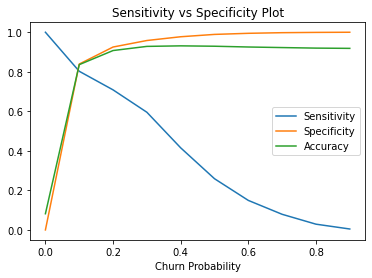

In [244]:
# Checking Sensitivity vs Specificity for optimal cut-off
y_train_lr_model10_prob = lr_model10.predict(sm.add_constant(X_train_top))
cutoff(y_train,y_train_lr_model10_prob)

In [245]:
lr_features = list(X_train_top.columns)
print(lr_features)

['total_ic_mou_8', 'total_rech_amt_diff', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'arpu_diff', 'loc_og_t2m_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2f_mou_8', 'total_og_mou_8', 'total_ic_mou_diff', 'total_rech_amt_8', 'loc_ic_t2m_mou_diff', 'roam_ic_mou_diff', 'total_rech_amt_data_8', 'loc_og_t2m_mou_diff']


Logistic Regression
Sensitivity             0.798103
Specificity             0.835167
Accuracy                0.832131
ROC_AUC                 0.816635
F1_score                0.437918

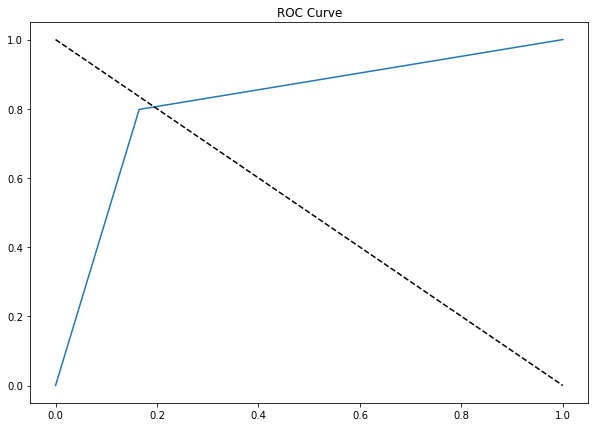

In [247]:
# Predicting churn with our best available model and choosing a cut-off of 0.1. 
# As mentioned earlier, our main metric is to try to obtain a high sensitivity.
y_test_lr_model10 = pred_array(lr_model10.predict(sm.add_constant(X_test[lr_features])), 0.1)

# Evaluation metrics for verification
lr_model10_eval = eval_metrics(y_test, y_test_lr_model10, "Logistic Regression")
lr_model10_eval.head()

## Summary of steps and Inferences for high interpretability model:

- In our quest to identify the top features which can predict customer churn, we started off with top 25 features as indicated by our best performing Random Forest model from the previous section.
- Using these features, we trained multiple Logistic Regression models and pruned some more features to do away with low significance of features and high multicollinearity.
- Eventually, we obtained top 15 features after 10 iterations of Logistic Regression. We can see that even with 15 features, Logistic Regression is able to produce evaluation results comparable with what we had seen earlier.
- Hence, we can conclude that these 15 features are reasonably indicative of when a customer is about to churn.
- Let's now look at these final top features.

In [248]:
# Creating a dataframe of our top features along with the coefficients
features = pd.DataFrame(lr_model10.params,columns = ["coefficients"])
features.drop("const", axis=0, inplace=True)

In [249]:
features["abs_coef"] = features.coefficients.abs()
features = features.sort_values(by = "abs_coef", ascending = False)
features

coefficients  abs_coef
total_rech_amt_data_8     -0.805040  0.805040
loc_ic_t2m_mou_8          -0.684249  0.684249
total_og_mou_8            -0.500596  0.500596
loc_og_t2m_mou_8          -0.476854  0.476854
last_day_rch_amt_8        -0.438056  0.438056
loc_ic_t2t_mou_8          -0.408172  0.408172
total_ic_mou_8            -0.400441  0.400441
loc_ic_t2f_mou_8          -0.309013  0.309013
total_ic_mou_diff          0.301911  0.301911
arpu_diff                  0.291083  0.291083
total_rech_amt_diff        0.288043  0.288043
total_rech_amt_8           0.211011  0.211011
loc_ic_t2m_mou_diff        0.205988  0.205988
roam_og_mou_8              0.178209  0.178209
roam_ic_mou_diff           0.153863  0.153863
loc_og_t2m_mou_diff       -0.132260  0.132260

In [250]:
feature_list = list(features.index)
print(feature_list)

['total_rech_amt_data_8', 'loc_ic_t2m_mou_8', 'total_og_mou_8', 'loc_og_t2m_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'total_ic_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_diff', 'arpu_diff', 'total_rech_amt_diff', 'total_rech_amt_8', 'loc_ic_t2m_mou_diff', 'roam_og_mou_8', 'roam_ic_mou_diff', 'loc_og_t2m_mou_diff']


## Insights

- The probability of a customer churning is largely dependent on the customer's activity during August, which is our "action" phase. This is logical and expected because this is the phase when customer activity starts to wane if he/she is about to churn. 
- **Another thing to note is that most of the features affecting churn during the 'action' phase are negatively correlated to the churn, i.e., if probability of a customer churning is high, then activity (usage and recharge) declines or is low. On the other hand, for a non-churn customer (low churn probability), the activity remains high.**

- Specific features on which churn probability is dependent are described below.

- **Usage related:**
    - loc_ic_t2m_mou_8
    - total_og_mou_8
    - loc_og_t2m_mou_8
    - loc_ic_t2t_mou_8
    - total_ic_mou_8 
    - loc_ic_t2f_mou_8
    - total_ic_mou_diff
    - roam_og_mou_8 
    - roam_ic_mou_diff
    - loc_og_t2m_mou_diff
    - From the above list, we can infer that when a customer is about to churn, they start reducing their usage from the month before (August in our case). 
    - This is true for all types of incoming calls as well, and might indicate the fact that the customer has started requesting his/her contacts to call them on an alternate number, i.e., that they may have already acquired another number. 
    - Of course, the outgoing call patterns also decrease at the same time.
    - Hence, it becomes imperative that if such patterns of reduced usage are identified during any month, the customer is provided with enticing offers (reduced call rates, free data, reduced roaming charges) as soon as possible.
    - This can be customised based on earlier usage patterns of the customer and the relevant offers provided.
    
- **Recharge related:**
    - total_rech_amt_data_8
    - last_day_rch_amt_8
    - total_rech_amt_diff
    - total_rech_amt_8
    - For a customer who is about to churn, their recharging patterns (data and calls) tend to reduce compared to previous months.
    - This is fairly obvious because, if a customer is about to churn, they wouldn't want to pay for a service they are not going to use.
    - Hence, it is extremely important to keep track of the recharging patterns of customers, both for calling and data. If there are any anomalies, then such customers should be offered discounts as soon as possible.

- **The time window for our "action" phase is quite small (less than a month), since there is little to no indication in the 'good' phase (June and July) that a customer is about to churn. This is evident from the fact that none of our top features for churn prediction are from the June and July.**
- **Hence, it is important that we continuously compare the usage and recharge patterns of customers with respect to previous months so that we can act before it is too late.**

### End of Case Study